# OLIST DEPARTEMENT STORE ECOMMERCE CUSTOMER SEGMENTATION
### Introduction
Olist is The Largest Brazilian Departemen Store which is operated in brazilian main e-commerce platform that using Software as a Service technology since 2015, This Data contain 100 rows of orders around 2016 to 2018 made at multiple marketplaces in Brazil. This E-commerce Data containts feature from multiple dimension, such as from product information with its attributes, order status, price, and order deliver performance to customer location till the payment.

This Dataset genereosly provided by its own Olist, which connects small businesess in entire brazil to channels with ease of doing business and a single contract. So the merchant can sell their products throuh the Olist Store, then ship them directly to customers with Olist's logistic partner help. After a customer make purchase the product through Olist, seller receive notification to order fullfilment. Once the product delivered to customer or the date reach estimated delivery due, customer receive satisfaction survey via email where they can send feedback comment about purchase experience. Here's the reference and more information about Olist : www.olist.com

In the purpose of confidential data security, this real ecommerce data has been anonymised already, yang meliputi nama perusahaan, mitra logistik hingga nama pelanggan.

### Business Scenario
By the provided customer data which contain product order and payment transaction, The Data Scientist offering solution about market segmentation on e-commerce to Olist Business Management Teams and Stakeholders, for helping various business-size sellers and shop owners in purpose of increasing their sales, by tracking their online and offline attendance. It's done by analyze customer purchasing behaviour with their favorite products, then divide segment based on characteristic of customer transaction and product preferences.

### Preparation
importing necessary library from starter, preprocessing and modelling

In [1]:
# library for data procesing and data visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# library for data preparation such as encoding and scaling, and model measurement metric
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import silhouette_score

# library for modelling and pca for dimensional reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

This Analysis using 5 csv data dan 2 additional csv data
- `olist_customer_dataset` as `customer_df`, containts customer data which covers customer id and domicile
- `olist_products_dataset` as `product_df`, contains product data with category and its specification
- `olist_orders_dataset` as `order_df`, contains core of data about that covers information
- `olist_order_items_dataset` as `item_df`, contains product items data that covers orders and payments 
- `olist_order_payments_dataset` as `payment_df`, containts payment transaction data made by customers 
- `product_category_name_translation` as `translation`, (additional data) containts translation of product category data to english
- `brazil_state_isocode` as `state_iso`, (additional data) containts Brazilian Federal State ISO Code data

Data Source : https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

In [ ]:
# # olist_customer_dataset.csv ---- customer_df
# customer_df = pd.read_csv('olist_customers_dataset.csv')
# # olist_products_dataset.csv ---- product_df
# product_df = pd.read_csv('olist_products_dataset.csv')
# # olist_orders_dataset.csv ---- order_df
# order_df = pd.read_csv('olist_orders_dataset.csv')
# # olist_orders_item_dataset.csv ---- item_df
# item_df = pd.read_csv('olist_order_items_dataset.csv')
# # olist_orders_payments_dataset.csv --- payment_df
# payment_df = pd.read_csv('olist_order_payments_dataset.csv')
# # 'product_category_name_translation.csv' --- translation
# translation = pd.read_csv('product_category_name_translation.csv')
# # 'brazil_state_isocode.csv' --- state_iso
# state_iso = pd.read_csv('brazil_state_isocode.csv')

process of combining data
1. combining brazilian iso state data with its `state_code` column on customer data with its `customer_state` column 
   - to insert ISO Code data about Federal State Domicilion where customer live to Customer Data
   - removing `customer_state` column which represent Federal State ISO Code
   - then renaming Column Name `state_iso` to `customer_state`
2. combining customer data and order data with same `customer_id` column from both table into order-customer (`order_cust`) data
3. combining english translation product category data with product data using `product_category_name` column from both table
4. combining product data and product's item data using same column `product_id` from both table into item-product (`item_prod`) data
5. combining both combination order-customer and item-product before using both tables same column `order_id` 
6. combining recently combined product orders data with payment data using same column `order_id` from both table as final data

explaination of parameter during data merging function
- outer join `pd.merge(....,how="outer")` will get all data from both dataframes 
- left join `pd.merge(....,how="left")` combination of 2 data which following first data on the left as main data

In [ ]:
# # 'state_iso' digabung ke 'customer_df' pake "customer_state" dan "state_code", nama tetep sama
# customer_df = customer_df.merge(state_iso, left_on='customer_state', right_on='state_code')
# customer_df.drop(columns=['customer_state', 'state_code'], inplace=True)
# customer_df.rename(columns={'state_name':'customer_state'}, inplace=True)
# # 'customer_df' digabung ke 'order_df' pake "customer_id" jadi 'order_customer' (sisa order id) 
# order_cust = order_df.merge(customer_df, on='customer_id', how='inner')
# # 'translation' digabung ke 'product_df' pake "product_category_name_english" jadi 'product_df' 
# product_df = product_df.merge(translation, on='product_category_name', how='left')
# # 'product_df' digabung ke 'item_df' pake "product_id" jadi 'item_product' (sisa order id)
# item_prod = item_df.merge(product_df, on='product_id', how='left')
# # 'item_product' digabung ke 'order_customer' pake "order_id" jadi 'item_order'
# item_order =  item_prod.merge(order_cust, on='order_id', how='left')
# # 'payment_df' digabung ke 'item_order' pake "order_id" jadi 'customer_transaction_df'
# customer_order_transaction = item_order.merge(payment_df, on='order_id', how='outer')

- sorting final dataset of combination process by changing column order according meaning of each column 
- then exporting the final data table into new csv data`customer_order_transaction_dataset.csv`

In [28]:
# # mengubah urutan kolom
# customer_order_transaction = customer_order_transaction[['order_id', 'order_item_id', 'product_id', 'customer_id', 'customer_unique_id', 'seller_id', 
#                                                          'product_category_name', 'product_category_name_english', 'product_name_lenght', 
#                                                          'product_description_lenght', 'product_photos_qty', 'product_weight_g','product_length_cm', 
#                                                          'product_height_cm', 'product_width_cm', 'order_status', 'shipping_limit_date', 
#                                                          'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
#                                                          'order_delivered_customer_date', 'order_estimated_delivery_date',  'customer_zip_code_prefix', 
#                                                          'customer_city', 'customer_state', 'payment_sequential', 'payment_type', 'payment_installments',
#                                                          'price', 'freight_value', 'payment_value']]
# # buat dataframe baru customer order transaction df
# customer_order_transaction.to_csv('customer_order_transaction_dataset.csv',index=False)

## Data Inspection
reading customer order transaction 

In [2]:
# baca data baru customer_order_transaction dari hasil penggabungan sebelumnya
customer_order_transaction = pd.read_csv('customer_order_transaction_dataset.csv')
customer_order_transaction.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214            1.0   
1  00018f77f2f0320c557190d7a144bdd3            1.0   
2  000229ec398224ef6ca0657da4fc703e            1.0   
3  00024acbcdf0a6daa1e931b038114c75            1.0   
4  00042b26cf59d7ce69dfabb4e55b4fd9            1.0   

                         product_id                       customer_id  \
0  4244733e06e7ecb4970a6e2683c13e61  3ce436f183e68e07877b285a838db11a   
1  e5f2d52b802189ee658865ca93d83a8f  f6dd3ec061db4e3987629fe6b26e5cce   
2  c777355d18b72b67abbeef9df44fd0fd  6489ae5e4333f3693df5ad4372dab6d3   
3  7634da152a4610f1595efa32f14722fc  d4eb9395c8c0431ee92fce09860c5a06   
4  ac6c3623068f30de03045865e4e10089  58dbd0b2d70206bf40e62cd34e84d795   

                 customer_unique_id                         seller_id  \
0  871766c5855e863f6eccc05f988b23cb  48436dade18ac8b2bce089ec2a041202   
1  eb28e67c4c0b83846050ddfb8a35d051  dd7ddc04e1b6c2c614352b383efe2d36   
2  3818d81c6709e39d06b2738a8d3a2474  5b51032eddd242adc84c38acab88f23d   
3  af861d436cfc08b2c2ddefd0ba074622  9d7a1d34a5052409006425275ba1c2b4   
4  64b576fb70d441e8f1b2d7d446e483c5  df560393f3a51e74553ab94004ba5c87   

  product_category_name product_category_name_english  product_name_lenght  \
0            cool_stuff                    cool_stuff                 58.0   
1              pet_shop                      pet_shop                 56.0   
2      moveis_decoracao               furniture_decor                 59.0   
3            perfumaria                     perfumery                 42.0   
4    ferramentas_jardim                  garden_tools                 59.0   

   product_description_lenght  ...  order_estimated_delivery_date  \
0                       598.0  ...            2017-09-29 00:00:00   
1                       239.0  ...            2017-05-15 00:00:00   
2                       695.0  ...            2018-02-05 00:00:00   
3                       480.0  ...            2018-08-20 00:00:00   
4                       409.0  ...            2017-03-17 00:00:00   

   customer_zip_code_prefix          customer_city  customer_state  \
0                   28013.0  campos dos goytacazes  Rio de Janeiro   
1                   15775.0        santa fe do sul       São Paulo   
2                   35661.0          para de minas    Minas Gerais   
3                   12952.0                atibaia       São Paulo   
4                   13226.0        varzea paulista       São Paulo   

   payment_sequential payment_type payment_installments   price freight_value  \
0                 1.0  credit_card                  2.0   58.90         13.29   
1                 1.0  credit_card                  3.0  239.90         19.93   
2                 1.0  credit_card                  5.0  199.00         17.87   
3                 1.0  credit_card                  2.0   12.99         12.79   
4                 1.0  credit_card                  3.0  199.90         18.14   

  payment_value  
0         72.19  
1        259.83  
2        216.87  
3         25.78  
4        218.04  

[5 rows x 31 columns]

### Data Set Column Names
- `order_id`, unique identifier to each order
- `customer_id`, unique identifier for each customer, which available to connect to another table
- `customer_unique_id`, identifier unique for each customer
- `order_status`, order status such as **delivered** when order commit delivered and **cancelled** when the order cancelled
- `order_purchase_timestamp` , display the timestamp of purchase made by customer
- `order_delivered_carrier_date`, display the order post when it prepared and processed by logistic partner
- `order_delivered_customer_date`, display the actual order's delivery date to customer related
- `order_estimated_delivery_date`, display date estimation of product delivered to customer when purchase the product
- `product_id`, identifier unique to each product unit purchased
- `product_category_name`, product category name in brazillian
- `product_category_name_english`, product category name in english
- `order_approved_at`, display timestamp when order approved by the seller
- `shipping_limit_date`, display the limit date of seller for processing the order to be proceed to the logistic partner
- `price`, price of product
- `freight_value`, product delivery fee that borne by buyers
- `payment_method`, customer payment method preferences     
    - **boleto**, is a payment method which regulated by brazilian central bank that using voucher
- `payment_sequential`, customer who possibly order and pay more than payment method, then there are the sequences of payment 
- `payment_value`, amount of money paid by customer
- `customer_city`, city where customer live
- `customer_state`, federal state where customer live

In [30]:
# liat jumlah baris dan kolom
print(customer_order_transaction.shape)
# liat informasi data terkait tipe data, nama-nama kolom dan baris yang tidak kosong
customer_order_transaction.info()

(118434, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118434 entries, 0 to 118433
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118434 non-null  object 
 1   order_item_id                  117604 non-null  float64
 2   product_id                     117604 non-null  object 
 3   customer_id                    117604 non-null  object 
 4   customer_unique_id             117604 non-null  object 
 5   seller_id                      117604 non-null  object 
 6   product_category_name          115906 non-null  object 
 7   product_category_name_english  115881 non-null  object 
 8   product_name_lenght            115906 non-null  float64
 9   product_description_lenght     115906 non-null  float64
 10  product_photos_qty             115906 non-null  float64
 11  product_weight_g               117584 non-null  float64
 12  product_length_cm

checking if there if the data have missing or null rows 

In [31]:
# memeriksa jumlah baris yang kosong per kolom
customer_order_transaction.isnull().sum().sort_values(ascending=False)

order_delivered_customer_date    3397
product_category_name_english    2553
product_name_lenght              2528
product_category_name            2528
product_photos_qty               2528
product_description_lenght       2528
order_delivered_carrier_date     2075
product_weight_g                  850
product_length_cm                 850
product_width_cm                  850
product_height_cm                 850
order_approved_at                 845
customer_zip_code_prefix          830
customer_city                     830
customer_state                    830
order_estimated_delivery_date     830
freight_value                     830
order_status                      830
order_purchase_timestamp          830
shipping_limit_date               830
order_item_id                     830
seller_id                         830
customer_unique_id                830
customer_id                       830
product_id                        830
price                             830
payment_inst

checking if there if the data have duplicated rows 

In [32]:
# memeriksa jumlah baris yang duplikat per kolom
customer_order_transaction[customer_order_transaction.duplicated()].count()

order_id                         0
order_item_id                    0
product_id                       0
customer_id                      0
customer_unique_id               0
seller_id                        0
product_category_name            0
product_category_name_english    0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
order_status                     0
shipping_limit_date              0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
payment_sequential               0
payment_type                     0
payment_installments             0
price               

## Data Cleansing
deleting null data rows which because because the effect of outer join data combination 
- combining data with merge outer join, row data which have null identifier are joined
- so there are many null or missing data because the incompleteness of combined data into main data

cleaning the missing data by remove then, because the values are invalid

In [3]:
# hapus semua baris kolom yang terdapat nilai yan hilang
customer_order_transaction.dropna(axis=0, inplace=True)

# periksa kembali semua baris dan kolom setelah null value dihapus
print('jumlah baris dan kolom setelah null value removal :', customer_order_transaction.shape)
customer_order_transaction.isnull().sum()

jumlah baris dan kolom setelah null value removal : (113367, 31)


order_id                         0
order_item_id                    0
product_id                       0
customer_id                      0
customer_unique_id               0
seller_id                        0
product_category_name            0
product_category_name_english    0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
order_status                     0
shipping_limit_date              0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
payment_sequential               0
payment_type                     0
payment_installments             0
price               

check the statistical descriptive of variable in numeric by default from dataset

In [253]:
customer_order_transaction.describe()

order_item_id  product_name_lenght  product_description_lenght  \
count  113367.000000        113367.000000               113367.000000   
mean        1.196856            48.800427                  785.794746   
std         0.701325            10.018615                  651.018280   
min         1.000000             5.000000                    4.000000   
25%         1.000000            42.000000                  346.000000   
50%         1.000000            52.000000                  601.000000   
75%         1.000000            57.000000                  985.000000   
max        21.000000            76.000000                 3992.000000   

       product_photos_qty  product_weight_g  product_length_cm  \
count       113367.000000     113367.000000      113367.000000   
mean             2.209241       2110.532633          30.282834   
std              1.720307       3770.553691          16.161733   
min              1.000000          0.000000           7.000000   
25%              1.000000        300.000000          18.000000   
50%              1.000000        700.000000          25.000000   
75%              3.000000       1800.000000          38.000000   
max             20.000000      40425.000000         105.000000   

       product_height_cm  product_width_cm  customer_zip_code_prefix  \
count      113367.000000     113367.000000             113367.000000   
mean           16.617411         23.099694              35081.859236   
std            13.448605         11.741288              29845.463618   
min             2.000000          6.000000               1003.000000   
25%             8.000000         15.000000              11320.000000   
50%            13.000000         20.000000              24325.000000   
75%            20.000000         30.000000              58775.000000   
max           105.000000        118.000000              99980.000000   

       payment_sequential  payment_installments          price  freight_value  \
count       113367.000000         113367.000000  113367.000000  113367.000000   
mean             1.089947              2.942532     120.161067      20.024231   
std              0.682120              2.777846     182.714900      15.753323   
min              1.000000              0.000000       0.850000       0.000000   
25%              1.000000              1.000000      39.900000      13.080000   
50%              1.000000              2.000000      74.900000      16.320000   
75%              1.000000              4.000000     133.700000      21.200000   
max             26.000000             24.000000    6735.000000     409.680000   

       payment_value  
count  113367.000000  
mean      172.222013  
std       266.576121  
min         0.000000  
25%        61.000000  
50%       108.140000  
75%       189.370000  
max     13664.080000

also check the statistical descriptive of categorical variabel in dataset

In [254]:
customer_order_transaction.describe(include=['object'])

order_id                        product_id  \
count                             113367                            113367   
unique                             95109                             31614   
top     895ab968e7bb0d5659d16cd74cd1650c  aca2eb7d00ea1a7b8ebd4e68314663af   
freq                                  63                               529   

                             customer_id                customer_unique_id  \
count                             113367                            113367   
unique                             95109                             92062   
top     270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
freq                                  63                                75   

                               seller_id product_category_name  \
count                             113367                113367   
unique                              2912                    71   
top     4a3ca9315b744ce9f8e9374361493884       cama_mesa_banho   
freq                                2094                 11649   

       product_category_name_english order_status  shipping_limit_date  \
count                         113367       113367               113367   
unique                            71            2                90112   
top                   bed_bath_table    delivered  2017-08-14 20:43:31   
freq                           11649       113360                   63   

       order_purchase_timestamp    order_approved_at  \
count                    113367               113367   
unique                    94605                87112   
top         2017-08-08 20:26:31  2017-08-08 20:43:31   
freq                         63                   63   

       order_delivered_carrier_date order_delivered_customer_date  \
count                        113367                        113367   
unique                        78909                         94321   
top             2017-08-10 11:58:14           2017-08-14 12:46:18   
freq                             63                            63   

       order_estimated_delivery_date customer_city customer_state payment_type  
count                         113367        113367         113367       113367  
unique                           444          4073             27            4  
top              2017-12-20 00:00:00     sao paulo      São Paulo  credit_card  
freq                             637         17867          47819        83695

## Feature Column Transformation
- transforming columns data type `order_item` and `payment_sequential` from `float` to `int`
- transforming columns data type which contain date of purchase order date and payment until order delivery become `datetime`

In [4]:
# order_item_id, payment_sequential menjadi int 
customer_order_transaction['payment_sequential'] = customer_order_transaction['payment_sequential'].astype(int)
# mengubah kolom shipping limit, order purchase time, order delivered menjadi datetime
customer_order_transaction[['shipping_limit_date','order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 
               'order_estimated_delivery_date']] = customer_order_transaction[['shipping_limit_date','order_purchase_timestamp', 'order_approved_at', 
                'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']].apply(pd.to_datetime)

## Exploratory Data Analysis
removing unnecessary column :    
```
'customer_id','seller_id','product_category_name','product_name_lenght','product_description_lenght','product_photos_qty',
'product_weight_g','product_length_cm','product_height_cm','product_width_cm','customer_zip_code_prefix','payment_installment'
```
changing column name
- rename column `product_category_name_english` to `product_category` and `customer_unique_id` to `customer_id`

In [5]:
customer_transaction = customer_order_transaction.drop(columns=['order_item_id','customer_id','seller_id','product_category_name','product_name_lenght','product_description_lenght',
                                                   'product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm',
                                                   'customer_zip_code_prefix','payment_installments'])

# mengubah format nama kolom product_category_name_english dan customer_unique_id
customer_transaction.rename(columns={'product_category_name_english':'product_category', 'customer_unique_id':'customer_id'}, inplace=True)

create new feature column by addition calculation
- amount total of money paid by customer, `total amount = price + freight value`
- change value received by customer from payment, `payment change = payment value - total amount`

In [6]:
customer_transaction['total_amount'] = customer_transaction['price'] + customer_transaction['freight_value']
# payment_change = payment_value total_amount dan menggunakan round untuk membulatkan desimal, dan abs() untuk absolute minus
customer_transaction['payment_change'] = ((customer_transaction['payment_value'] - customer_transaction['total_amount']).round(decimals=2)).abs()

create new column of timestamp calculation 
- minute duration elapsed when order confirmed after customer payment, `approval_minutes = order_approved_at - order_purchase_timestamp`
- hour duration elapsed when the order prepared after receive the order, `packaging_hourly = shipping_limit_date - order_approved_at`
- hour duration elapsed when the order delivered to customer, `delivery_hourly = order_delivered_customer_date - order_delivered_carrier_date`

In [7]:
# .dt.total_seconds() dasarnya untuk satuan detik, untuk menit tinggal dibagi 60 dan jam maka dibagi 60 lagi 
# approval_duration = order_approved_at - order_purchase_timestamp (in minutes)
customer_transaction['approval_minutes'] = (customer_transaction['order_approved_at'] - customer_transaction['order_purchase_timestamp']).dt.total_seconds() / 60
customer_transaction['approval_minutes'] = customer_transaction['approval_minutes'].round(decimals=2)
# shipping_duration = shipping_limit_date - order_approved_at (in hourly)
customer_transaction['packaging_hourly'] = (customer_transaction['shipping_limit_date'] - customer_transaction['order_approved_at']).dt.total_seconds() / (60*60)
customer_transaction['packaging_hourly'] = customer_transaction['packaging_hourly'].round(decimals=2)
# delivery_duration = order_delivered_customer_date - order_delivered_carrier_date (in hourly)
customer_transaction['deliver_hourly']= (customer_transaction['order_delivered_customer_date'] - customer_transaction['order_delivered_carrier_date']).dt.total_seconds()/(60*60)
customer_transaction['deliver_hourly'] = customer_transaction['deliver_hourly'].round(decimals=2)

removing unnecessary column and change the order of new column

In [8]:
# menghapus kolom yang tidak diperlukan, kolom tanggal
custrans_df = customer_transaction.drop(columns=['shipping_limit_date', 'order_purchase_timestamp' ,'order_approved_at', 'order_delivered_carrier_date', 
                                        'order_delivered_customer_date' ,'order_estimated_delivery_date'])

# mengurutkan ulang kolom antara kolom lama dengan kolom penambahan
custrans_df = custrans_df[['order_id', 'product_id', 'customer_id','product_category', 'order_status', 'approval_minutes', 
                           'packaging_hourly', 'deliver_hourly', 'customer_city', 'customer_state', 'payment_sequential', 'payment_type', 'price', 
                           'freight_value', 'total_amount', 'payment_value', 'payment_change']]

check dataset information after modification from transformation, new column creation and column order sortation

In [39]:
custrans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113367 entries, 0 to 117603
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   order_id            113367 non-null  object 
 1   product_id          113367 non-null  object 
 2   customer_id         113367 non-null  object 
 3   product_category    113367 non-null  object 
 4   order_status        113367 non-null  object 
 5   approval_minutes    113367 non-null  float64
 6   packaging_hourly    113367 non-null  float64
 7   deliver_hourly      113367 non-null  float64
 8   customer_city       113367 non-null  object 
 9   customer_state      113367 non-null  object 
 10  payment_sequential  113367 non-null  int32  
 11  payment_type        113367 non-null  object 
 12  price               113367 non-null  float64
 13  freight_value       113367 non-null  float64
 14  total_amount        113367 non-null  float64
 15  payment_value       113367 non-nul

In [16]:
custrans_df.head(15)

order_id                        product_id  \
0   00010242fe8c5a6d1ba2dd792cb16214  4244733e06e7ecb4970a6e2683c13e61   
1   00018f77f2f0320c557190d7a144bdd3  e5f2d52b802189ee658865ca93d83a8f   
2   000229ec398224ef6ca0657da4fc703e  c777355d18b72b67abbeef9df44fd0fd   
3   00024acbcdf0a6daa1e931b038114c75  7634da152a4610f1595efa32f14722fc   
4   00042b26cf59d7ce69dfabb4e55b4fd9  ac6c3623068f30de03045865e4e10089   
5   00048cc3ae777c65dbb7d2a0634bc1ea  ef92defde845ab8450f9d70c526ef70f   
6   00054e8431b9d7675808bcb819fb4a32  8d4f2bb7e93e6710a28f34fa83ee7d28   
7   000576fe39319847cbb9d288c5617fa6  557d850972a7d6f792fd18ae1400d9b6   
8   0005a1a1728c9d785b8e2b08b904576c  310ae3c140ff94b03219ad0adc3c778f   
9   0005f50442cb953dcd1d21e1fb923495  4535b0e1091c278dfd193e5a1d63b39f   
10  00061f2a7bc09da83e415a52dc8a4af1  d63c1011f49d98b976c352955b1c4bea   
11  00063b381e2406b52ad429470734ebd5  f177554ea93259a5b282f24e33f65ab6   
12  0006ec9db01a64e59a68b2c340bf65a7  99a4788cb24856965c36a24e339b6058   
13  0008288aa423d2a3f00fcb17cd7d8719  368c6c730842d78016ad823897a372db   
14  0008288aa423d2a3f00fcb17cd7d8719  368c6c730842d78016ad823897a372db   

                         customer_id          product_category order_status  \
0   871766c5855e863f6eccc05f988b23cb                cool_stuff    delivered   
1   eb28e67c4c0b83846050ddfb8a35d051                  pet_shop    delivered   
2   3818d81c6709e39d06b2738a8d3a2474           furniture_decor    delivered   
3   af861d436cfc08b2c2ddefd0ba074622                 perfumery    delivered   
4   64b576fb70d441e8f1b2d7d446e483c5              garden_tools    delivered   
5   85c835d128beae5b4ce8602c491bf385                housewares    delivered   
6   635d9ac1680f03288e72ada3a1035803                 telephony    delivered   
7   fda4476abb6307ab3c415b7e6d026526              garden_tools    delivered   
8   639d23421f5517f69d0c3d6e6564cf0e             health_beauty    delivered   
9   0782c41380992a5a533489063df0eef6           books_technical    delivered   
10  107e6259485efac66428a56f10801f4f             health_beauty    delivered   
11  3fb97204945ca0c01bcf3eee6031c5f1  fashion_bags_accessories    delivered   
12  7ed0ea20347f67fe61d1c99fdf8556ae            bed_bath_table    delivered   
13  9e4159995424971423b98c4a8bc11529              garden_tools    delivered   
14  9e4159995424971423b98c4a8bc11529              garden_tools    delivered   

    approval_minutes  packaging_hourly  deliver_hourly          customer_city  \
0              46.55            144.00           29.16  campos dos goytacazes   
1              12.12            168.00          193.49        santa fe do sul   
2              14.98             96.00          144.71          para de minas   
3               9.72            168.00           96.08                atibaia   
4              12.37            215.79          318.94        varzea paulista   
5            1812.88            144.00          122.64                uberaba   
6              16.72             96.00          164.93             guararapes   
7            1707.35            115.92           97.82           praia grande   
8            1434.80            143.94           41.66                 santos   
9              11.28             96.00           27.06                jandira   
10             11.98            120.00           42.62             piracicaba   
11             38.65             95.51          191.08             monte alto   
12             20.05             48.00          134.04         rio de janeiro   
13           1785.52            143.00          139.53                jandira   
14           1785.52            143.00          139.53                jandira   

    customer_state  payment_sequential payment_type   price  freight_value  \
0   Rio de Janeiro                   1  credit_card   58.90          13.29   
1        São Paulo                   1  credit_card  239.90          19.93   
2     Minas Gerais                   1  credit_

new dataset numerical data statistical description

In [17]:
custrans_df.describe()

approval_minutes  packaging_hourly  deliver_hourly  payment_sequential  \
count     113367.000000     113367.000000   113367.000000       113367.000000   
mean         626.043021        148.039897      220.880747            1.089947   
std         1257.394979        129.576877      207.321085            0.682120   
min            0.000000       -153.610000     -386.310000            1.000000   
25%           12.970000         96.000000       97.570000            1.000000   
50%           20.830000        144.000000      169.500000            1.000000   
75%          894.895000        144.000000      286.290000            1.000000   
max        44486.620000      25224.000000     4924.580000           26.000000   

               price  freight_value   total_amount  payment_value  \
count  113367.000000  113367.000000  113367.000000  113367.000000   
mean      120.161067      20.024231     140.185298     172.222013   
std       182.714900      15.753323     189.793591     266.576121   
min         0.850000       0.000000       6.080000       0.000000   
25%        39.900000      13.080000      55.315000      61.000000   
50%        74.900000      16.320000      91.860000     108.140000   
75%       133.700000      21.200000     157.450000     189.370000   
max      6735.000000     409.680000    6929.310000   13664.080000   

       payment_change  
count   113367.000000  
mean        43.278116  
std        177.073565  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%         22.290000  
max      11956.070000

new dataset categorical data statistical description

In [18]:
custrans_df.describe(include='object')

order_id                        product_id  \
count                             113367                            113367   
unique                             95109                             31614   
top     895ab968e7bb0d5659d16cd74cd1650c  aca2eb7d00ea1a7b8ebd4e68314663af   
freq                                  63                               529   

                             customer_id product_category order_status  \
count                             113367           113367       113367   
unique                             92062               71            2   
top     9a736b248f67d166d2fbb006bcb877c3   bed_bath_table    delivered   
freq                                  75            11649       113360   

       customer_city customer_state payment_type  
count         113367         113367       113367  
unique          4073             27            4  
top        sao paulo      São Paulo  credit_card  
freq           17867          47819        83695

checking uniqe value from each column which is 
- categorical if unique value from each column under 1000 unique value
- numerical if unique value from each column above 1000 unique value

In [91]:
# for col in custrans_df.columns:
#     uniq_col = len(custrans_df[col].unique())
#     if uniq_col < 1000:
#         print(col, uniq_col)

# for col in custrans_df.columns:
#     uniq_col = len(custrans_df[col].unique())
#     if uniq_col > 1000:
#         print(col, uniq_col)

### Numerical Bivariate Correlation Analysis
Correlation of Time Elapsed when order processed until order delivered with Order Status, Payment Method and Product Category
- Indexed Column: order status, product category, payment type
- Aggregated Column : approval minutes, packaging hourly, deliver hourly

In [10]:
# group customer order status by approval_minutes, packaging_hourly, deliver_hourly
stader_grp = custrans_df.groupby('order_status')[['approval_minutes', 'packaging_hourly','deliver_hourly']].mean().reset_index()
# original cmap just "RdYlGN", so expand cmap with "_r" to reverse the color map
# visualization with tabular chart
stader_grp.style.background_gradient(cmap='RdYlGn_r', axis=0)

Order Status during order approved and delivered

Most of Order Cancelled becuase when order notified and confirmed take times too long, more than delivered orders

In [30]:
# group customer federal state by approval_minutes, packaging_hourly, deliver_hourly
stord_grp = custrans_df.groupby('customer_state')[['approval_minutes', 'packaging_hourly','deliver_hourly']].mean().reset_index()
stord_grp

customer_state  approval_minutes  packaging_hourly  deliver_hourly
0                  Acre        811.001196        149.482935      414.100761
1               Alagoas        692.900069        150.777483      502.583478
2                 Amapá       1034.841325        154.640964      587.248916
3              Amazonas        538.416587        150.682635      569.543772
4                 Bahia        706.023409        148.458860      379.963681
5                 Ceará        676.879764        145.286026      418.449609
6      Distrito Federal        615.987618        146.533571      232.029343
7        Espírito Santo        636.843737        149.216490      293.018090
8                 Goiás        765.550936        147.801108      292.791889
9              Maranhão        858.584864        160.218490      429.261720
10          Mato Grosso        763.781874        148.484424      354.192746
11   Mato Grosso do Sul        601.629939        150.300593      294.733426
12         Minas Gerais        610.099030        148.233602      208.743932
13               Paraná        670.047294        147.003687      207.608033
14              Paraíba        923.168225        147.438746      409.560309
15                 Pará        707.336234        151.630290      486.666636
16           Pernambuco        629.066356        147.948392      360.652818
17                Piauí        634.779744        148.335000      386.090733
18  Rio Grande do Norte        675.746847        158.167568      381.813658
19    Rio Grande do Sul        711.050629        148.501215      286.399046
20       Rio de Janeiro        570.296637        150.743420      283.950767
21             Rondônia        740.134509        146.378073      406.145091
22              Roraima        592.109773        137.398864      587.723636
23       Santa Catarina        685.840786        150.226965      277.020279
24              Sergipe        610.552656        152.609896      426.784766
25            São Paulo        595.502138        146.579150      132.835438
26            Tocantins        719.460818        151.659606      325.666121

Order Processing Time from Approved until Delivered based on Customer Federal State Domiciliary
- Federal State where customer order approval minutes is the fastest come from Amazonas to Sao Paolo
- Also Federal State where customer received the order time is fastest are from Sao Paolo, Parana, and Minas Gerais

For the Information about Federal State there are many factors that necessary to be consider such as geography location, customer's address, location of seller and its logistic partner

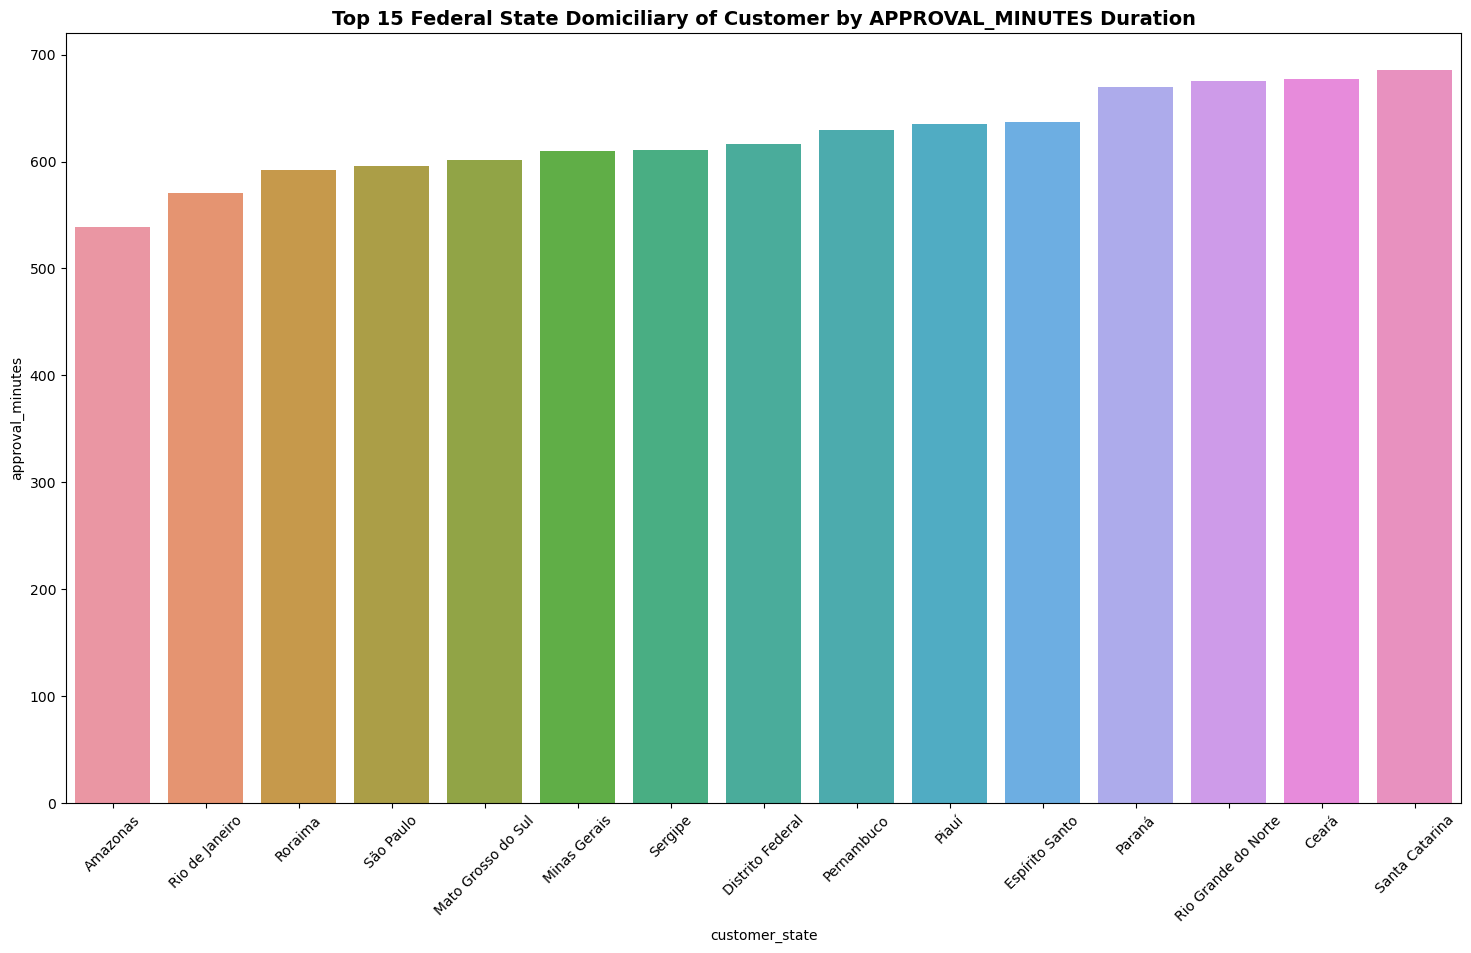

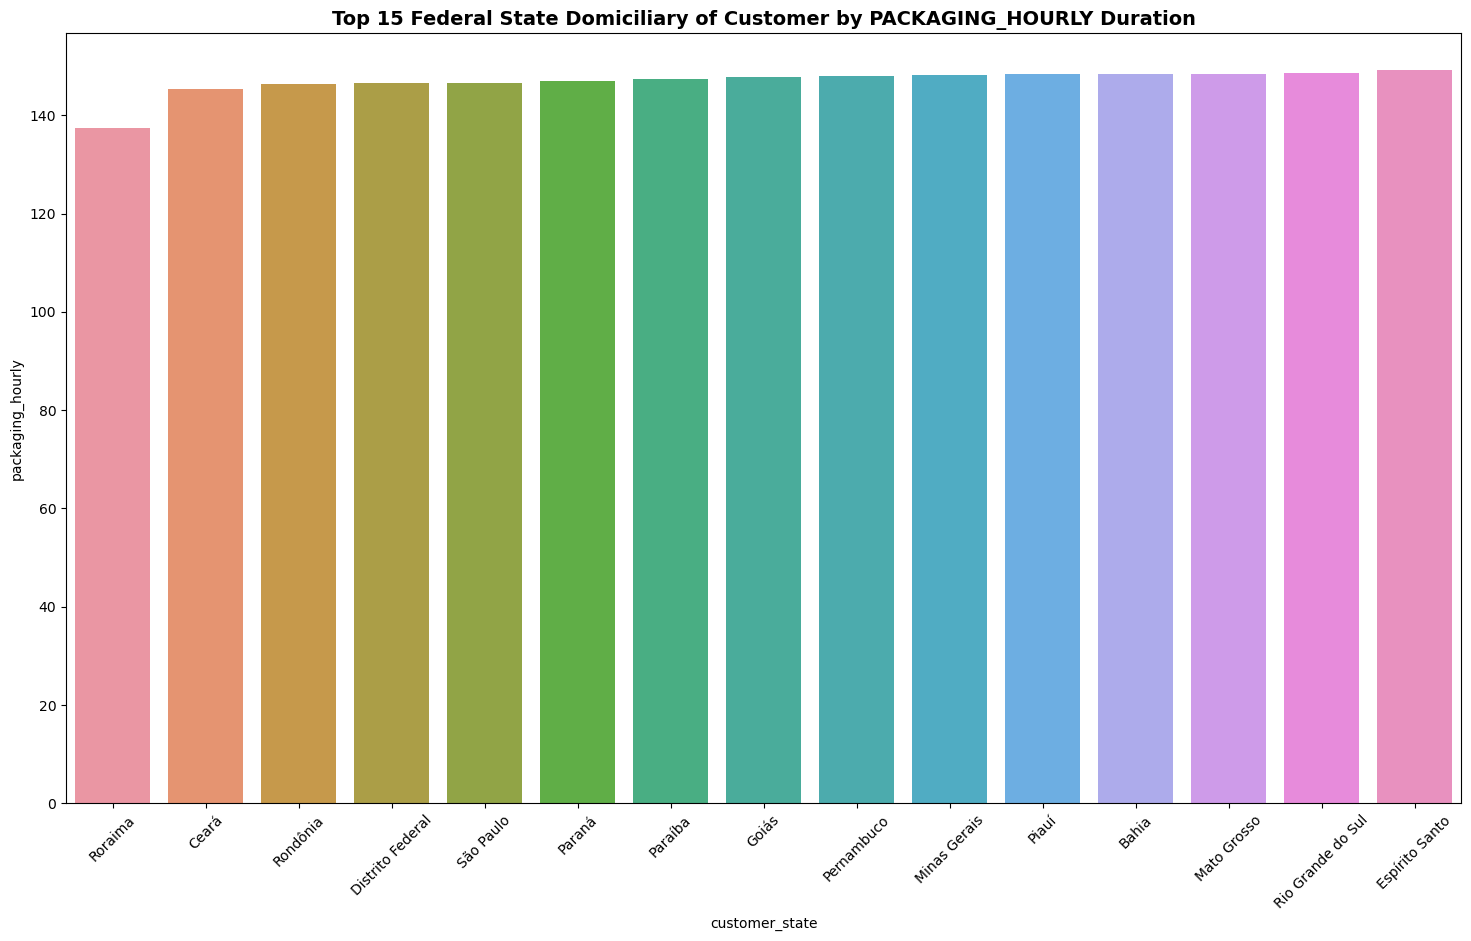

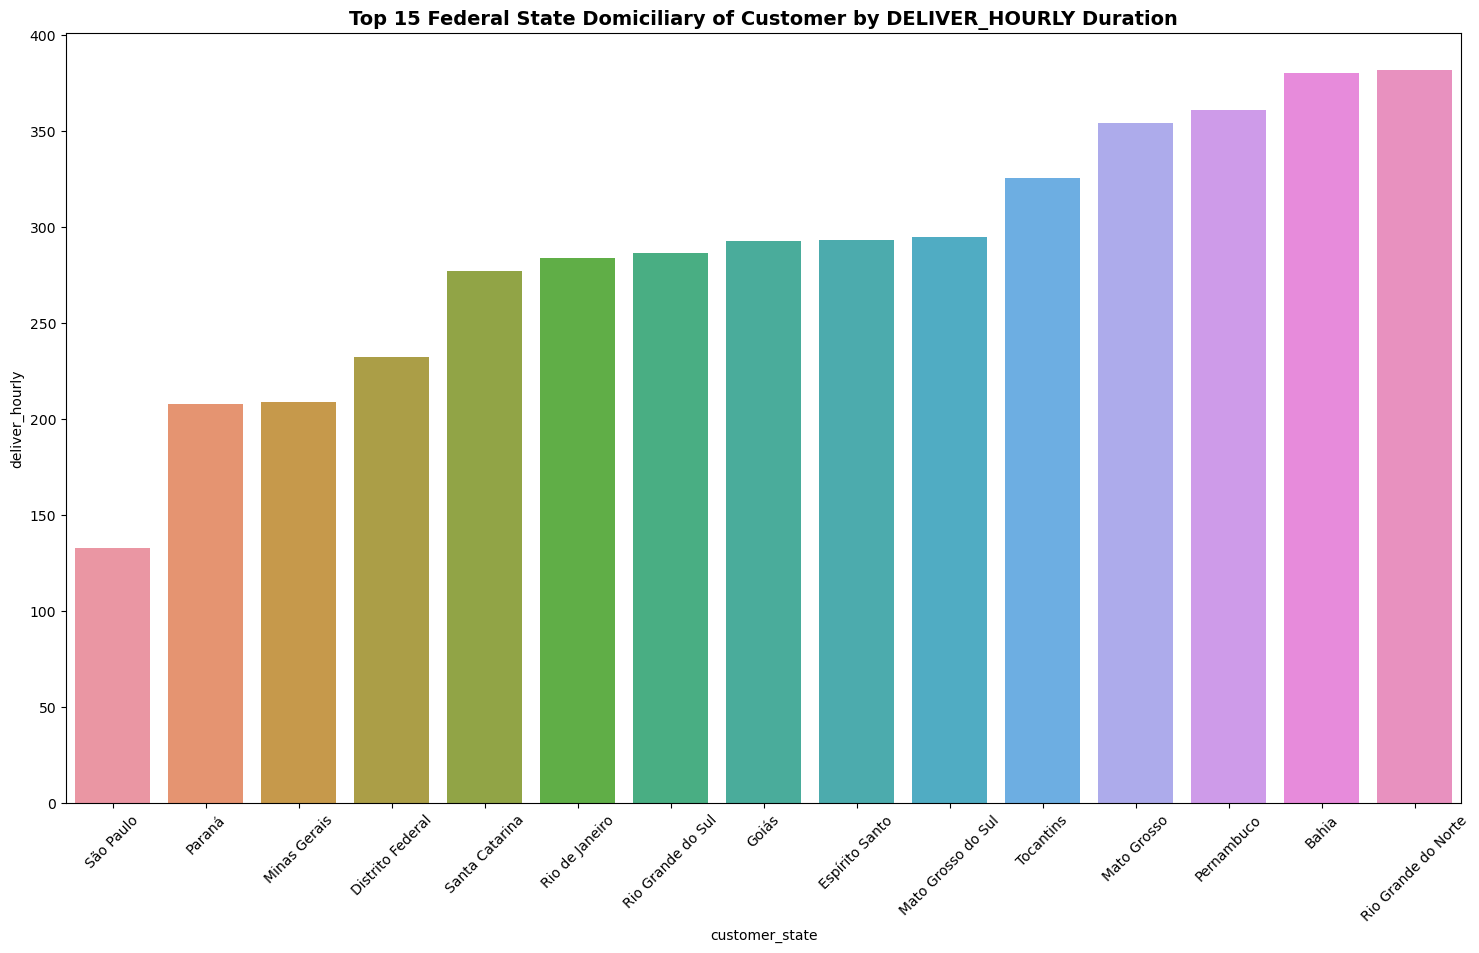

In [31]:
# urutkan df group by baru berdasarkan kolom approval minutes, packaging, dan deliver hourly
for col in ['approval_minutes', 'packaging_hourly', 'deliver_hourly']:
    plt.figure(figsize=(18,10))
    # dan tampilkan 15 baris teratas
    sns.barplot(data=stord_grp.sort_values(col, ascending=True).head(15), x='customer_state', y=col)
    plt.title('Top 15 Federal State Domiciliary of Customer by ' +  str(col).upper() + ' Duration', fontsize=14, fontweight='bold')
    # rotate x ticks around 45 degree
    plt.xticks(rotation=45)
    plt.show()

Order Processing Time from Approved until Delivered based on Customer City Domiciliary

In [33]:
# group customer city by mean approval_minutes, packaging_hourly, deliver_hourly
citord_grp = custrans_df.groupby('customer_city')[['approval_minutes', 'packaging_hourly','deliver_hourly']].mean().reset_index()
citord_grp

customer_city  approval_minutes  packaging_hourly  deliver_hourly
0     abadia dos dourados       1964.140000        165.156667      212.526667
1               abadiania         16.480000        431.880000      509.180000
2                  abaete        687.304000        136.800000      194.182000
3              abaetetuba        301.743333        118.253333      547.884667
4                 abaiara         93.530000        132.000000      774.315000
...                   ...               ...               ...             ...
4068             xinguara       2123.280000        128.479000      670.236000
4069          xique-xique       1290.526667        188.126667      287.513333
4070             zacarias         73.750000        132.000000      259.055000
4071              ze doca        192.364000        141.260000      603.054000
4072               zortea         16.900000        144.000000      662.070000

[4073 rows x 4 columns]

- **EMPTY CHART** represent if the confirmed order allowed less then a minute or immediately processed
- then the duration of hourly delivery, there's a city which deliery time need less than 1 hours 

For the Information about the City there are many factors that necessary to be consider such as geography location, customer's address, location of seller and its logistic partner

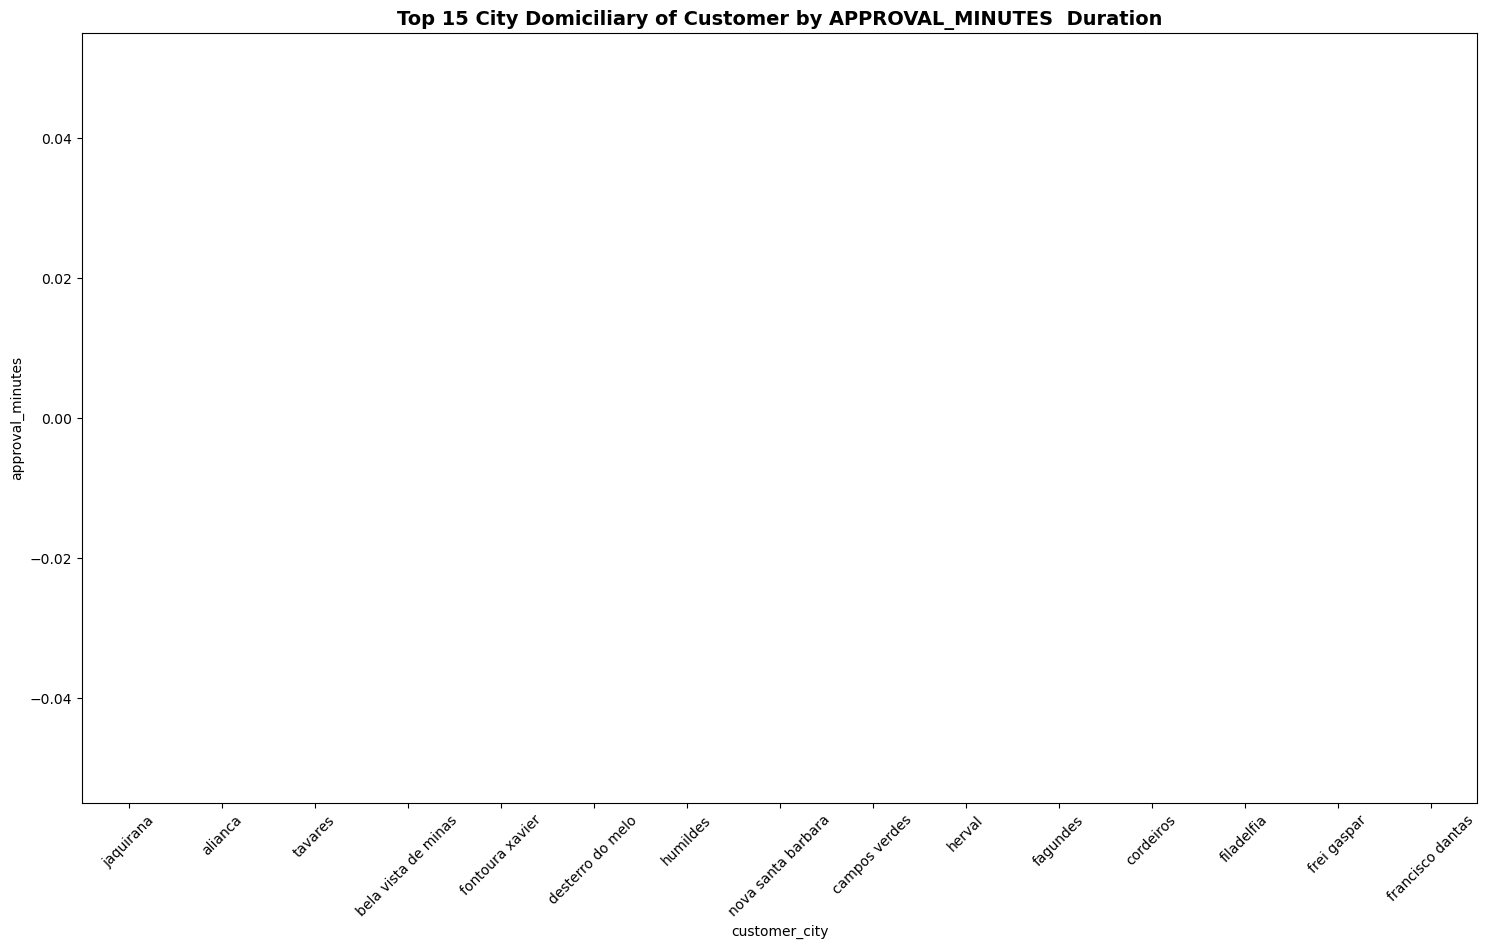

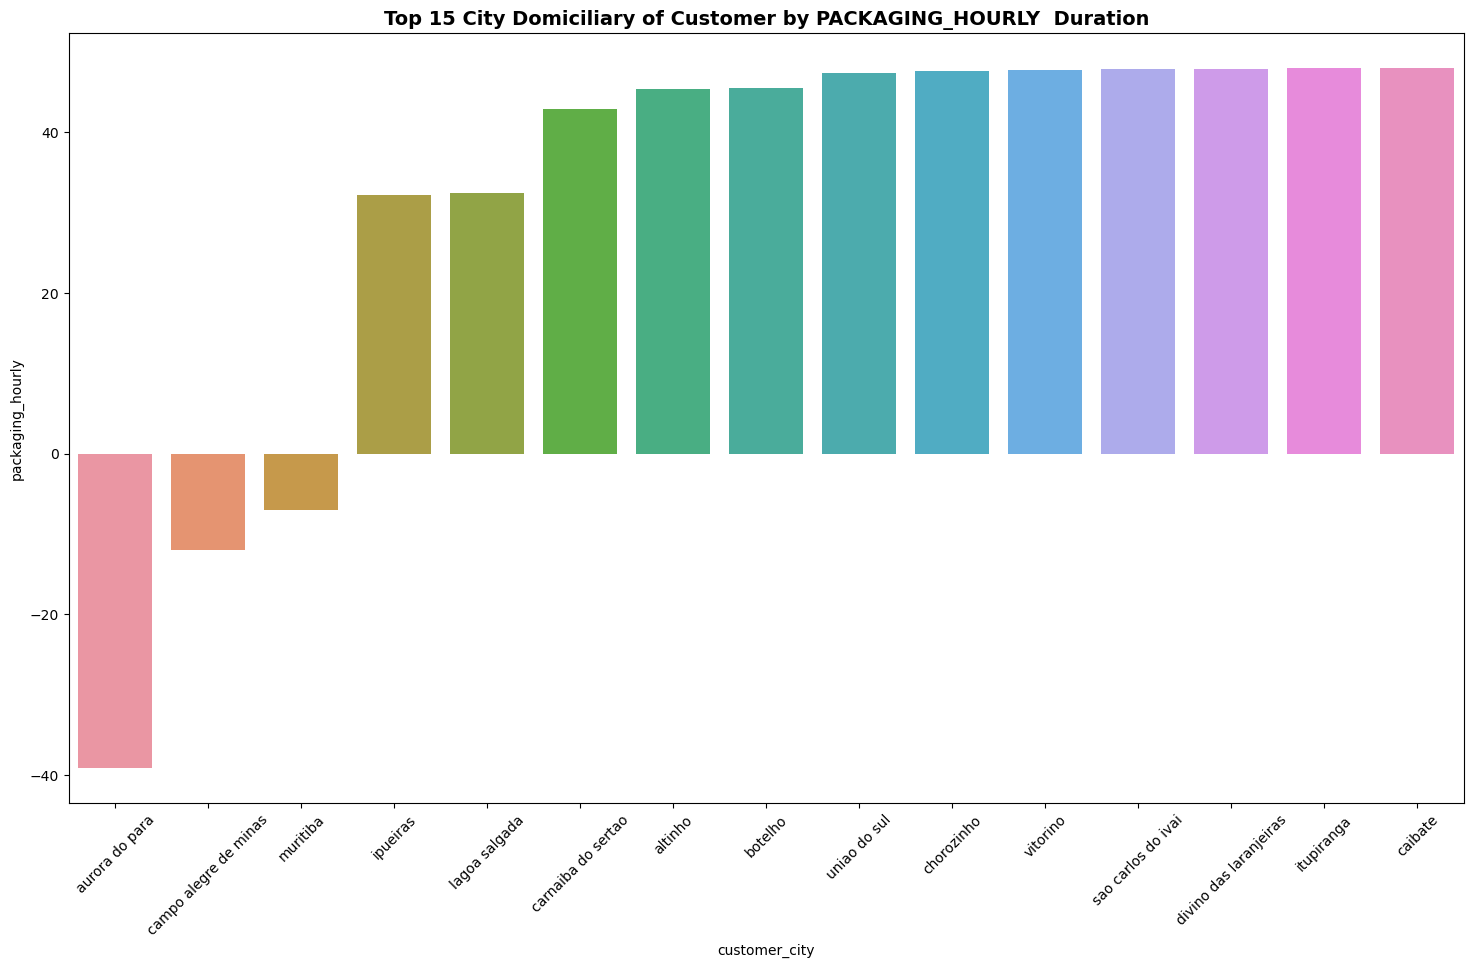

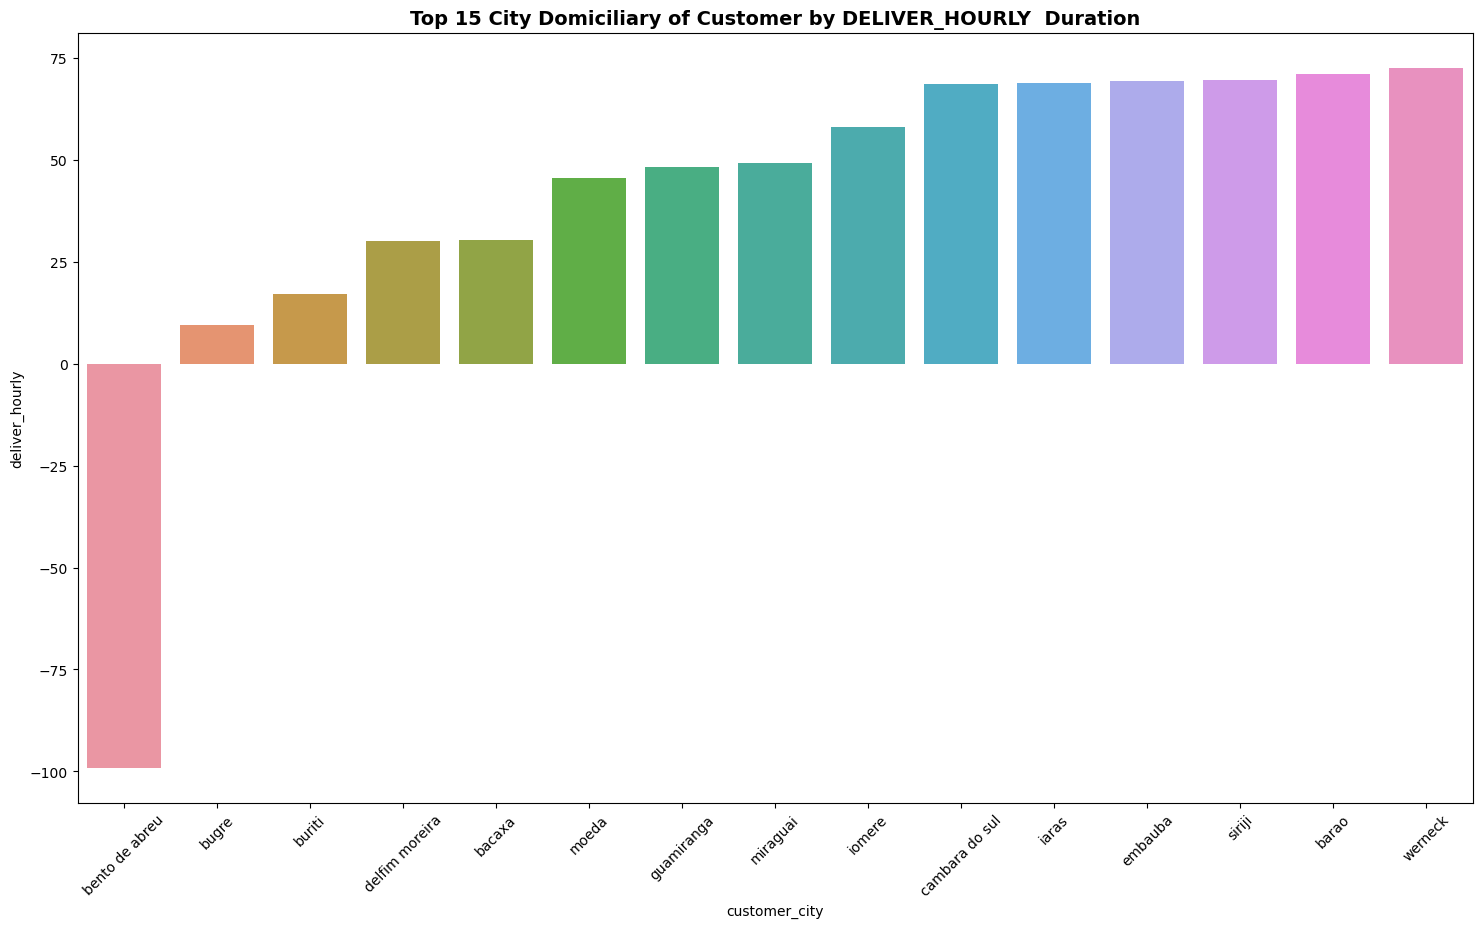

In [64]:
# urutkan df group by baru berdasarkan kolom approval minutes, packaging, dan deliver hourly
for col in ['approval_minutes','packaging_hourly', 'deliver_hourly']:
    plt.figure(figsize=(18,10))
    # dan tampilkan 15 baris teratas
    sns.barplot(data=citord_grp.sort_values(col, ascending=True).head(15), x='customer_city', y=col)
    plt.title('Top 15 City Domiciliary of Customer by ' + str(col).upper() + ' Duration', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45)
    plt.show()

In [39]:
# group product category by mean approval minutes, packaging hourly, deliver hourly
catord_grp = custrans_df.groupby('product_category')[['approval_minutes', 'packaging_hourly','deliver_hourly']].mean().reset_index()
catord_grp

product_category  approval_minutes  packaging_hourly  \
0   agro_industry_and_commerce       1850.915081        134.652114   
1             air_conditioning        731.844762        150.105544   
2                          art        776.335797        171.713527   
3        arts_and_craftmanship       1081.017917        115.644583   
4                        audio        607.419286        132.608016   
..                         ...               ...               ...   
66                  stationery        537.035281        142.622305   
67      tablets_printing_image        628.192069        170.150460   
68                   telephony        727.722504        140.102363   
69                        toys        526.568258        137.345020   
70               watches_gifts        603.065435        135.930665   

    deliver_hourly  
0       195.680976  
1       192.834150  
2       175.141836  
3        86.065417  
4       247.730979  
..             ...  
66      230.683690  
67      224.461379  
68      224.488063  
69      213.291938  
70      235.666739  

[71 rows x 4 columns]

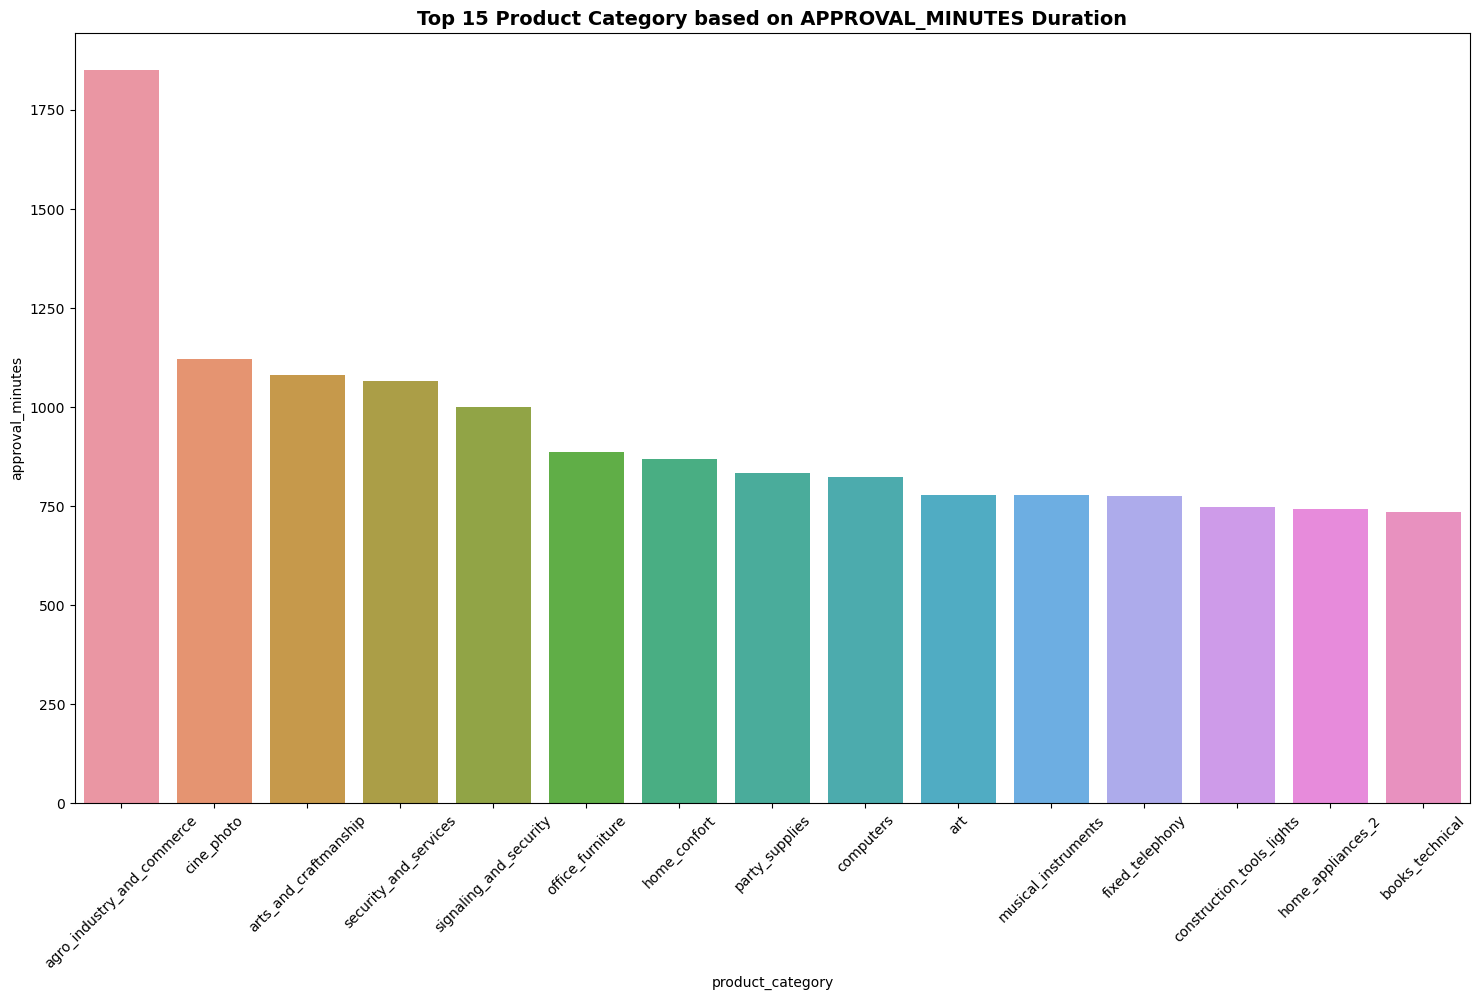

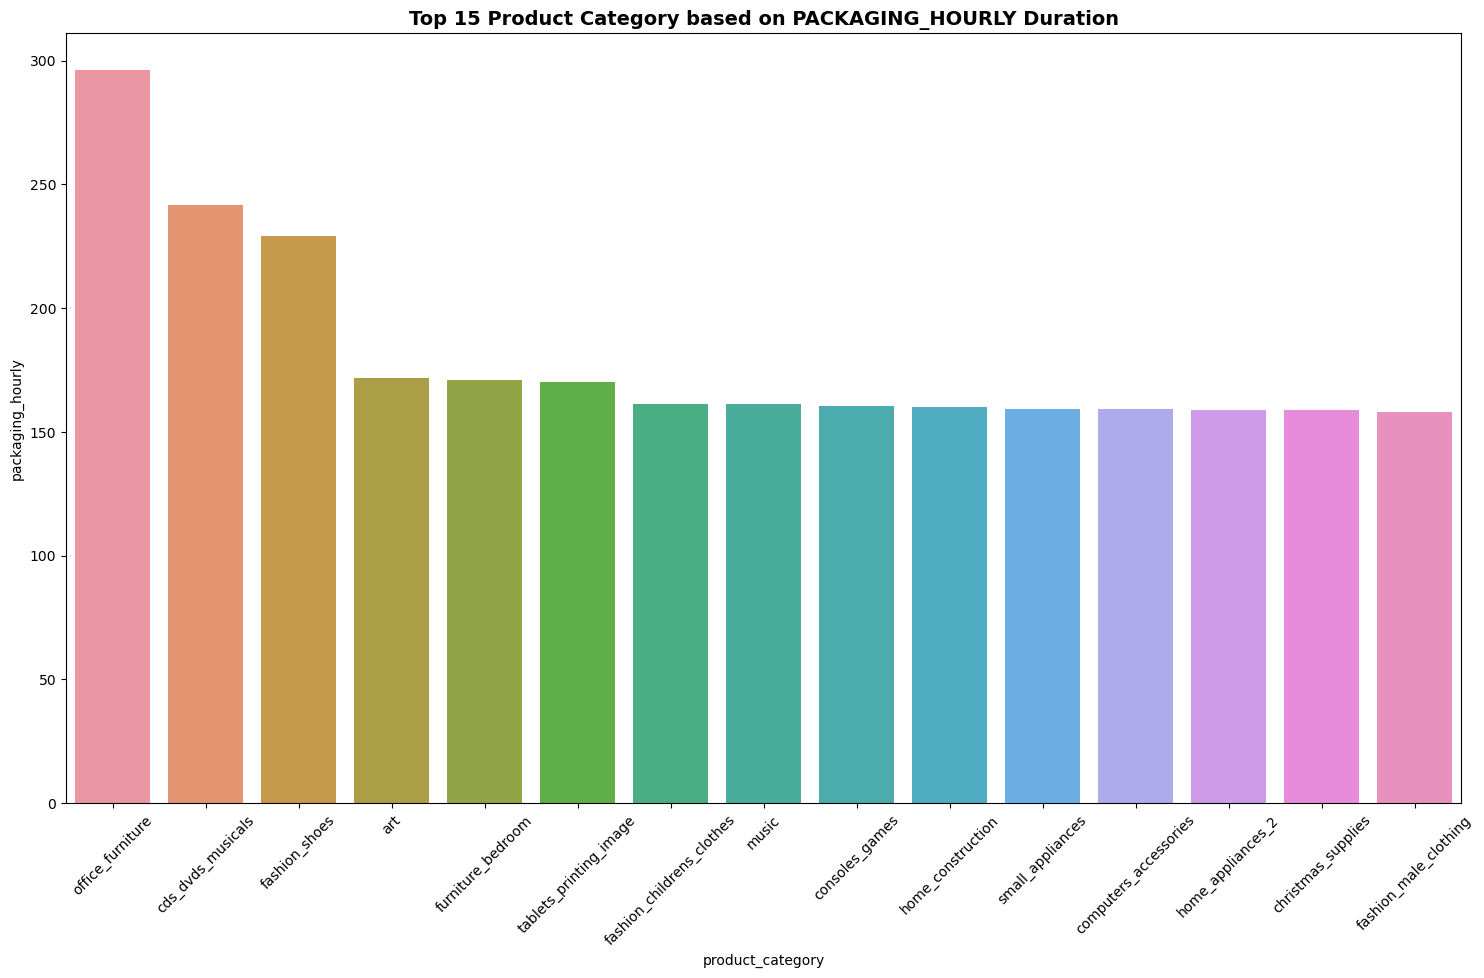

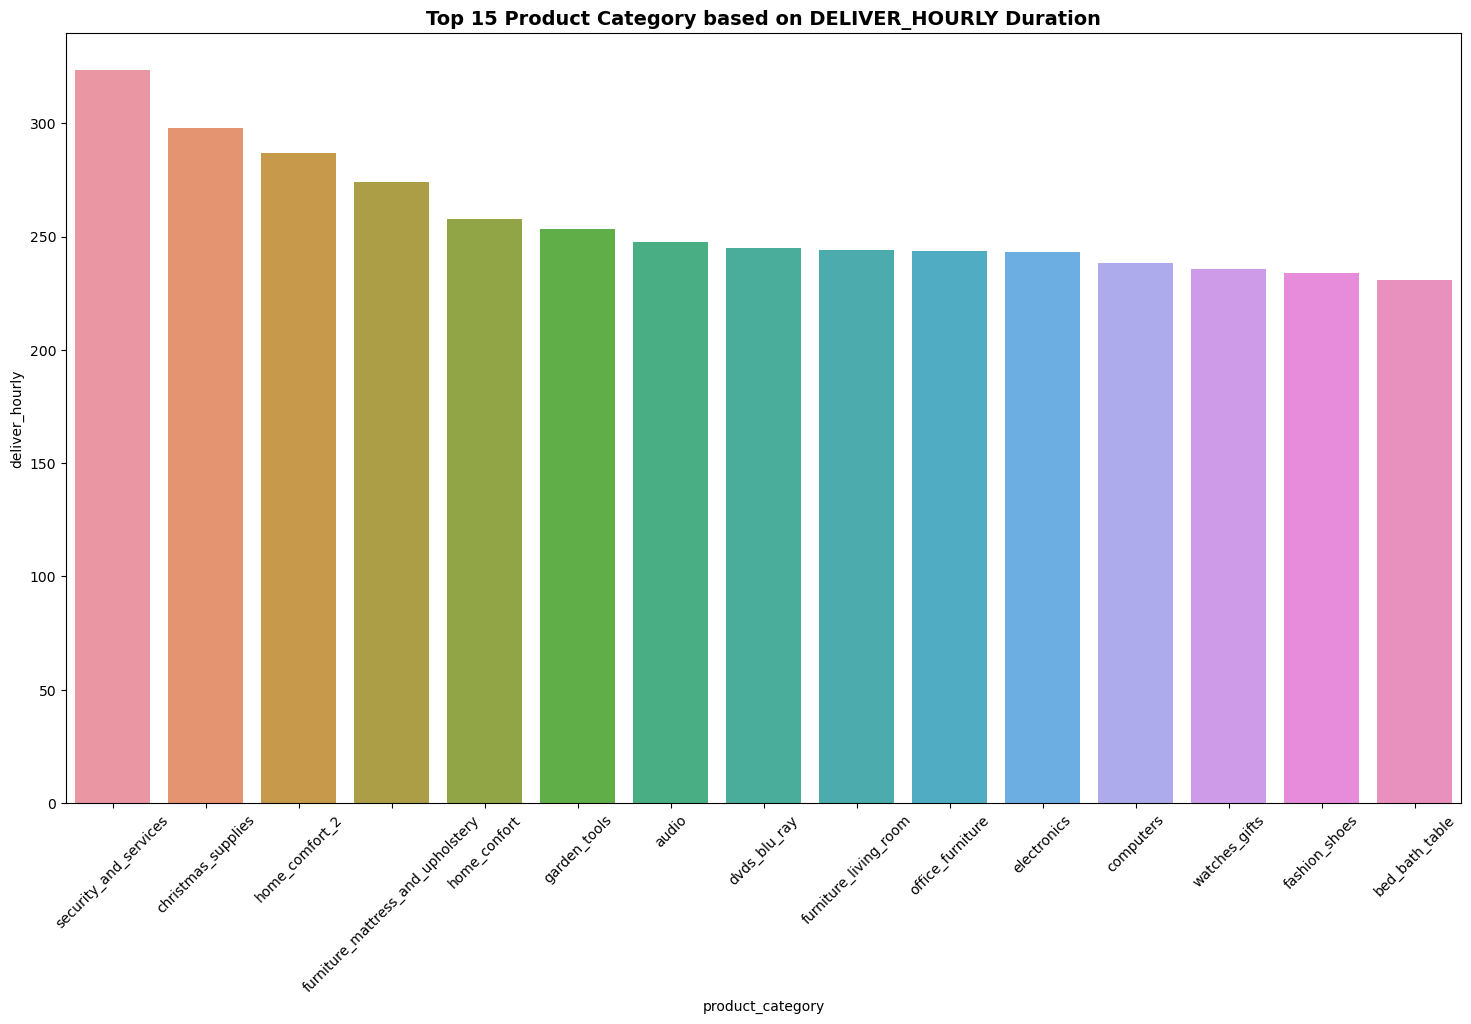

In [40]:
# urutkan df group by baru berdasarkan kolom approval minutes, packaging, dan deliver hourly
for col in ['approval_minutes', 'packaging_hourly','deliver_hourly']:
    plt.figure(figsize=(18,10))
    # dan tampilkan 15 baris teratas
    sns.barplot(data=catord_grp.sort_values(col, ascending=False).head(15), x='product_category', y=col)
    plt.title('Top 15 Product Category based on ' + str(col).upper() + ' Duration', fontsize=14, fontweight='bold')    
    plt.xticks(rotation=45)
    plt.show()

### Correlation of Shopping Transaction Data with Time Elapsed of Order, Payment dan Product Category
- Indexed Column: order status, payment sequential, payment type, product category
- Aggregated Column : price, freight_value, total_amount, payment_value, payment_change

In [13]:
# group order status by mean price, freight_value, total_amount, payment_value, payment_change
ord_trans = custrans_df.groupby('order_status')[['price','freight_value','total_amount',
                                                 'payment_value','payment_change']].mean().reset_index()
ord_trans.style.background_gradient(cmap='PiYG', axis=0)

In [399]:
# group payment sequential by mean price, freight_value, total_amount, payment_value, payment_change
payseq_trans = custrans_df.groupby('payment_sequential')[['price','freight_value','total_amount',
                                                          'payment_value','payment_change']].mean().reset_index()
payseq_trans

payment_sequential       price  freight_value  total_amount  \
0                    1  120.062256      19.980141    140.042398   
1                    2  125.704353      20.892670    146.597022   
2                    3  100.207328      20.423952    120.631280   
3                    4  106.477933      20.932000    127.409933   
4                    5  131.368652      22.988427    154.357079   
5                    6  146.431475      23.922541    170.354016   
6                    7  152.304096      23.354578    175.658675   
7                    8  139.263208      20.310943    159.574151   
8                    9  143.371395      20.889767    164.261163   
9                   10  139.542973      21.480541    161.023514   
10                  11  146.665455      22.273333    168.938788   
11                  12  147.382800      23.571600    170.954400   
12                  13  141.084286      23.585714    164.670000   
13                  14  143.023333      24.575833    167.599167   
14                  15  119.939000      18.168000    138.107000   
15                  16   52.331250      16.833750     69.165000   
16                  17   52.331250      16.833750     69.165000   
17                  18   52.331250      16.833750     69.165000   
18                  19   52.331250      16.833750     69.165000   
19                  20   37.754000      15.216000     52.970000   
20                  21   37.754000      15.216000     52.970000   
21                  22   39.495000      12.270000     51.765000   
22                  23   49.990000      12.690000     62.680000   
23                  24   49.990000      12.690000     62.680000   
24                  25   49.990000      12.690000     62.680000   
25                  26   49.990000      12.690000     62.680000   

    payment_value  payment_change  
0      177.015668       41.211713  
1       83.467810       78.431366  
2       33.284352       91.482544  
3       24.393133      103.794667  
4       24.869438      129.489101  
5       23.498115      146.855902  
6       20.814096      154.844578  
7       14.668302      144.905849  
8       14.480698      149.780465  
9       18.286757      142.736757  
10      14.893333      154.045455  
11      18.722800      152.231600  
12      10.901429      153.768571  
13      14.653333      152.945833  
14      12.950000      125.157000  
15       9.840000       59.325000  
16       9.331250       59.833750  
17       3.950000       65.215000  
18       3.100000       66.065000  
19       3.182000       49.788000  
20       1.074000       51.896000  
21       1.055000       50.710000  
22       1.030000       61.650000  
23       2.790000       59.890000  
24       1.530000       61.150000  
25      23.100000       39.580000

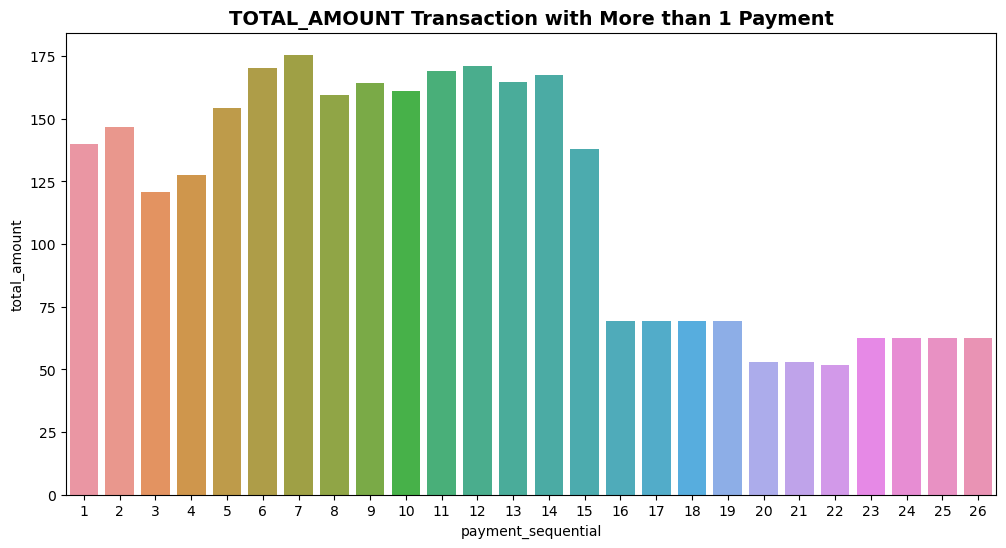

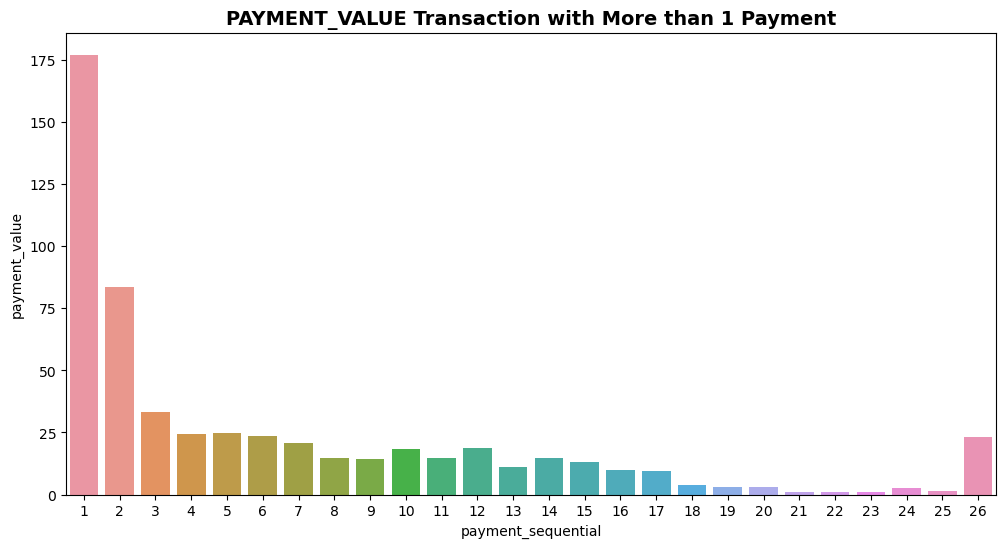

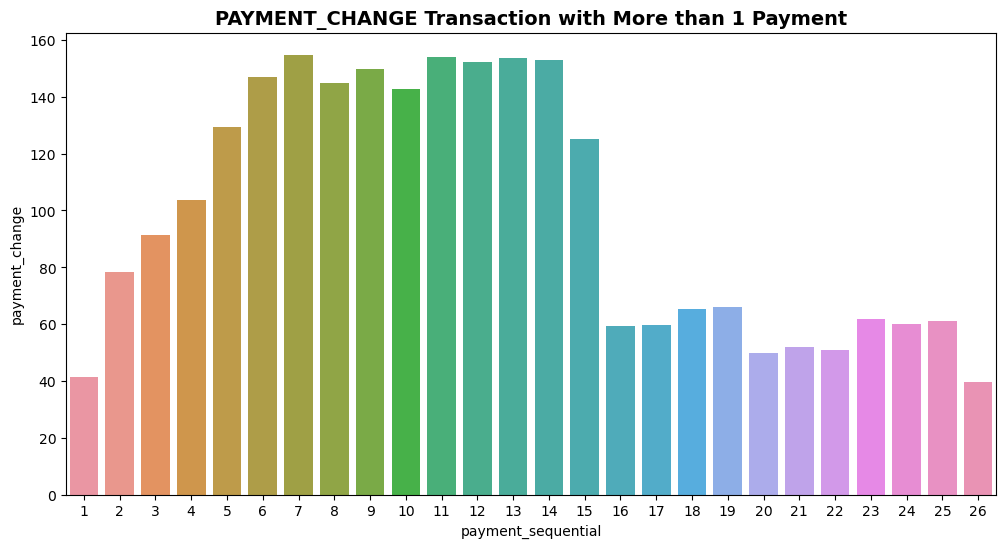

In [401]:
# urutkan df group by baru berdasarkan kolom total amount, payment value, dan payment change
for col in ['total_amount', 'payment_value', 'payment_change']:
    plt.figure(figsize=(12,6))
    # dan tampilkan 15 baris teratas
    sns.barplot(data=payseq_trans.sort_values(col, ascending=False), x='payment_sequential', y=col)
    plt.title(str(col).upper() + ' Transaction with More than 1 Payment', fontsize=14, fontweight='bold')
    plt.show()

Number of Customer Transaction by Payment Method Preference

In [71]:
# group payment type by mean price, freight_value, total_amount, payment_value, payment_change
paytrans_grp = custrans_df.groupby('payment_type')[['price','freight_value','total_amount',
                                                    'payment_value','payment_change']].mean().reset_index()
paytrans_grp

payment_type       price  freight_value  total_amount  payment_value  \
0       boleto  104.096274      19.702923    123.799197     176.284462   
1  credit_card  125.862666      20.157077    146.019743     179.317710   
2   debit_card  107.656157      18.556157    126.212313     149.292461   
3      voucher  103.049624      19.748544    122.798168      64.712114   

   payment_change  
0       52.485265  
1       39.420702  
2       23.315891  
3       68.611584

according the transaction of payment data
- most of customer payment made using boleto and credit card
- followed by customer who make payment using debit card and few customer using Voucher

However about the amount of change of payment which the biggest change value is Voucher
- because generally voucher contains offer, promotions or discount that make customer pay cheaper
- even must pay more than one sequence, it potentialy make they become loyal customers

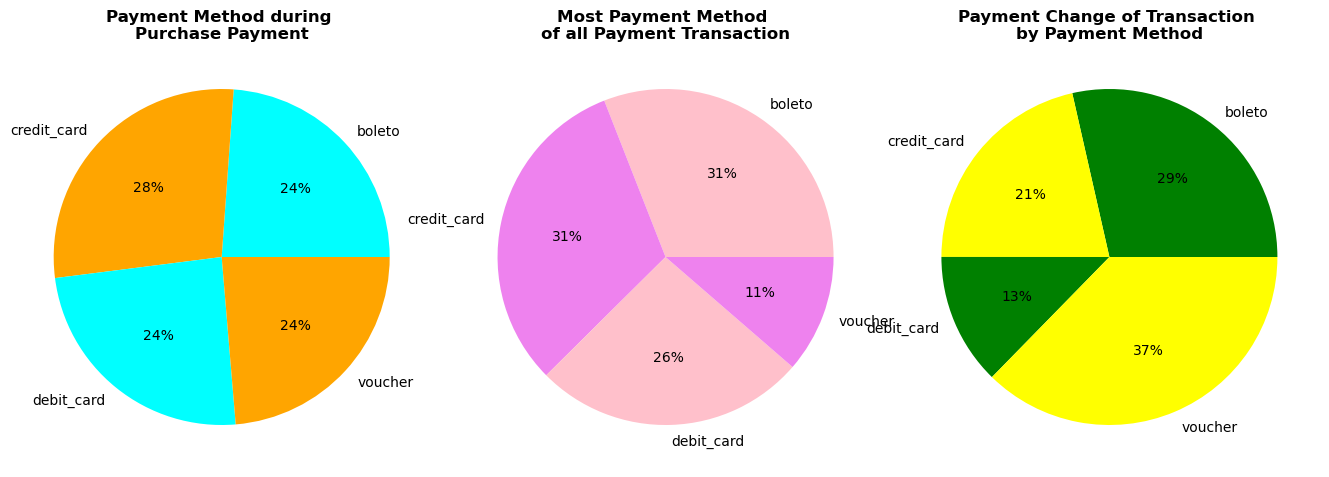

In [391]:
fig = plt.figure(figsize=(21,12))

# left pie chart, put on the left of 1 row x 3 columns
pie1 = fig.add_subplot(221) 
pie1.pie(paytrans_grp['total_amount'], labels=paytrans_grp['payment_type'], 
        autopct='%.0f%%', colors=('cyan','orange'))
plt.title('Payment Method during \nPurchase Payment', fontweight='bold')

# middle piechart, put in the middle of 1 row x 3 columns
pie2 = fig.add_subplot(211) 
pie2.pie(paytrans_grp['payment_value'], labels=paytrans_grp['payment_type'], 
        autopct='%.0f%%', colors=('pink','violet'))
plt.title('Most Payment Method \nof all Payment Transaction', fontweight='bold')

# right piechart, put on the right of 1 row x 3 columns 
pie3 = fig.add_subplot(222)
pie3.pie(paytrans_grp['payment_change'], labels=paytrans_grp['payment_type'], 
        autopct='%.0f%%', colors=('green','yellow'))
plt.title('Payment Change of Transaction \nby Payment Method', fontweight='bold')

plt.show()

In [28]:
# custrans_df['payment_sequential'].value_counts()
payment_typeseq = custrans_df.groupby(['payment_type','payment_sequential'])['customer_id'].nunique().reset_index()
payment_typeseq[payment_typeseq['payment_type']!='voucher']

payment_type  payment_sequential  customer_id
0       boleto                   1        18453
1       boleto                   2            1
2  credit_card                   1        71010
3  credit_card                   2          304
4  credit_card                   3            1
5   debit_card                   1         1392
6   debit_card                   2           48
7   debit_card                   3            1

In [29]:
payment_typeseq[payment_typeseq['payment_type']=='voucher']

payment_type  payment_sequential  customer_id
8       voucher                   1         1434
9       voucher                   2         2505
10      voucher                   3          539
11      voucher                   4          255
12      voucher                   5          154
13      voucher                   6          104
14      voucher                   7           70
15      voucher                   8           43
16      voucher                   9           34
17      voucher                  10           28
18      voucher                  11           25
19      voucher                  12           18
20      voucher                  13           11
21      voucher                  14            9
22      voucher                  15            7
23      voucher                  16            5
24      voucher                  17            5
25      voucher                  18            5
26      voucher                  19            5
27      voucher                  20            3
28      voucher                  21            3
29      voucher                  22            2
30      voucher                  23            1
31      voucher                  24            1
32      voucher                  25            1
33      voucher                  26            1

In [42]:
# group payment sequential by mean price, freight_value, total_amount, payment_value, payment_change
catrans_grp = custrans_df.groupby('product_category')[['price','freight_value', 
                                                'total_amount','payment_value','payment_change']].mean().reset_index()
catrans_grp

product_category       price  freight_value  total_amount  \
0   agro_industry_and_commerce  332.835691      27.481382    360.317073   
1             air_conditioning  184.561156      22.551905    207.113061   
2                          art  116.795314      19.198454    135.993768   
3        arts_and_craftmanship   75.583750      15.422083     91.005833   
4                        audio  138.445688      15.751508    154.197196   
..                         ...         ...            ...           ...   
66                  stationery   90.387929      18.639076    109.027005   
67      tablets_printing_image   90.118506      14.946782    105.065287   
68                   telephony   70.728755      15.694751     86.423506   
69                        toys  116.446134      18.951123    135.397257   
70               watches_gifts  200.092825      16.798801    216.891626   

    payment_value  payment_change  
0      470.049756      203.940325  
1      302.209932      101.006599  
2      137.673671        7.934493  
3       96.923750        5.917917  
4      159.208995       15.758995  
..            ...             ...  
66     120.387796       19.029216  
67     115.435977       19.245862  
68     102.072699       23.236023  
69     144.198547       17.177940  
70     228.772276       28.423295  

[71 rows x 6 columns]

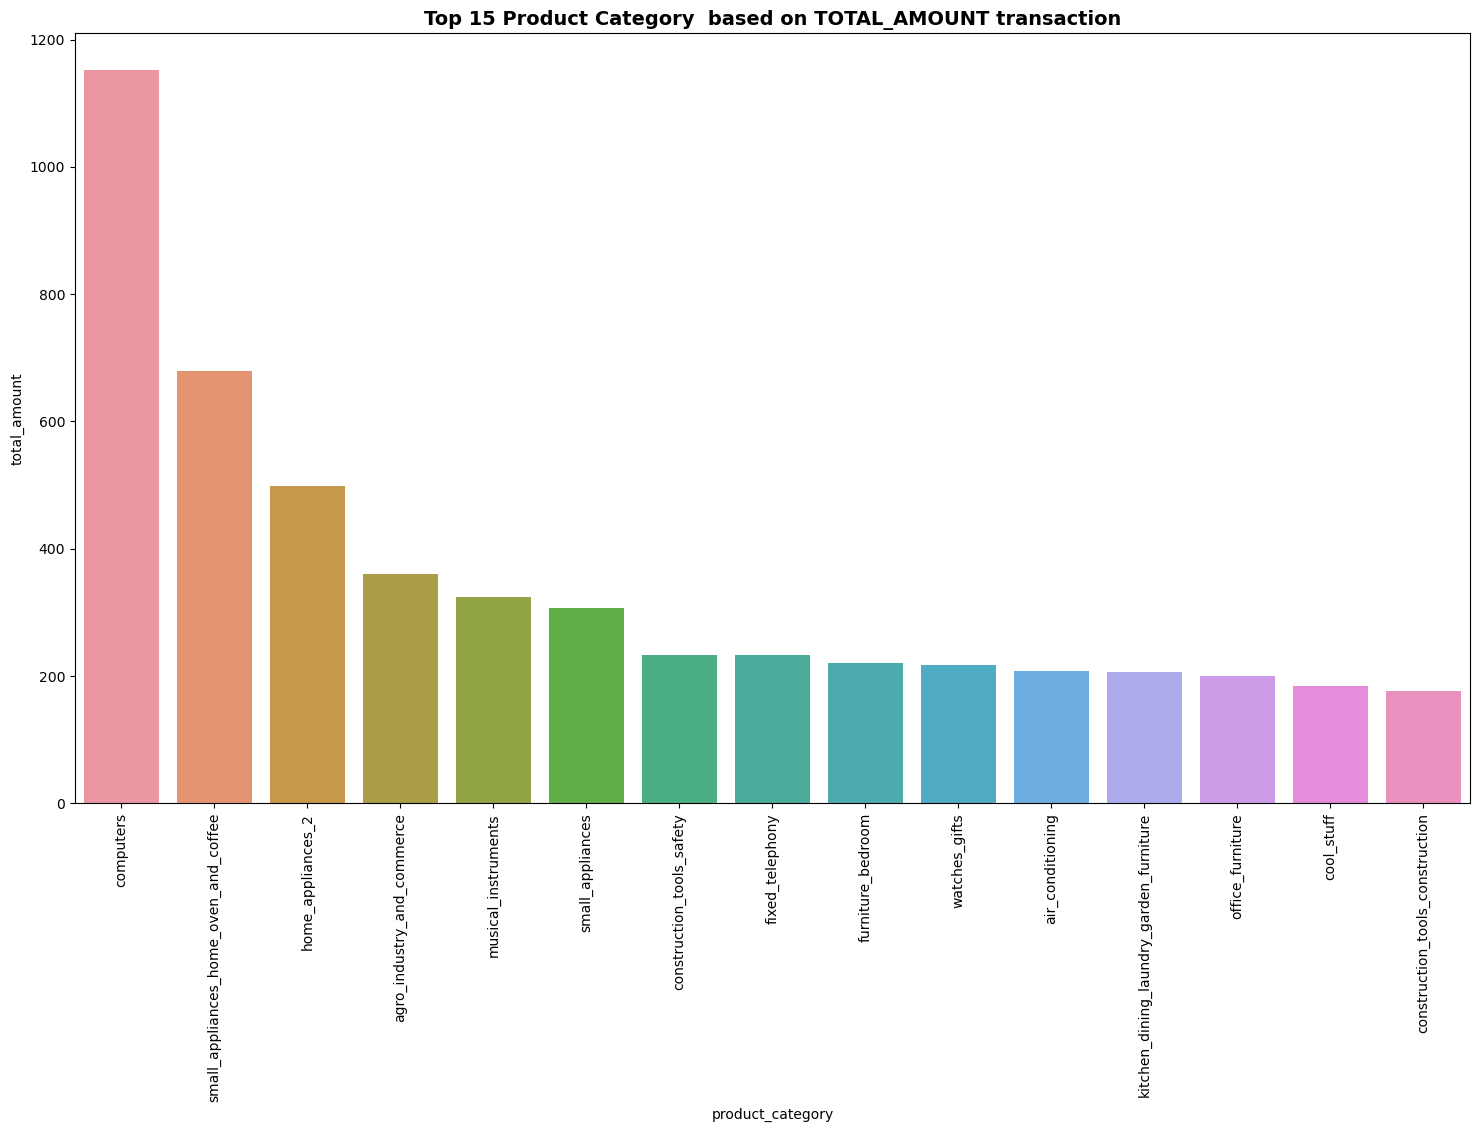

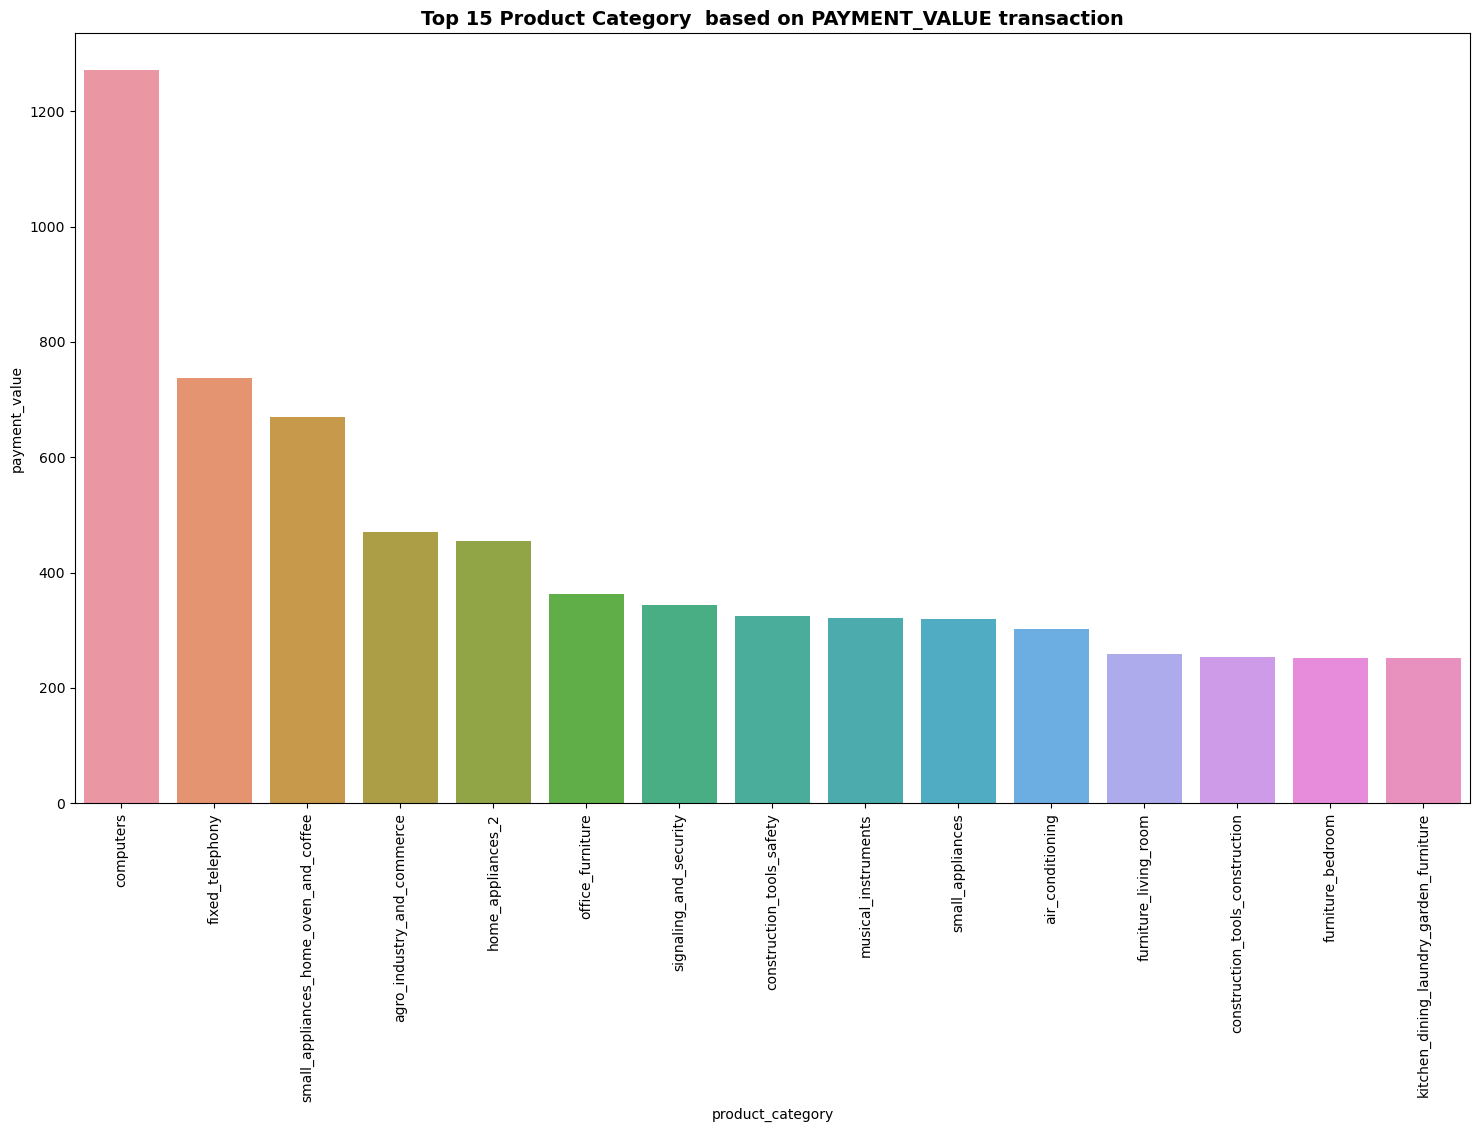

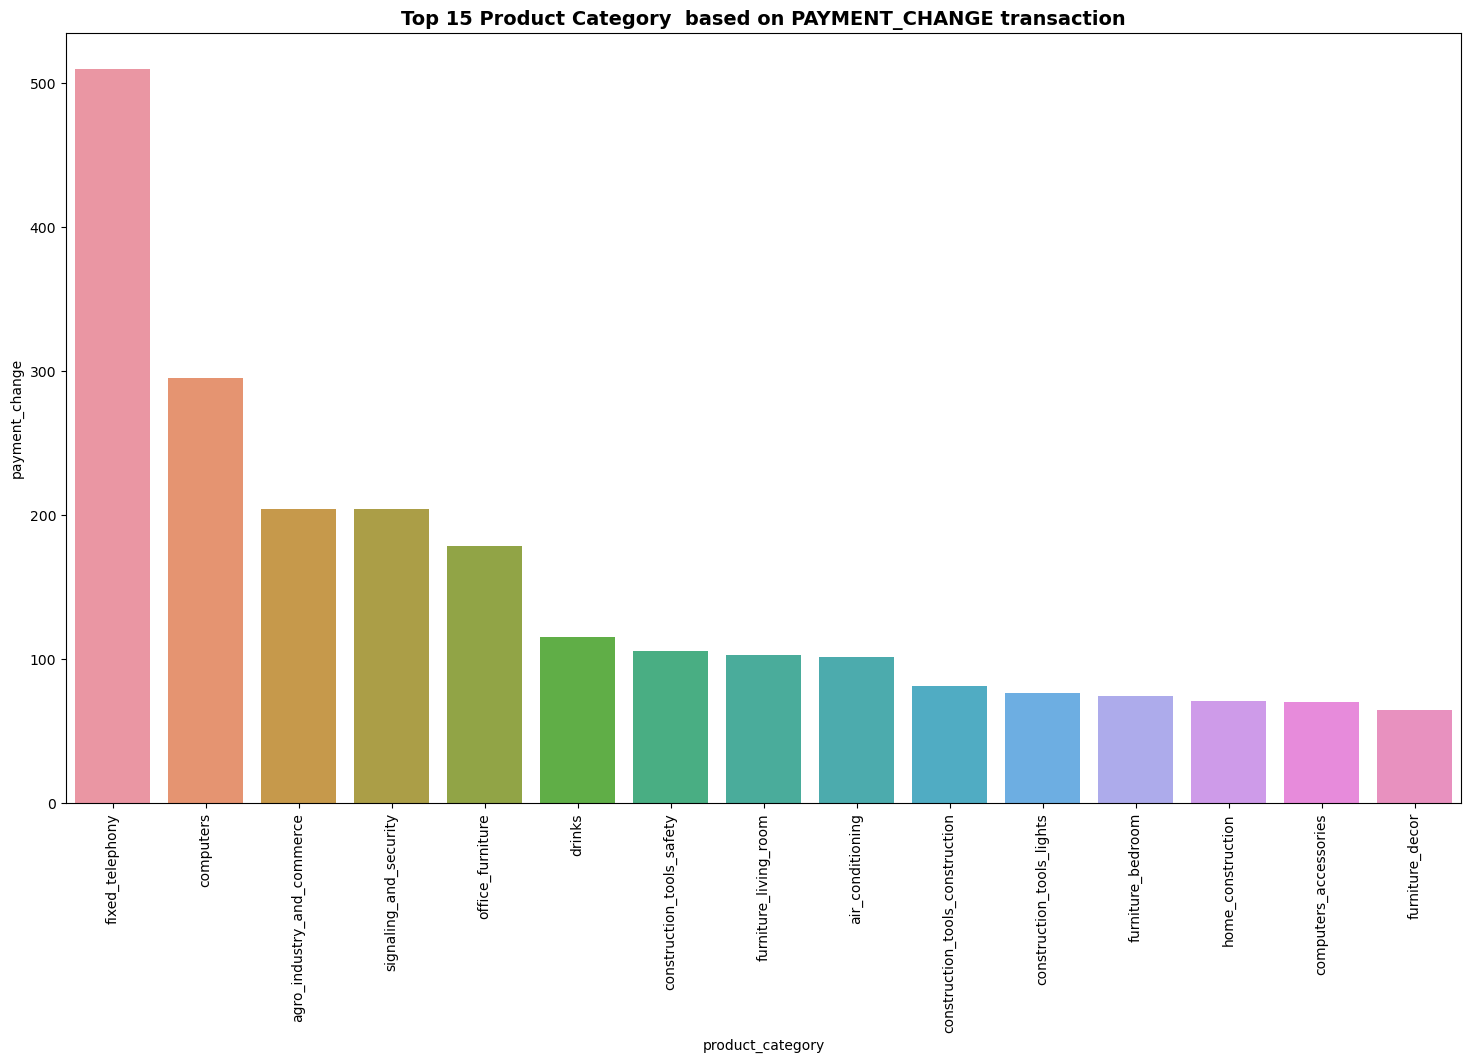

In [43]:
# urutkan df group by baru berdasarkan kolom total amount, payment value, dan payment change
for col in ['total_amount', 'payment_value', 'payment_change']:
    plt.figure(figsize=(18,10))
    # dan tampilkan 15 baris teratas
    sns.barplot(data=catrans_grp.sort_values(col, ascending=False).head(15), x='product_category', y=col)
    plt.title('Top 15 Product Category  based on ' +  str(col).upper() + ' transaction', fontsize=14, fontweight='bold')    
    plt.xticks(rotation=90)
    plt.show()

### Categorical Bivariate Correlation Analysis
Correlation of Customer Data with their Product and Orders to their domicile, product category, order status and payment
- Indexed Column: customer_state, product category, order status, payment type
- Aggregated Column : order_id, product_id, customer_id

In [44]:
# group customer state by count unique order id, customer id, product id 
stacust_grp = custrans_df.groupby('customer_state')[['order_id','customer_id','product_id']].nunique().reset_index()
stacust_grp

customer_state  order_id  customer_id  product_id
0                  Acre        78           74          79
1               Alagoas       393          383         361
2                 Amapá        67           66          69
3              Amazonas       144          140         144
4                 Bahia      3214         3119        2528
5                 Ceará      1265         1244        1065
6      Distrito Federal      2050         1990        1740
7        Espírito Santo      1978         1912        1631
8                 Goiás      1911         1850        1617
9              Maranhão       708          693         647
10          Mato Grosso       874          844         832
11   Mato Grosso do Sul       692          672         640
12         Minas Gerais     11185        10843        7091
13               Paraná      4855         4703        3651
14              Paraíba       509          496         474
15                 Pará       928          904         849
16           Pernambuco      1575         1533        1304
17                Piauí       469          457         439
18  Rio Grande do Norte       468          458         430
19    Rio Grande do Sul      5264         5089        3877
20       Rio de Janeiro     12167        11744        7537
21             Rondônia       238          227         245
22              Roraima        39           38          37
23       Santa Catarina      3492         3398        2705
24              Sergipe       333          327         301
25            São Paulo     39942        38632       18380
26            Tocantins       271          264         270

Customer Federal State Domiciliary by Population and its product Ordered
- Most of Customer orders and Number of Products are come from Sao Paolo State
- Followed by Federal State Domicialry from Rio De Jainero, Minas Gerais, Rop Grande do sul, and Parana

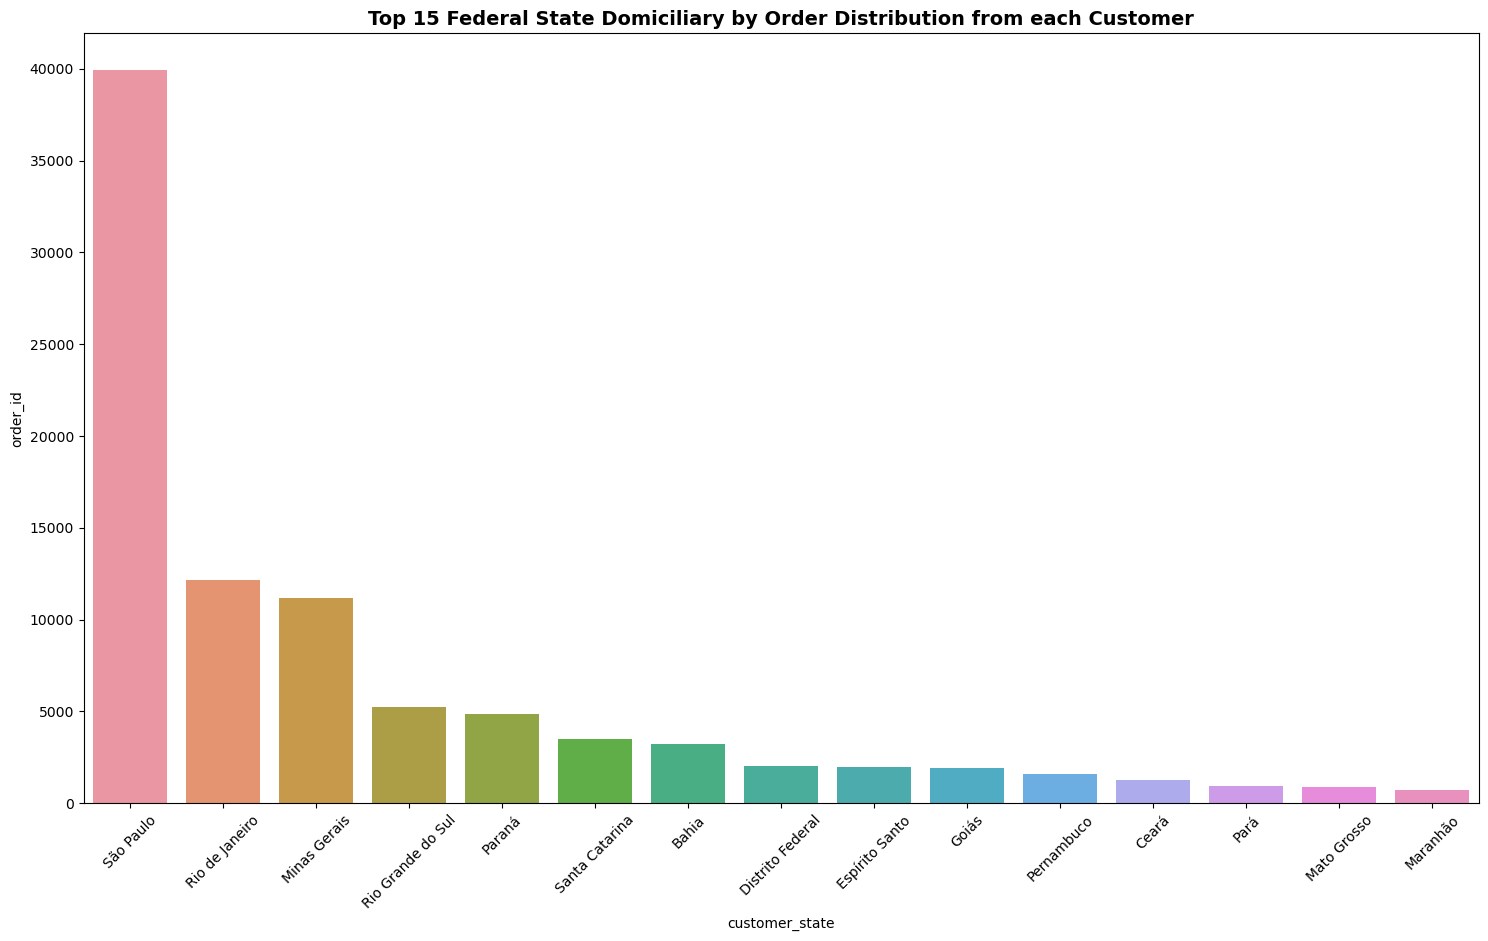

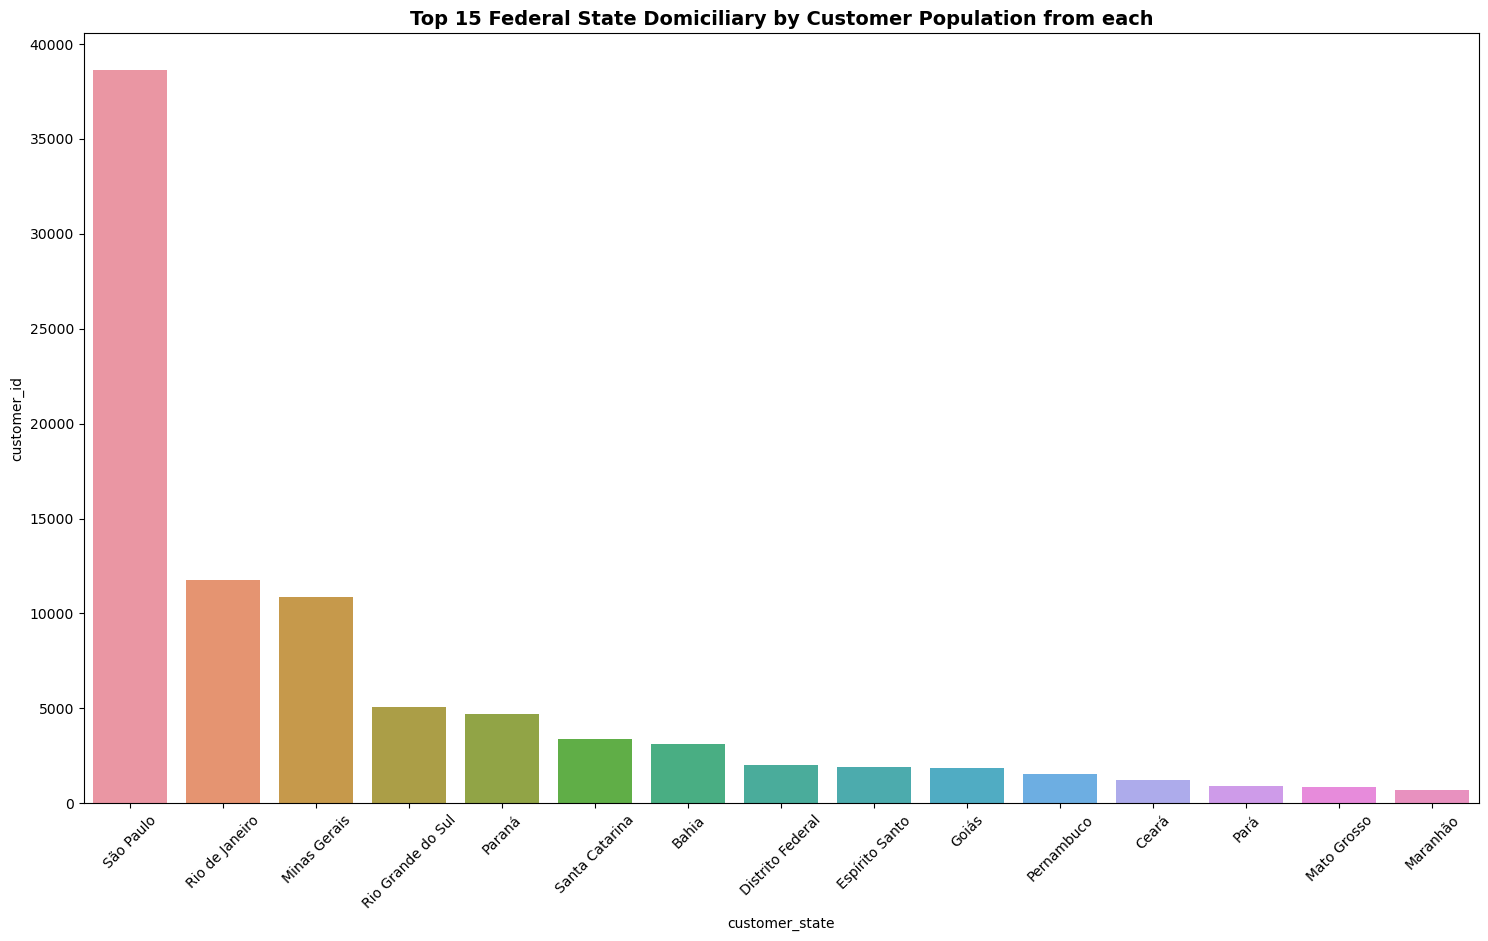

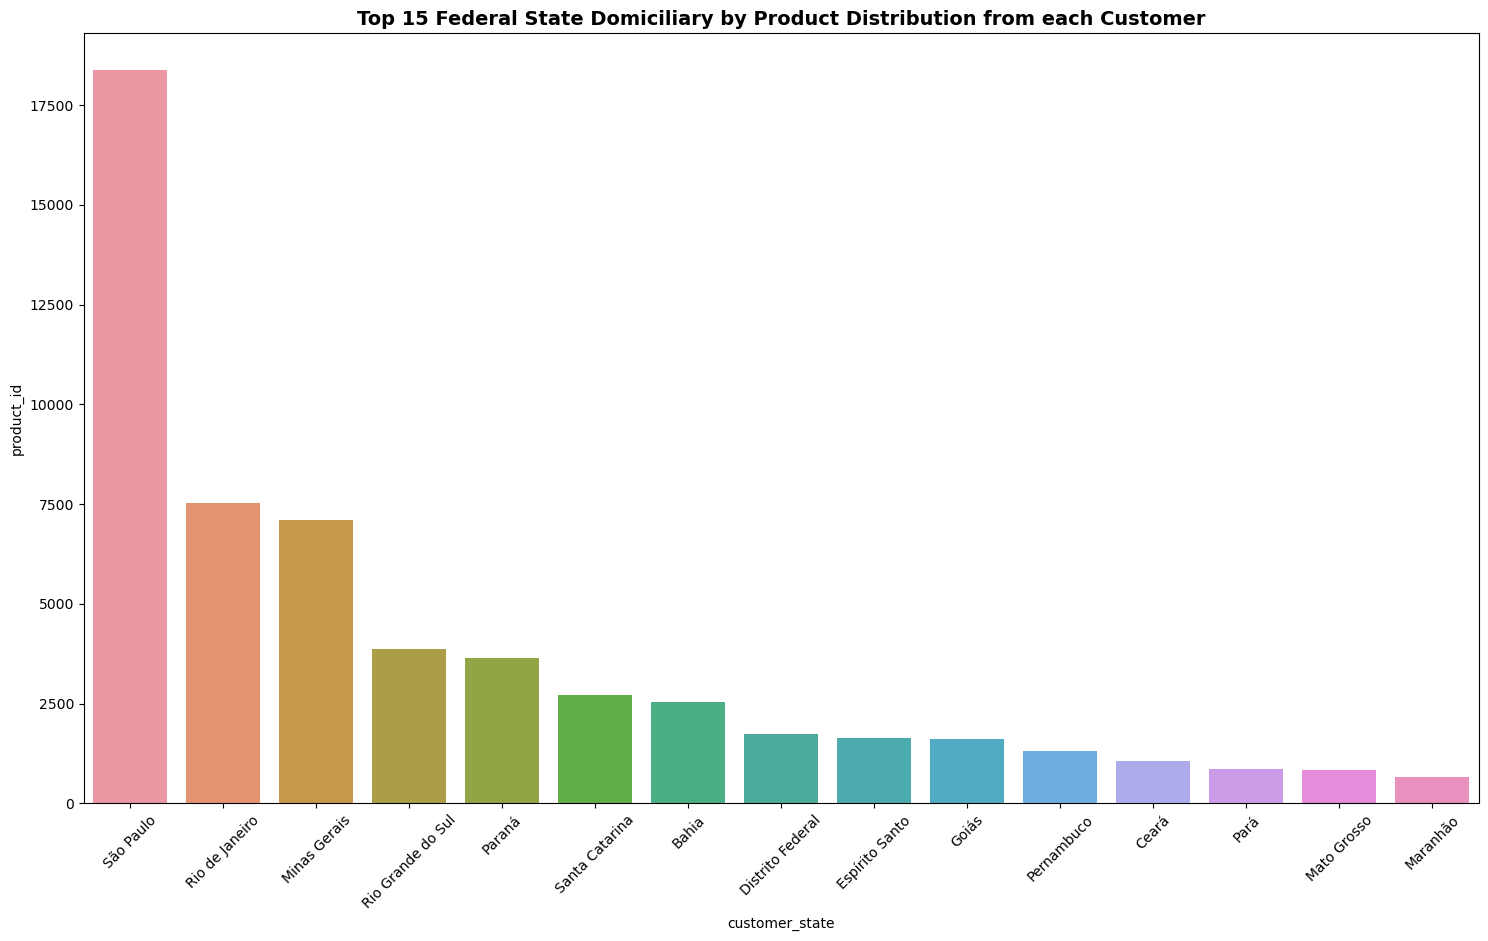

In [45]:
# urutkan df group by baru berdasarkan kolom jumlah order, customer, dan produk yang dipesan
for col in ['order_id','customer_id','product_id']:
    if col == 'order_id':
        plt.figure(figsize=(18,10))
        # dan tampilkan 15 baris teratas
        sns.barplot(data=stacust_grp.sort_values(col, ascending=False).head(15), x='customer_state', y=col)
        plt.title('Top 15 Federal State Domiciliary by Order Distribution from each Customer', fontsize=14, fontweight='bold')
        plt.xticks(rotation=45)
        plt.show()
    elif col == 'customer_id':
        plt.figure(figsize=(18,10))
        # dan tampilkan 15 baris teratas
        sns.barplot(data=stacust_grp.sort_values(col, ascending=False).head(15), x='customer_state', y=col)
        plt.title('Top 15 Federal State Domiciliary by Customer Population from each', fontsize=14, fontweight='bold')
        plt.xticks(rotation=45)
        plt.show()
    else:
        plt.figure(figsize=(18,10))
        # dan tampilkan 15 baris teratas
        sns.barplot(data=stacust_grp.sort_values(col, ascending=False).head(15), x='customer_state', y=col)
        plt.title('Top 15 Federal State Domiciliary by Product Distribution from each Customer', fontsize=14, fontweight='bold')
        plt.xticks(rotation=45)
        plt.show()

Customer City Domiciliary by Population and its product Ordered

In [46]:
# group customer city by count unique order id, customer id, product id 
citycust_grp = custrans_df.groupby('customer_city')[['order_id','customer_id','product_id']].nunique().reset_index()
citycust_grp

customer_city  order_id  customer_id  product_id
0     abadia dos dourados         3            3           3
1               abadiania         1            1           1
2                  abaete        10           10          10
3              abaetetuba        11           11          12
4                 abaiara         2            2           2
...                   ...       ...          ...         ...
4068             xinguara         9            9           9
4069          xique-xique         3            3           3
4070             zacarias         2            2           2
4071              ze doca         5            5           5
4072               zortea         1            1           1

[4073 rows x 4 columns]

- Most of Customer orders and Number of Products are come from Sao Paolo City
- Followed by Federal State Domicialry from Rio De janeiro, Belo Horizonte, Brasilia, Curitiba and Campinas

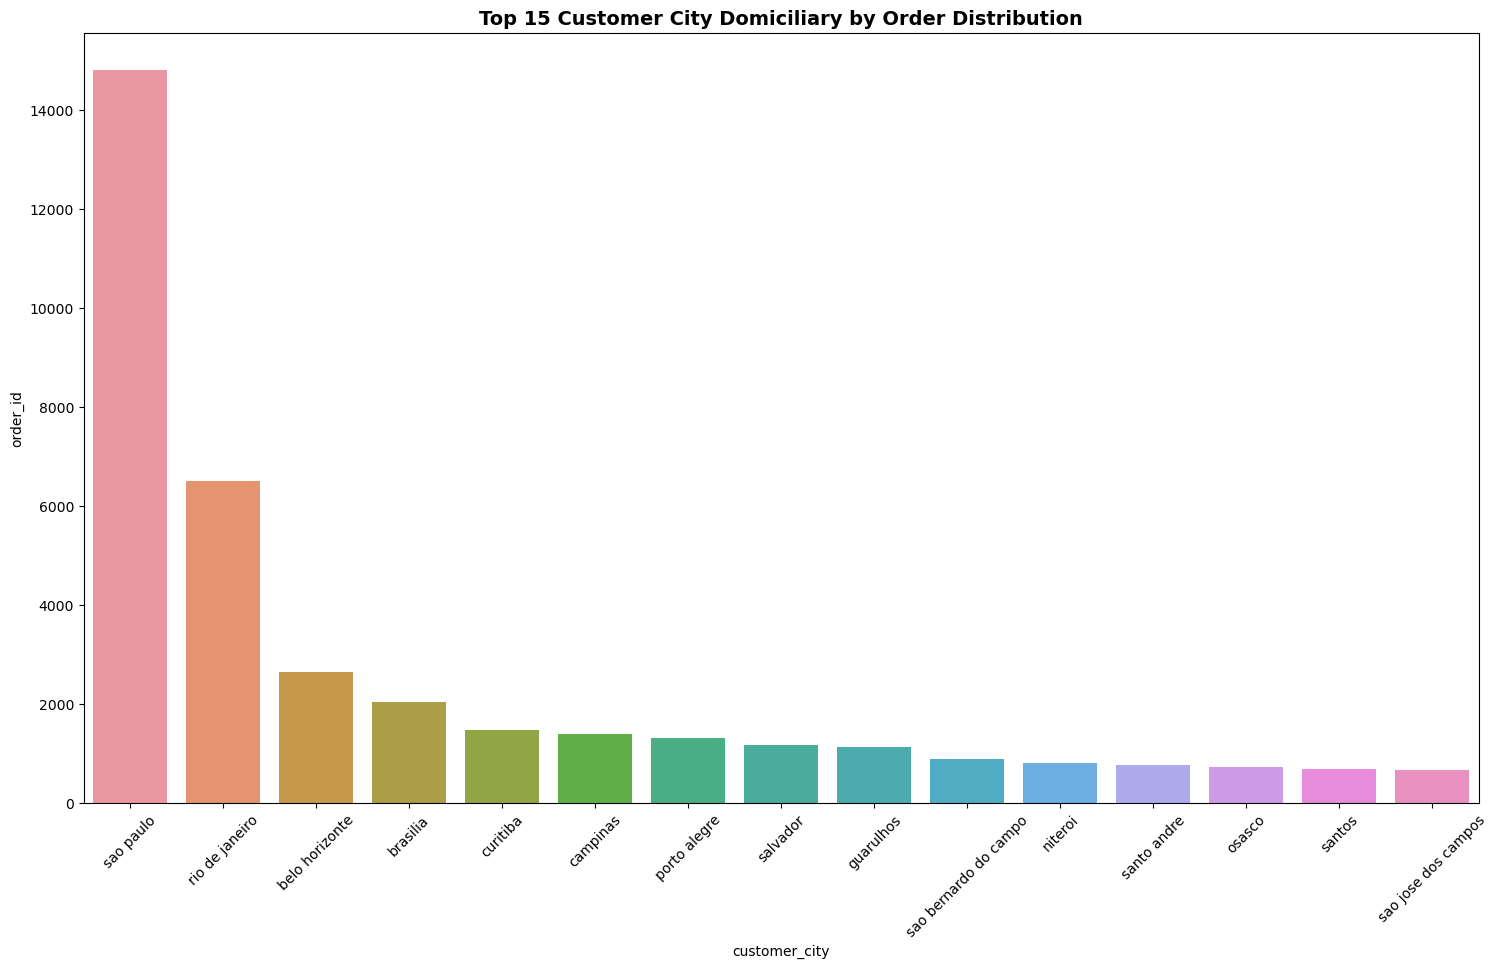

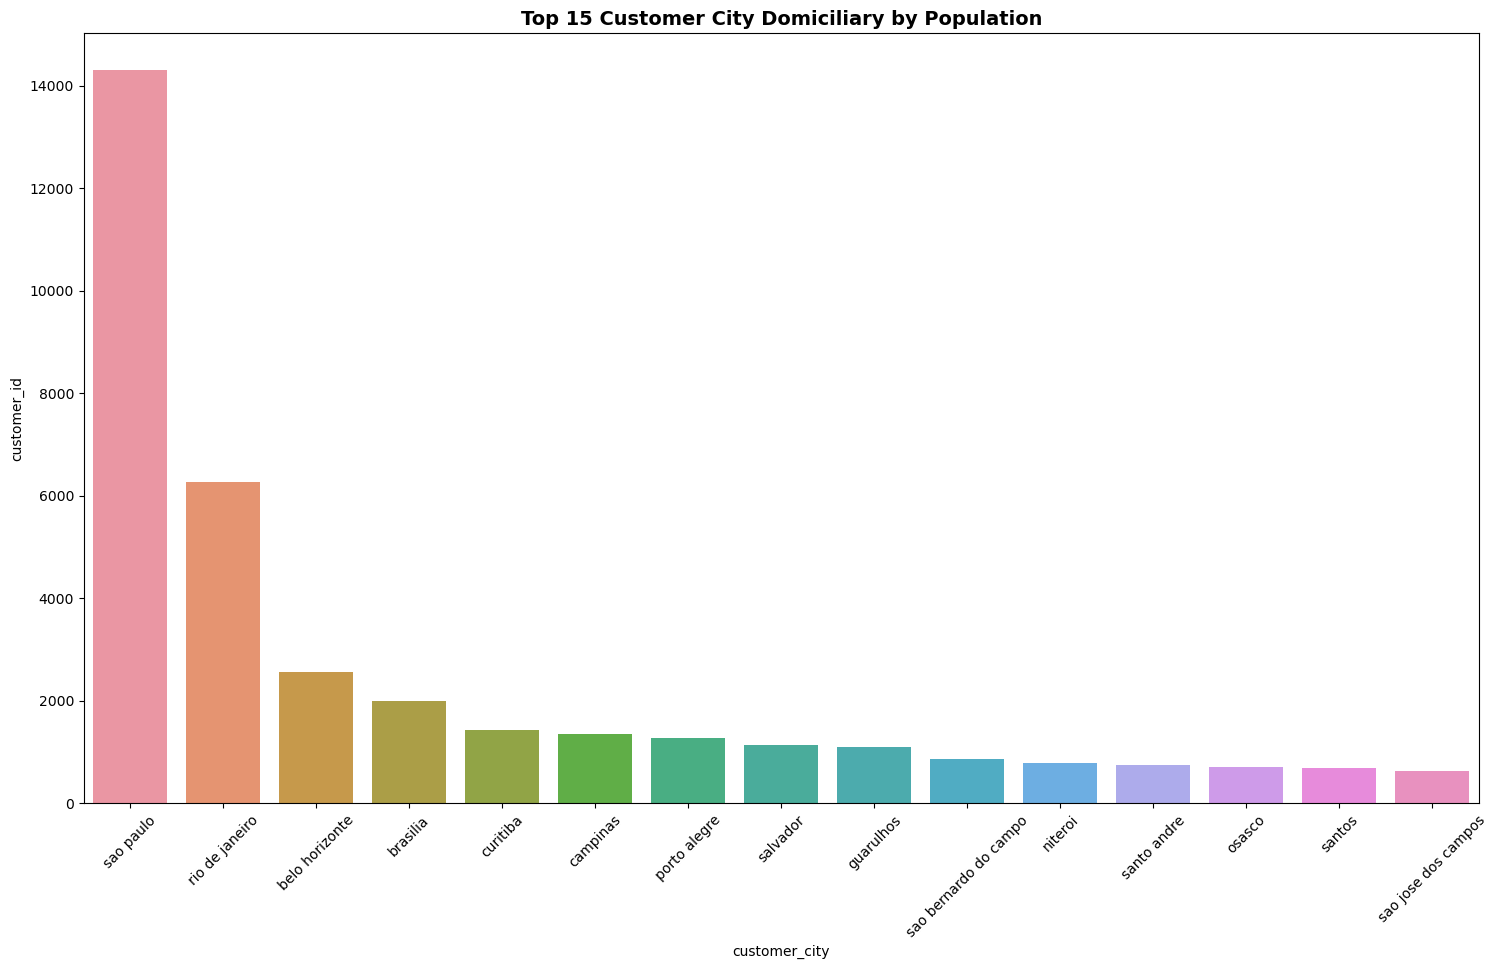

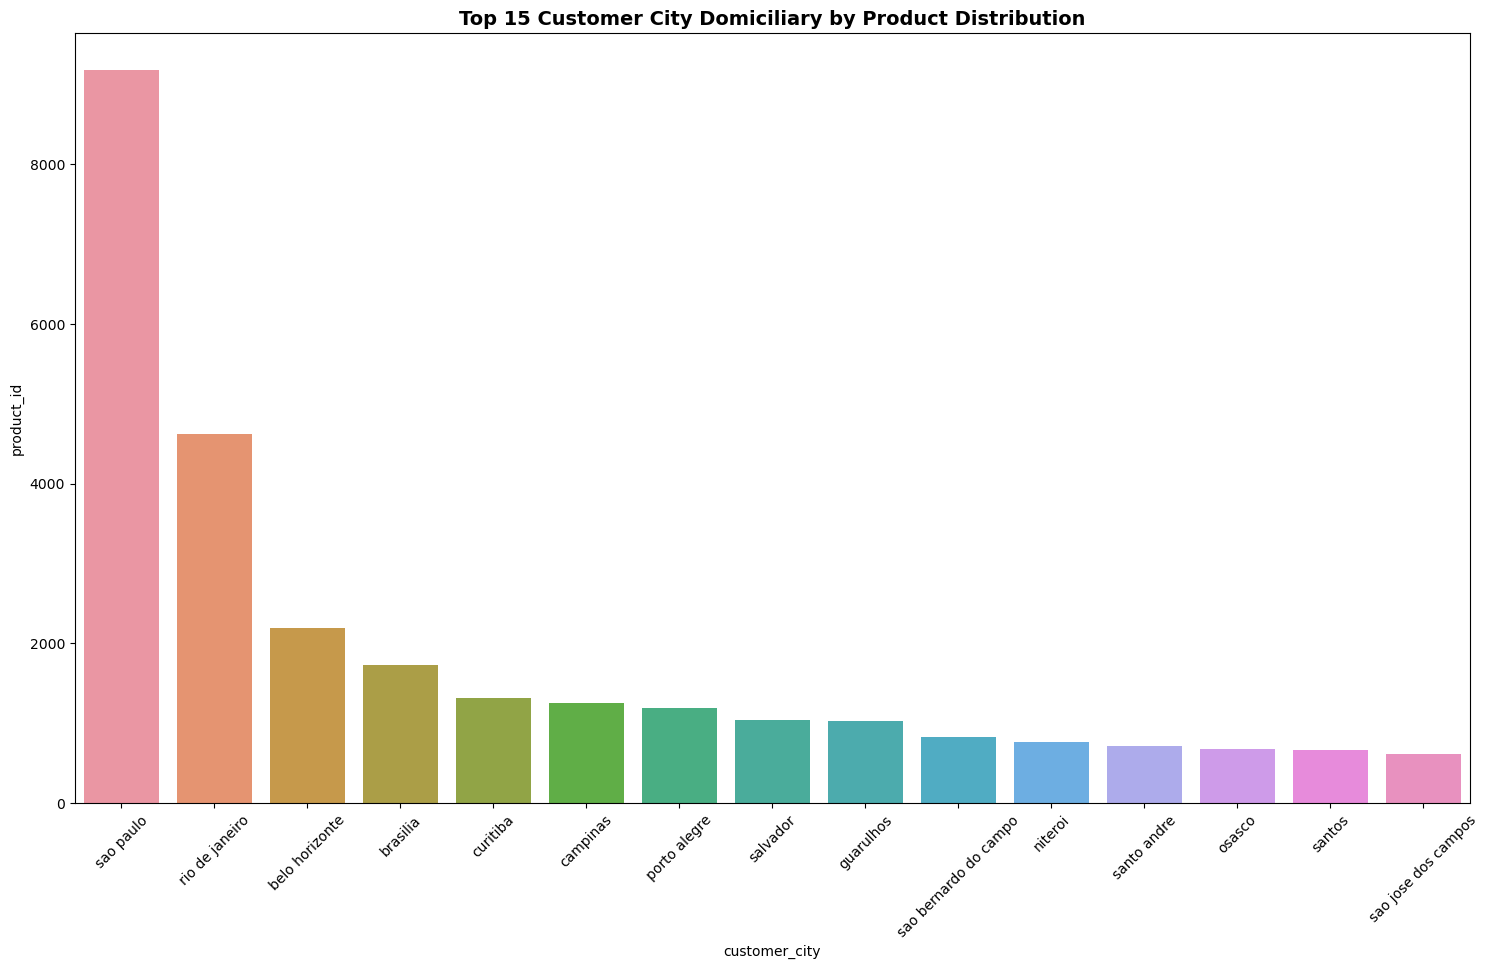

In [47]:
# urutkan df group by baru berdasarkan kolom jumlah order, customer, dan produk yang dipesan
for col in ['order_id','customer_id','product_id']:
    if col == 'order_id':
        plt.figure(figsize=(18,10))
        # dan tampilkan 15 baris teratas
        sns.barplot(data=citycust_grp.sort_values(col, ascending=False).head(15), x='customer_city', y=col)
        plt.title('Top 15 Customer City Domiciliary by Order Distribution', fontsize=14, fontweight='bold')
        plt.xticks(rotation=45)
        plt.show()       
    elif col == 'customer_id':
        plt.figure(figsize=(18,10))
        # dan tampilkan 15 baris teratas
        sns.barplot(data=citycust_grp.sort_values(col, ascending=False).head(15), x='customer_city', y=col)
        plt.title('Top 15 Customer City Domiciliary by Population', fontsize=14, fontweight='bold')
        plt.xticks(rotation=45)
        plt.show()
    else:
        plt.figure(figsize=(18,10))
        # dan tampilkan 15 baris teratas
        sns.barplot(data=citycust_grp.sort_values(col, ascending=False).head(15), x='customer_city', y=col)
        plt.title('Top 15 Customer City Domiciliary by Product Distribution', fontsize=14, fontweight='bold')
        plt.xticks(rotation=45)
        plt.show()

Category of Product by each of Customer and its product Ordered

In [49]:
# group product category by count unique order id, customer id, product id 
catcust_grp = custrans_df.groupby('product_category')[['order_id','product_id','customer_id']].nunique().reset_index()
catcust_grp

product_category  order_id  product_id  customer_id
0   agro_industry_and_commerce       177          71          176
1             air_conditioning       246         121          244
2                          art       195          52          195
3        arts_and_craftmanship        23          19           21
4                        audio       348          58          347
..                         ...       ...         ...          ...
66                  stationery      2264         831         2250
67      tablets_printing_image        79           9           79
68                   telephony      4092        1112         4046
69                        toys      3804        1373         3763
70               watches_gifts      5493        1300         5419

[71 rows x 4 columns]

- Bed & bath Table is the product category which the biggest product numbers in purchase distribution
    - followed by Health & Beauty, Sports & Leisure, and Computer Accesories Equipment product category
- Bed & bath Table is the product category with the most sales products
    - followed by Furniture Decoration and Health & Beauty product category

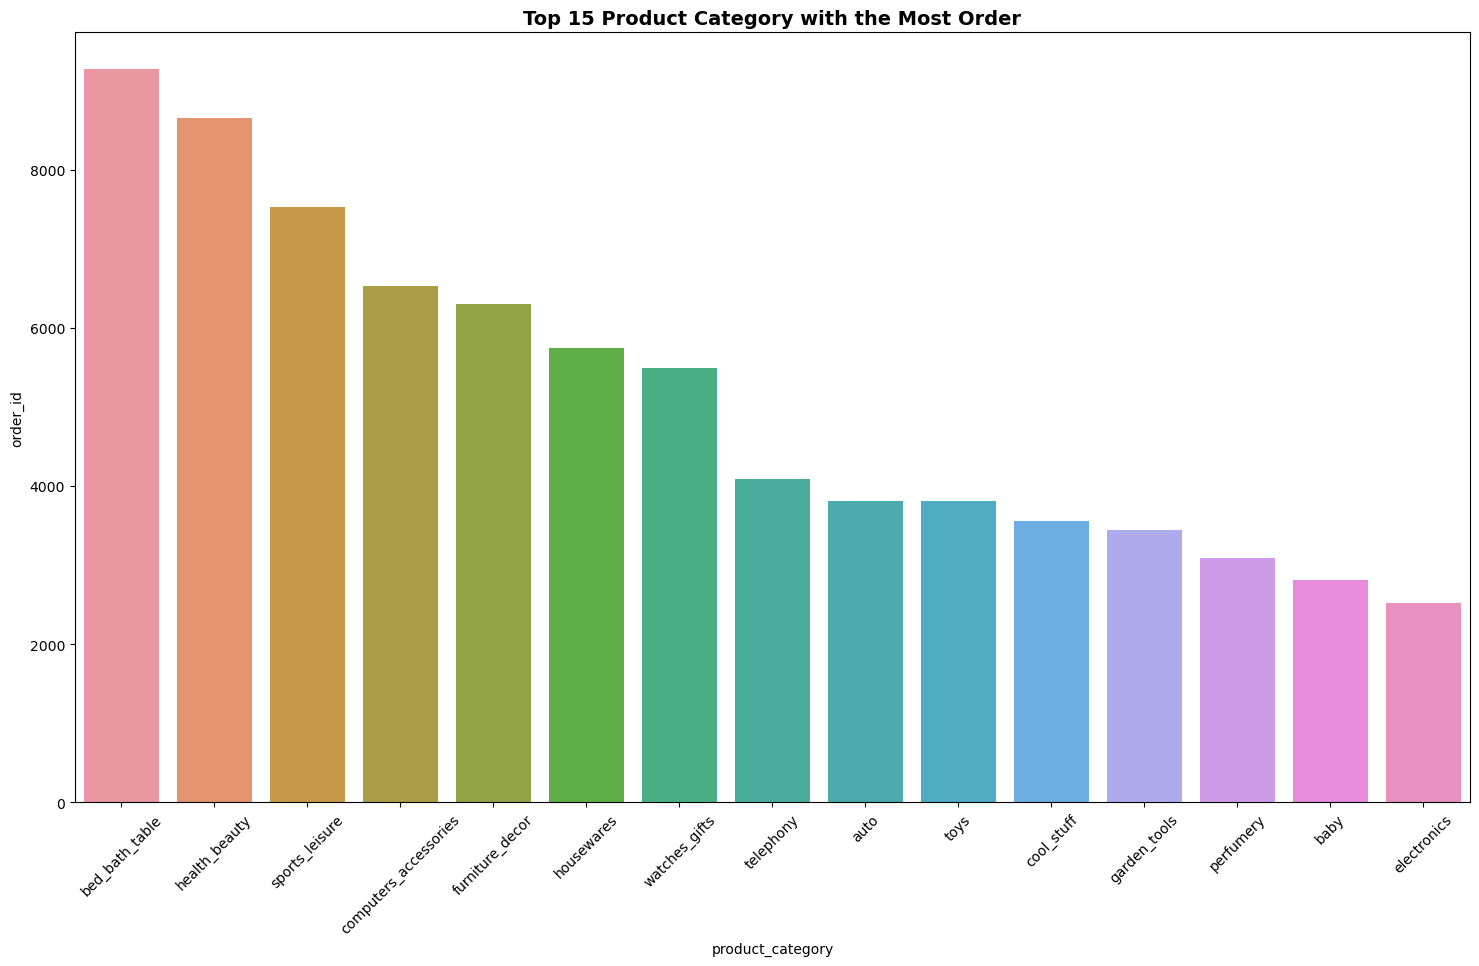

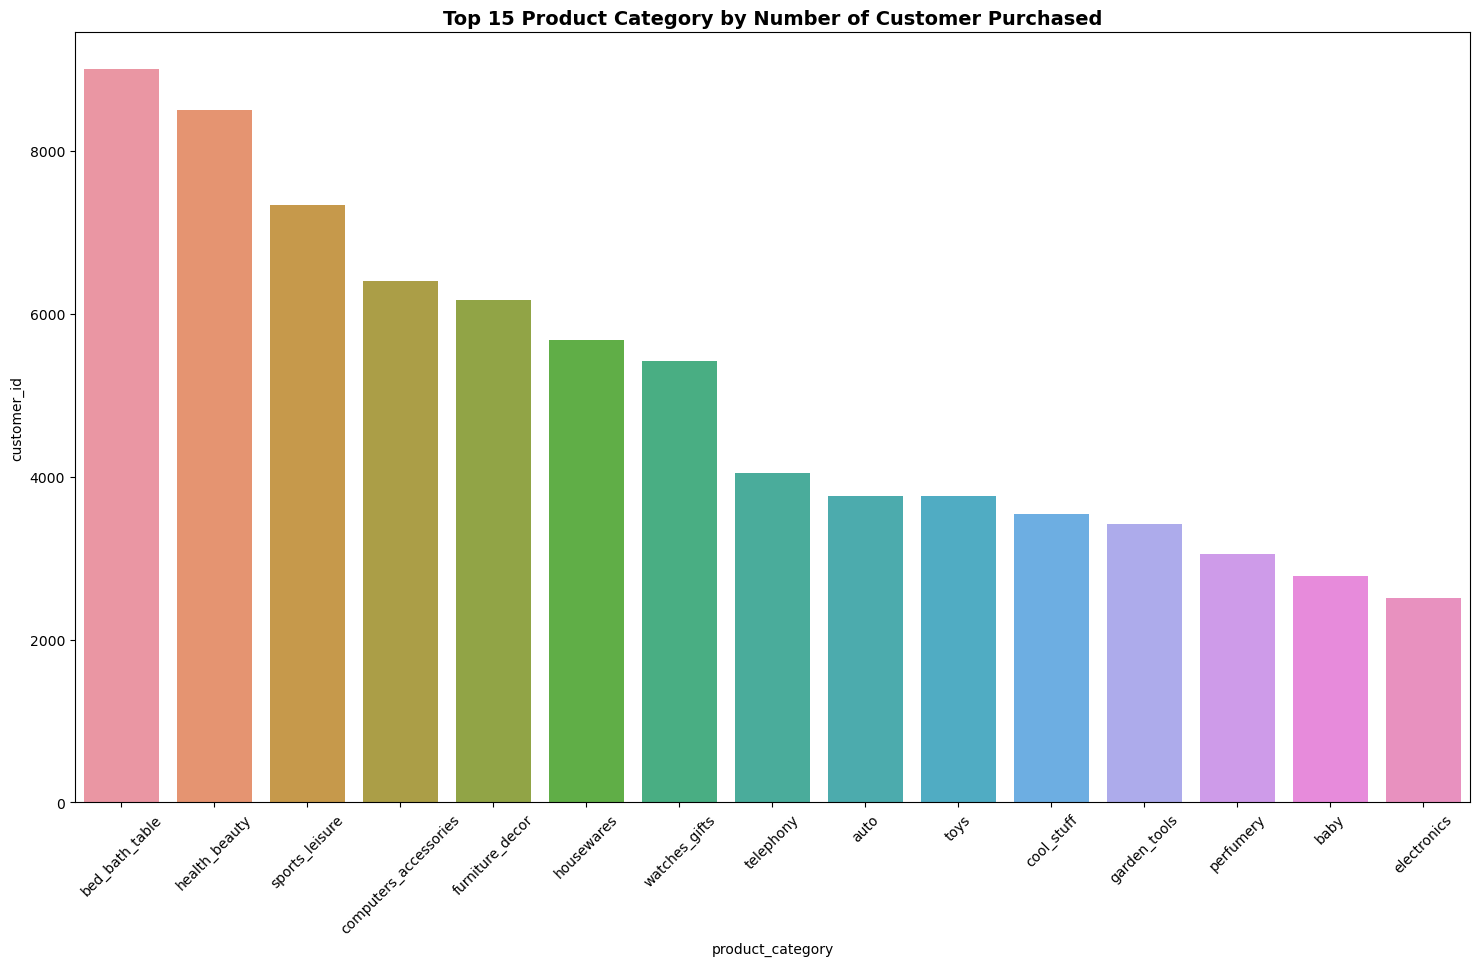

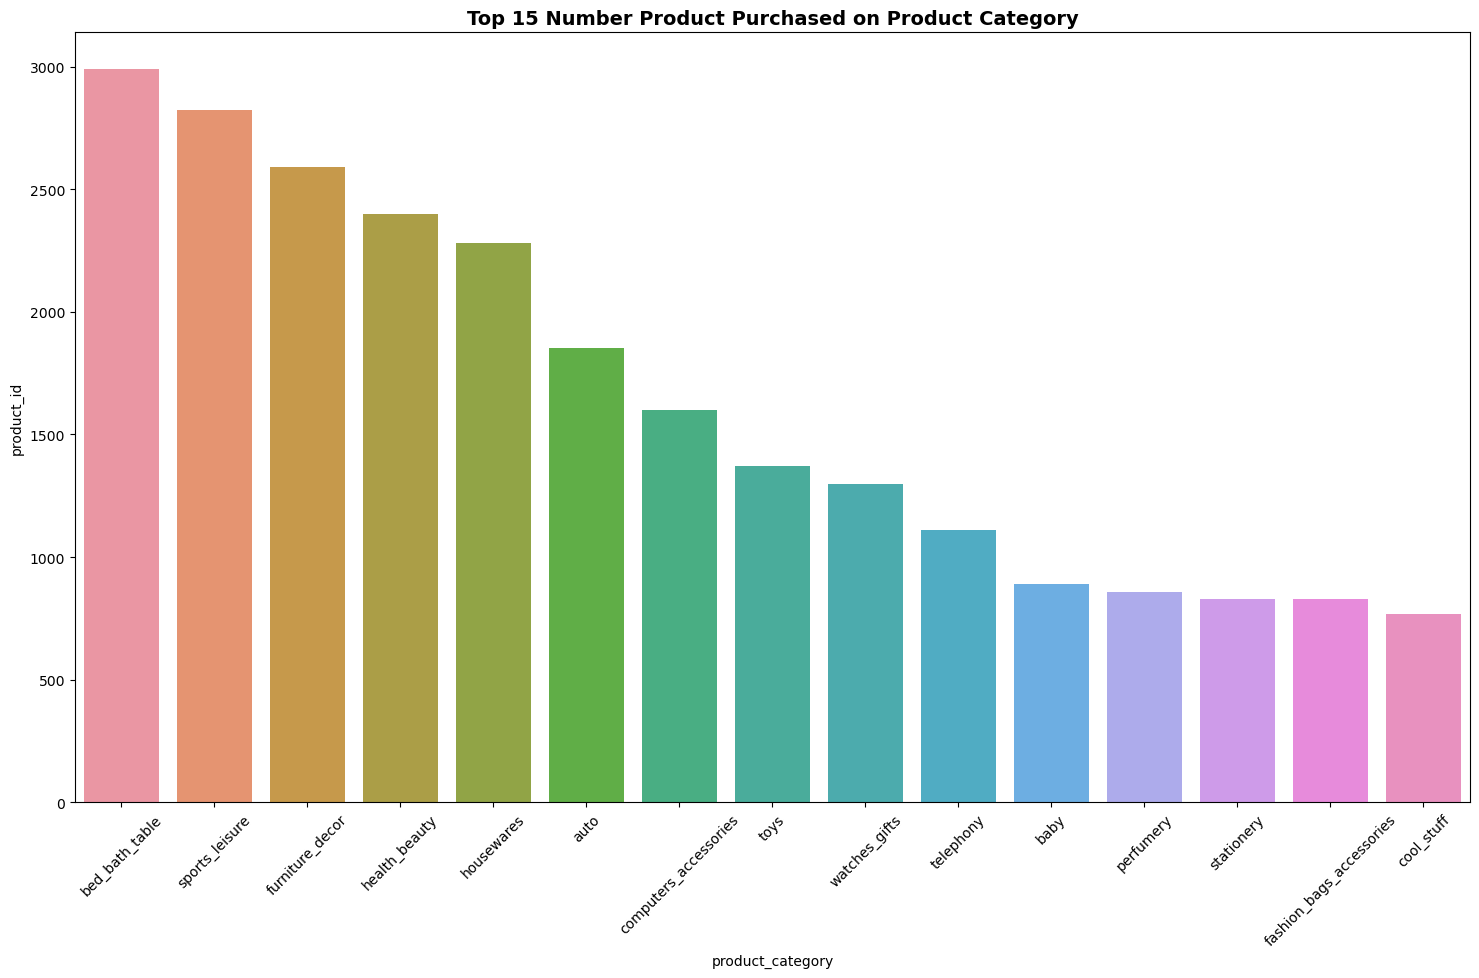

In [54]:
# urutkan df group by baru berdasarkan kolom jumlah order, customer, dan produk yang dipesan
for col in ['order_id','customer_id','product_id']:
    if col == 'order_id':
        plt.figure(figsize=(18,10))
        # dan tampilkan 15 baris teratas
        sns.barplot(data=catcust_grp.sort_values(col, ascending=False).head(15), x='product_category', y=col)
        plt.xticks(rotation=45)
        plt.title('Top 15 Product Category with the Most Order', fontsize=14, fontweight='bold')
        plt.show()
    elif col == 'customer_id':
        plt.figure(figsize=(18,10))
        # dan tampilkan 15 baris teratas
        sns.barplot(data=catcust_grp.sort_values(col, ascending=False).head(15), x='product_category', y=col)
        plt.xticks(rotation=45)
        plt.title('Top 15 Product Category by Number of Customer Purchased', fontsize=14, fontweight='bold')
        plt.show()
    else:
        plt.figure(figsize=(18,10))
        # dan tampilkan 15 baris teratas
        sns.barplot(data=catcust_grp.sort_values(col, ascending=False).head(15), x='product_category', y=col)
        plt.xticks(rotation=45)
        plt.title('Top 15 Number Product Purchased on Product Category', fontsize=14, fontweight='bold')
        plt.show()

Order Status case byNumber of Customer and its product Ordered

Case of order cancelation is very scrimpt, it rarely happen in other word

In [15]:
# group customer order status by count unique order id, customer id, product id 
ordcust_grp = custrans_df.groupby('order_status')[['order_id','product_id','customer_id']].nunique().reset_index()
ordcust_grp.style.background_gradient(cmap='BuPu_r', axis=0)

Payment Method Preferences by Number of Customer and its product Ordered

In [77]:
# group customer's payment method preference by count unique order id, customer id, product id 
paycust_grp = custrans_df.groupby('payment_type')[['order_id','product_id','customer_id']].nunique().reset_index()
paycust_grp

payment_type  order_id  product_id  customer_id
0       boleto     18920       10134        18454
1  credit_card     73257       27313        71037
2   debit_card      1455        1308         1440
3      voucher      3624        3015         3537

- Most of Customer made payment with Credit Card and boleto when purchase the product 
- Few of customers using voucher and debit card

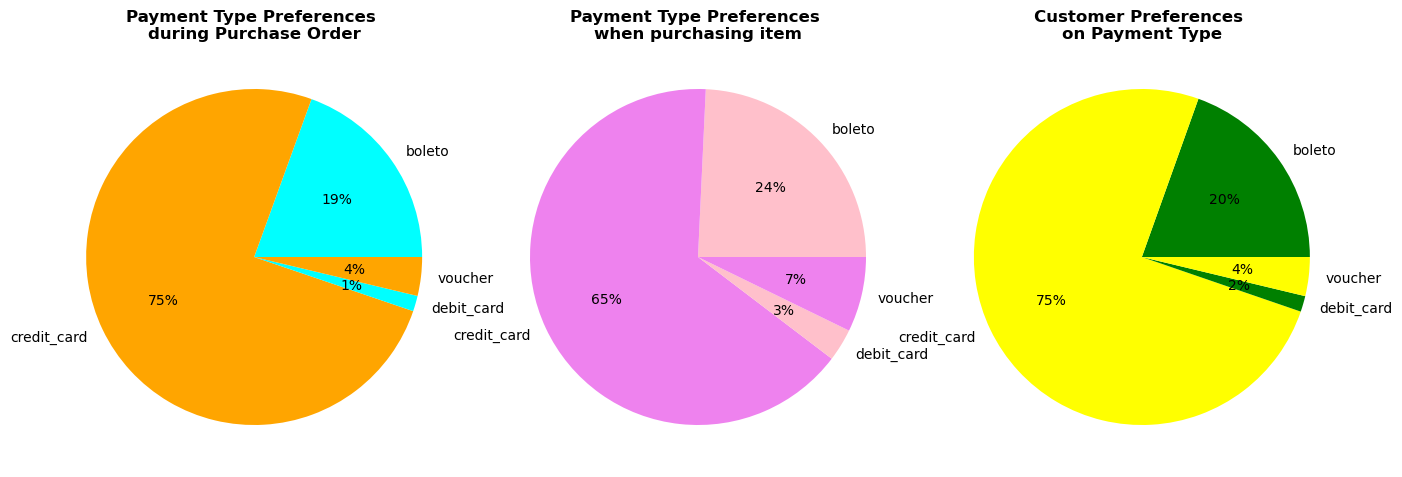

In [389]:
fig = plt.figure(figsize=(21,12))

# left pie chart, put on the left of 1 row x 3 columns
pie1 = fig.add_subplot(221) 
pie1.pie(paycust_grp['order_id'], labels=paycust_grp['payment_type'], 
        autopct='%.0f%%', colors=('cyan','orange'))
plt.title('Payment Type Preferences \nduring Purchase Order', fontweight='bold')

# middle piechart, put in the middle of 1 row x 3 columns
pie2 = fig.add_subplot(211) 
pie2.pie(paycust_grp['product_id'], labels=paycust_grp['payment_type'], 
        autopct='%.0f%%', colors=('pink','violet'))
plt.title('Payment Type Preferences \nwhen purchasing item', fontweight='bold')

# right piechart, put on the right of 1 row x 3 columns 
pie3 = fig.add_subplot(222)
pie3.pie(paycust_grp['customer_id'], labels=paycust_grp['payment_type'], 
        autopct='%.0f%%', colors=('green','yellow'))
plt.title('Customer Preferences \non Payment Type', fontweight='bold')

plt.show()

Correlation of Freight Value to time consumed of Order Packaging and Delivered

- Distribution about Correlation of Freight Value to Time consumed from Order Approved, Packaged in Hourly till the Product Delivered 
- Doesn't show any interesting pattern

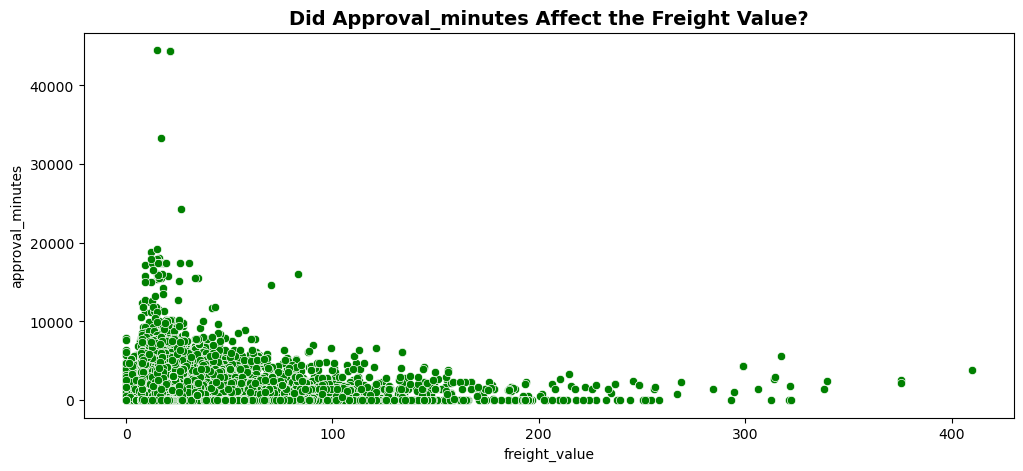

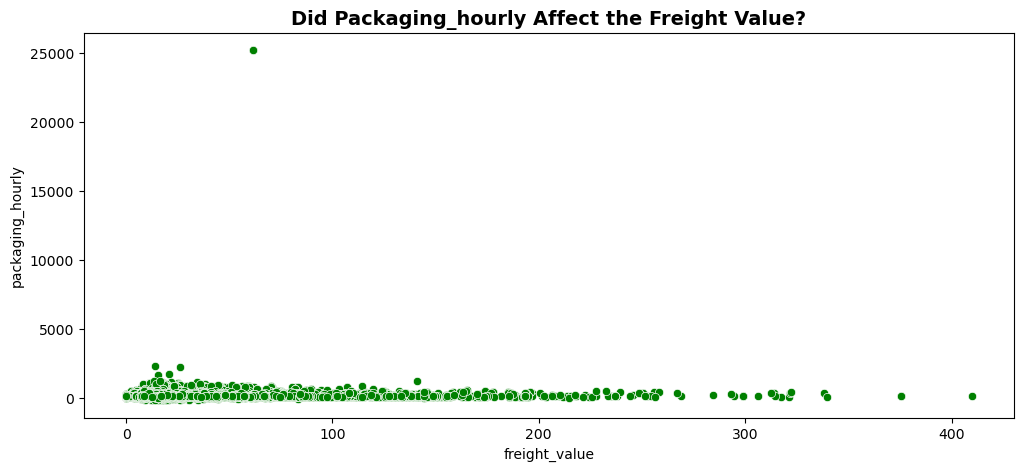

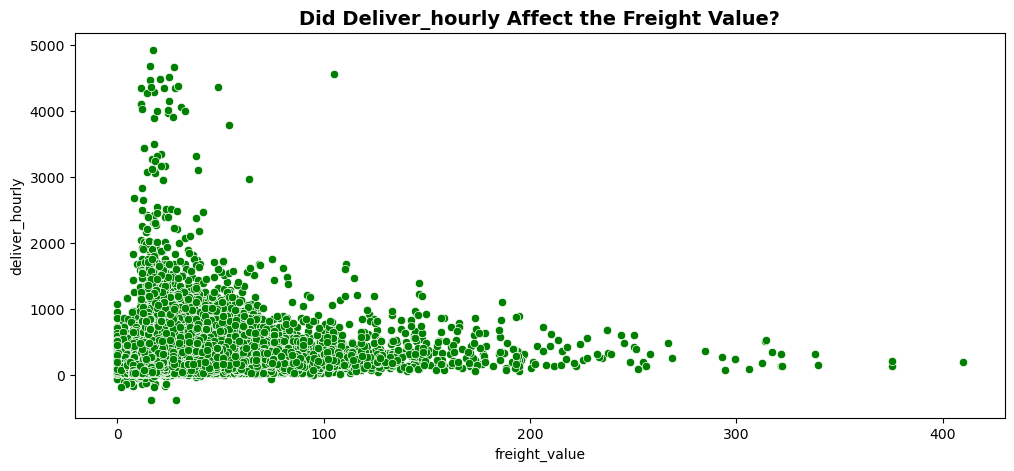

In [16]:
# correlation freight value to approval minutes, packaging_hourly, deliver_hourly
for col in ['approval_minutes', 'packaging_hourly', 'deliver_hourly']:
    plt.figure(figsize=(12,5))
    sns.scatterplot(x='freight_value',y=col, data=custrans_df, color='green')
    plt.title('Did ' + str(col).capitalize() + ' Affect the Freight Value?', fontsize=14, fontweight='bold')
    plt.show()

Correlation of Total Amount to time consumed of Order Packaging and Delivered
- Distribution about Correlation of Total Amount to Time consumed from Order Approved, Packaged in Hourly till the Product Delivered 
- Doesn't show any interesting pattern

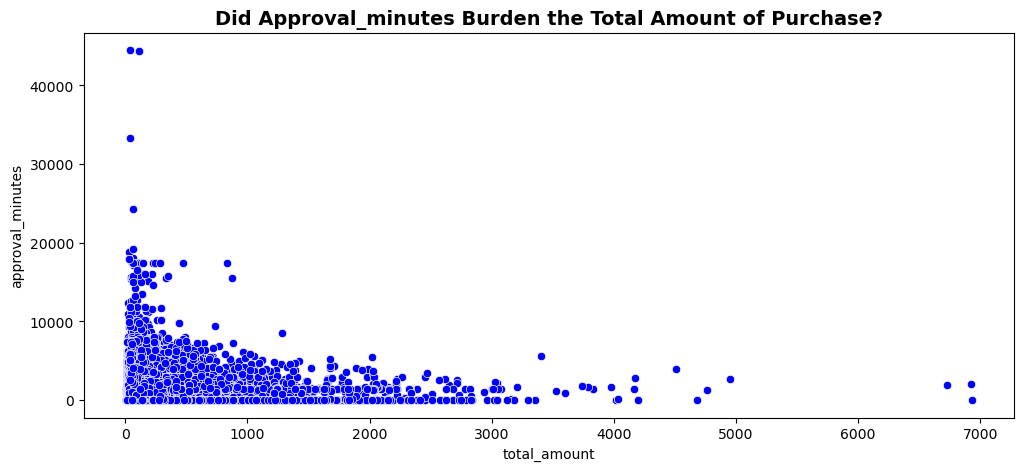

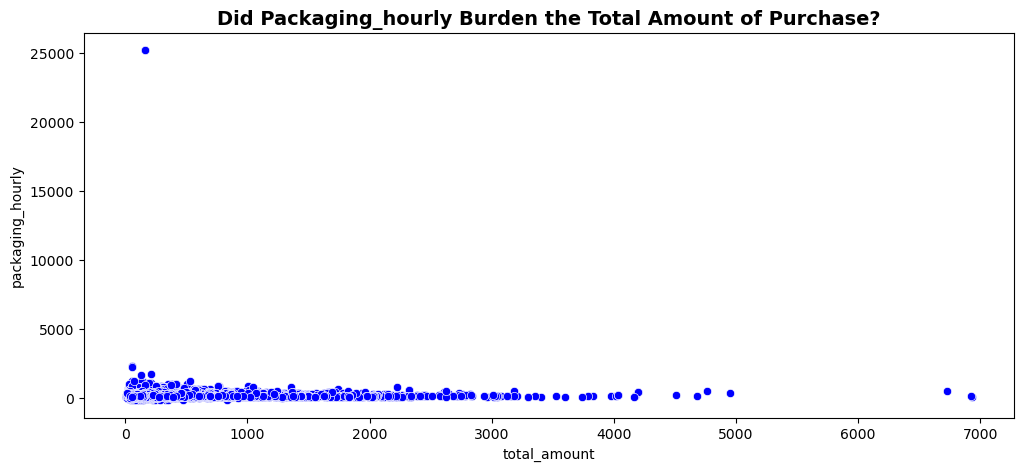

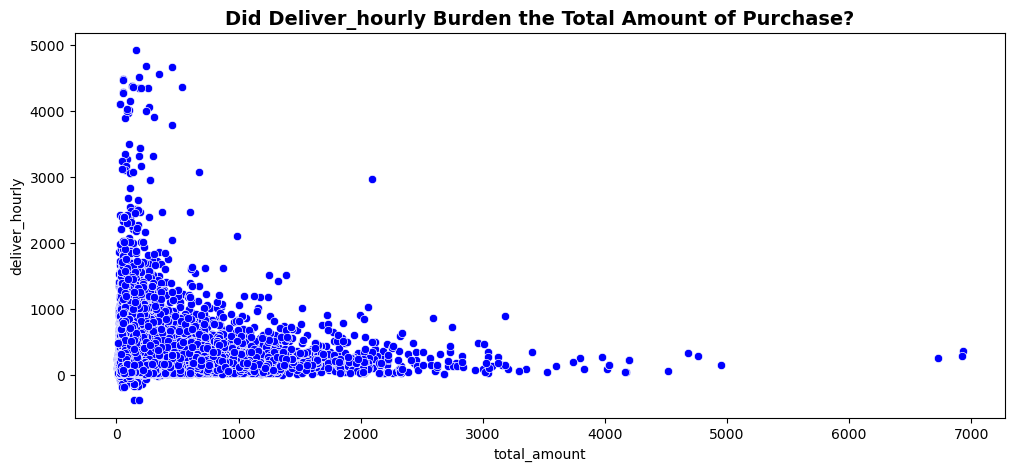

In [17]:
# correlation total amount to approval minutes, packaging_hourly, deliver_hourly
for col in ['approval_minutes', 'packaging_hourly', 'deliver_hourly']:
    plt.figure(figsize=(12,5))
    sns.scatterplot(x='total_amount',y=col, data=custrans_df, color='blue')
    plt.title('Did ' + str(col).capitalize() + ' Burden the Total Amount of Purchase?', fontsize=14, fontweight='bold')
    plt.show()

## Data Preparation
convert all categorical columns into numerics

In [9]:
# convert semua kolom categorical menjadi numerik dengan cat.codes
for col in custrans_df.select_dtypes('object').columns:
    # jika kolom merupakan order_status mulai dari 0
    if col == 'order_status':
        custrans_df[col] = custrans_df[col].astype('category').cat.codes
    # semua kolom kategorikal dimulai dari 1
    else:
        custrans_df[col] = custrans_df[col].astype('category').cat.codes + 1

Multivariate Correlation of Entire Variable Column in dataset with Heatmap
- correlation only around of transactional of payment and change data column
  - `price`, `freight_value`, `total_amount` and `payment_value` column related each other
  - `freight_value` fare affected by the time of order delivery in `deliver_hourly`, so it affects the `total_amount`
  - `freight_value` fare column also affect the product's price
- there is no interesting pattern in the rest of observation

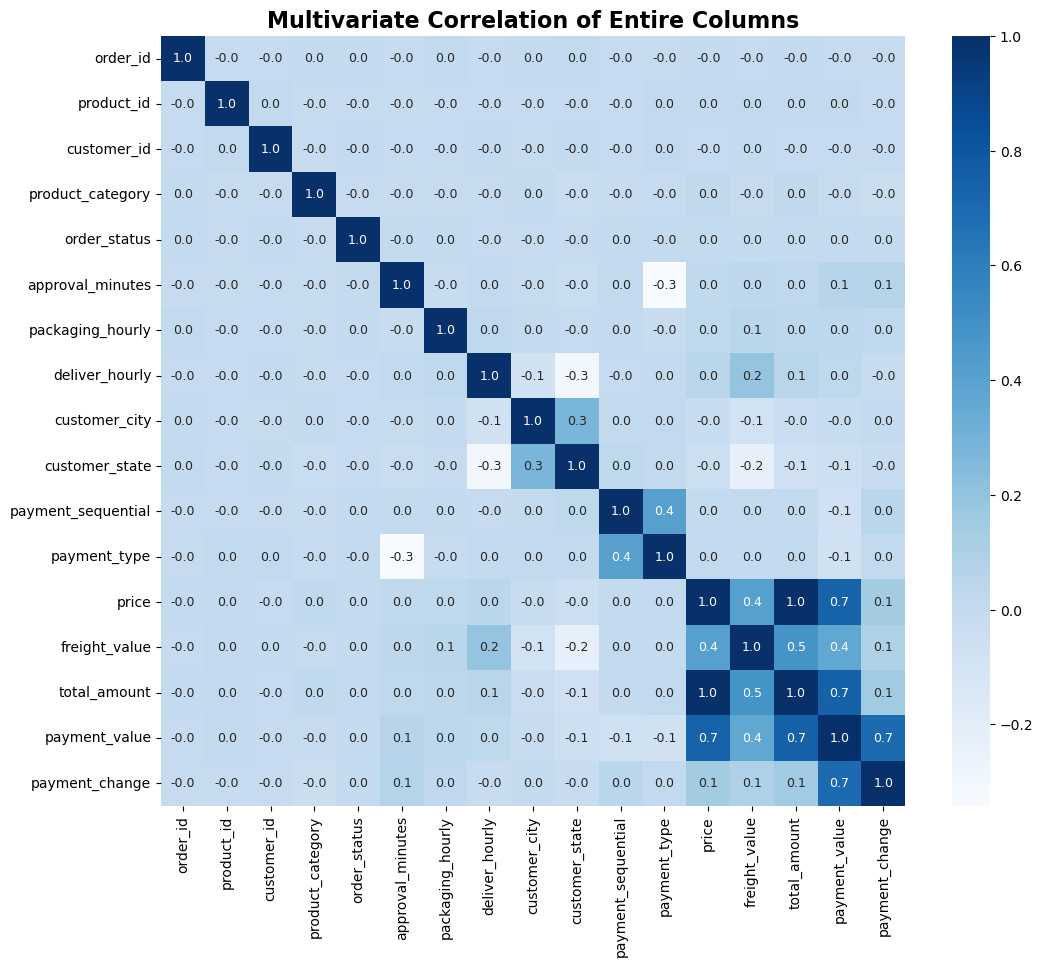

In [348]:
plt.figure(figsize=(12,10))
# plot heatmap for correlate all variable in database with blue color map, annotation
sns.heatmap(custrans_df.corr(), annot=True, cmap='Blues', fmt='.1f', annot_kws={'fontsize':9})
plt.title('Multivariate Correlation of Entire Columns', fontsize=16, fontweight='bold')
plt.show()

### Data Scaling
- Standarization Scaling column with MinMax
- to equalize all value scale so all variable are readable and understandable by cluster model

In [10]:
# minmax scaler for data scaling
minmax = MinMaxScaler()

# data scaling with minmax scaler transformation 
X = custrans_df.drop(columns=['order_id',	'customer_id'])
X_scaled = minmax.fit_transform(X)
# create new dataframe for scaled value
X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)

# tampilkan 10 baris kolom pertama secara array dan di tranpose
X_scaled[:14].T

0         1         2         3         4   \
product_id          0.262171  0.898238  0.779047  0.465315  0.670579   
product_category    0.285714  0.857143  0.557143  0.842857  0.600000   
order_status        1.000000  1.000000  1.000000  1.000000  1.000000   
approval_minutes    0.001046  0.000272  0.000337  0.000218  0.000278   
packaging_hourly    0.011727  0.012673  0.009836  0.012673  0.014556   
deliver_hourly      0.078230  0.109172  0.099987  0.090830  0.132793   
customer_city       0.179519  0.798379  0.647102  0.080305  0.977652   
customer_state      0.769231  0.961538  0.461538  0.961538  0.961538   
payment_sequential  0.000000  0.000000  0.000000  0.000000  0.000000   
payment_type        0.333333  0.333333  0.333333  0.333333  0.333333   
price               0.008620  0.035498  0.029425  0.001803  0.029558   
freight_value       0.032440  0.048648  0.043619  0.031219  0.044278   
total_amount        0.009549  0.036652  0.030447  0.002845  0.030616   
payment_value       0.005283  0.019016  0.015872  0.001887  0.015957   
payment_change      0.000000  0.000000  0.000000  0.000000  0.000000   

                          5         6         7         8         9   \
product_id          0.936134  0.552051  0.337203  0.193813  0.273717   
product_category    0.700000  0.971429  0.600000  0.614286  0.142857   
order_status        1.000000  1.000000  1.000000  1.000000  1.000000   
approval_minutes    0.040751  0.000376  0.038379  0.032252  0.000254   
packaging_hourly    0.011727  0.009836  0.010621  0.011725  0.009836   
deliver_hourly      0.095831  0.103794  0.091158  0.080583  0.077834   
customer_city       0.958988  0.369352  0.728389  0.829322  0.467338   
customer_state      0.461538  0.961538  0.961538  0.961538  0.961538   
payment_sequential  0.000000  0.000000  0.000000  0.000000  0.000000   
payment_type        0.000000  0.333333  0.333333  0.333333  0.333333   
price               0.003126  0.002829  0.120156  0.021547  0.007891   
freight_value       0.030975  0.028925  0.172696  0.028437  0.027827   
total_amount        0.004118  0.003708  0.126338  0.021886  0.008567   
payment_value       0.002531  0.002324  0.064457  0.011534  0.004786   
payment_change      0.000000  0.000000  0.000000  0.000000  0.000000   

                          10        11        12        13  
product_id          0.838832  0.943947  0.599216  0.215006  
product_category    0.614286  0.400000  0.100000  0.600000  
order_status        1.000000  1.000000  1.000000  1.000000  
approval_minutes    0.000269  0.000869  0.000451  0.040136  
packaging_hourly    0.010782  0.009817  0.007944  0.011688  
deliver_hourly      0.080764  0.108718  0.097978  0.099012  
customer_city       0.695481  0.574902  0.765717  0.467338  
customer_state      0.961538  0.961538  0.769231  0.961538  
payment_sequential  0.000000  0.000000  0.000000  0.000000  
payment_type        0.333333  0.333333  0.333333  0.000000  
price               0.008782  0.006556  0.010863  0.007284  
freight_value       0.021675  0.031683  0.056922  0.032635  
total_amount        0.009069  0.007497  0.013179  0.008261  
payment_value       0.005040  0.004243  0.007122  0.009261  
payment_change      0.000000  0.000000  0.000000  0.005292

## Principle Components Analysis for Dimensional Reduction
reducing dimension of number of column to be clusterized, to increase the computation time from cluster model
- number of column determined based on calculation value of explained variance between 70-80% from entire column 
- explained variance ratio is variance ratio which explained column value entirely 

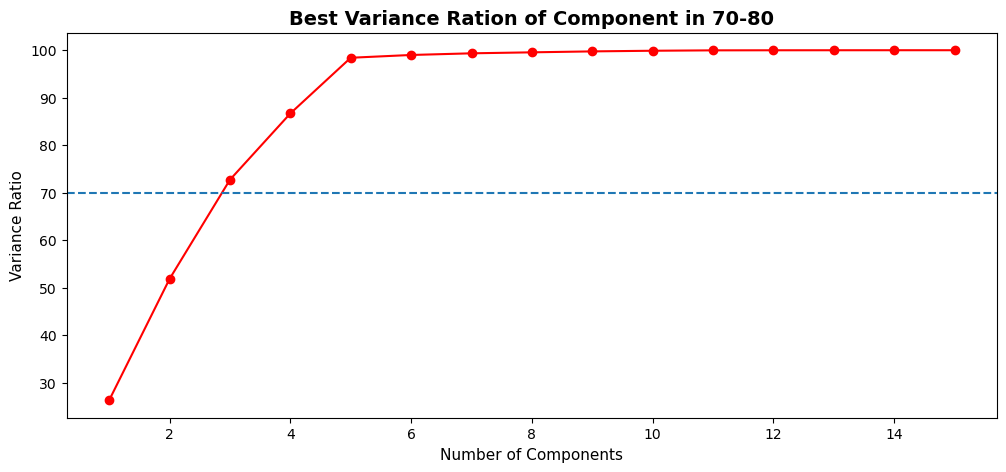

In [42]:
variance_ratio = []

# ulangi jumlah komponen berdasarkan jumlah kolom 
for com in range(1, len(X_scaled.columns)+1):
    # jalankan analisis komponen PCA sesuai jumlah iterasi
    pca = PCA(n_components=com)
    pca.fit(X_scaled)
    # hitung total masing-masing jumlah explained variance ratio dari iterasi
    variance_ratio.append(pca.explained_variance_ratio_.sum()*100)

# tampilkan hasil pencarian PCA secara iterasi, untuk memperoleh jumlah komponen terbaik 
plt.figure(figsize=(12,5))
plt.plot(range(1, len(X_scaled.columns)+1), variance_ratio, marker='o', color='red')
plt.title('Best Variance Ration of Component in 70-80', fontsize=14, fontweight='bold')
plt.axhline(y=70, linestyle='--')
plt.xlabel('Number of Components', fontsize=11)
plt.ylabel('Variance Ratio', fontsize=11)
plt.show()

The best PCA score acquired if only using 3 components, to be runs to find the most optimal cluster on the next step

In [11]:
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(data=X_pca, columns=['Component 1', 'Component 2', 'Component 3'])
# tampilkan jumlah data teratas
X_pca.head(10)

Component 1  Component 2  Component 3
0    -0.142566     0.370125     0.256648
1     0.150606    -0.386233    -0.421206
2     0.034498     0.094287    -0.277368
3     0.352643     0.152591     0.028865
4    -0.132251    -0.440080    -0.186936
5     0.078205    -0.186855    -0.445236
6     0.388022    -0.112913    -0.070190
7    -0.050804    -0.259958     0.151734
8    -0.063485    -0.352986     0.292063
9    -0.401994     0.100677     0.241304

## K-Means Clustering
- define the optimal cluster using elbow method by the calculation of Weighted Cluster Sum of Squares
- determine cluster point referred by a plot line which elbow-like shape 

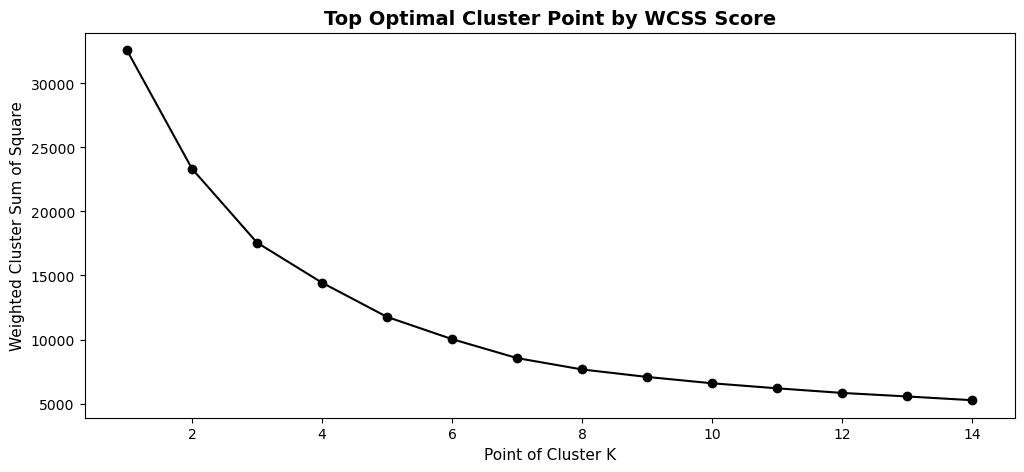

In [24]:
wcss_score = []

# iterasi antara cluster k 1 sampai k 14
for clust in range(1,15):
    # pencarian cluster menggunakan dataframe PCA sebelumnya
    kmeans = KMeans(n_clusters=clust, init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    wcss_score.append(kmeans.inertia_)

plt.figure(figsize=(12,5))
plt.plot(range(1, 15), wcss_score, marker='o', color='black')
plt.title('Top Optimal Cluster Point by WCSS Score', fontsize=14, fontweight='bold')
plt.xlabel('Point of Cluster K', fontsize=11)
plt.ylabel('Weighted Cluster Sum of Square', fontsize=11)
plt.show()

# wcss_score2 = []

# for clust in range(1,15):
#     kmeans = KMeans(n_clusters=clust, init='k-means++', random_state=42)
#     kmeans.fit(X_scaled)
#     wcss_score2.append(kmeans.inertia_)

# plt.figure(figsize=(12,5))
# plt.plot(range(1, 15), wcss_score2, marker='o', color='blue')
# plt.title('Top Optimal Cluster Point by WCSS Score', fontsize=14, fontweight='bold')
# plt.xlabel('Point of Cluster K', fontsize=11)
# plt.ylabel('Weighted Cluster Sum of Square', fontsize=11)
# plt.show()

Insert 3 as number of Cluster to KMeans model that the most optimal cluster point from finding cluster, then run the model

In [12]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
cluster = kmeans.predict(X_scaled)

Insert Cluster's label to dataset, then plus by 1 (`+ 1`) because the lowest value start from 0

In [13]:
# memasukan label cluster ke dataset yang digunakan untuk modelling
X['cluster'] = cluster + 1
# memasukan label cluster ke dataset aslinya
custrans_df['cluster'] = X['cluster'] 
# insert cluster column to original dataset customer_transaction, because value is not encoded
customer_transaction['cluster'] = custrans_df['cluster']

# tampilkan dataset baru dengan 20 teratas
X.head(20)

product_id  product_category  order_status  approval_minutes  \
0         8289                21             1             46.55   
1        28397                61             1             12.12   
2        24629                40             1             14.98   
3        14711                60             1              9.72   
4        21200                43             1             12.37   
5        29595                50             1           1812.88   
6        17453                69             1             16.72   
7        10661                43             1           1707.35   
8         6128                44             1           1434.80   
9         8654                11             1             11.28   
10       26519                44             1             11.98   
11       29842                29             1             38.65   
12       18944                 8             1             20.05   
13        6798                43             1           1785.52   
14        6798                43             1           1785.52   
15       17361                66             1            932.02   
16        7914                17             1             22.63   
17        9926                60             1             23.42   
18       22284                66             1           3926.58   
19       11790                21             1             13.92   

    packaging_hourly  deliver_hourly  customer_city  customer_state  \
0             144.00           29.16            732              21   
1             168.00          193.49           3252              26   
2              96.00          144.71           2636              13   
3             168.00           96.08            328              26   
4             215.79          318.94           3982              26   
5             144.00          122.64           3906              13   
6              96.00          164.93           1505              26   
7             115.92           97.82           2967              26   
8             143.94           41.66           3378              26   
9              96.00           27.06           1904              26   
10            120.00           42.62           2833              26   
11             95.51          191.08           2342              26   
12             48.00          134.04           3119              21   
13            143.00          139.53           1904              26   
14            143.00          139.53           1904              26   
15             48.00          164.57             84              13   
16            167.98           74.67            700              26   
17            120.00           50.34           3225              26   
18            143.96           95.82           1992              26   
19            144.00          340.47           1122              26   

    payment_sequential  payment_type   price  freight_value  total_amount  \
0                    1             2   58.90          13.29         72.19   
1                    1             2  239.90          19.93        259.83   
2                    1             2  199.00          17.87        216.87   
3                    1             2   12.99          12.79         25.78   
4                    1             2  199.90          18.14        218.04   
5                    1             1   21.90          12.69         34.59   
6                    1             2   19.90          11.85         31.75   
7                    1             2  810.00          70.75        880.75   
8                    1             2  145.95          11.65        157.60   
9                    1             2   53.99          11.40         65.39   
10                   1             2   59.99           8.88         68.87   
11                   1             2   45.00          12.98         57.98   
12                   1             2   74.00          23.32         97.32   
13   

## Cluster Analysis
Number of Customer from each cluster by unique value counts

In [14]:
# using value counts from X dataframe then sort by cluster index
X['cluster'].value_counts().sort_index()

1    33702
2    34483
3    45182
Name: cluster, dtype: int64

Display Number of Customer from Each Cluster using Bar Chart

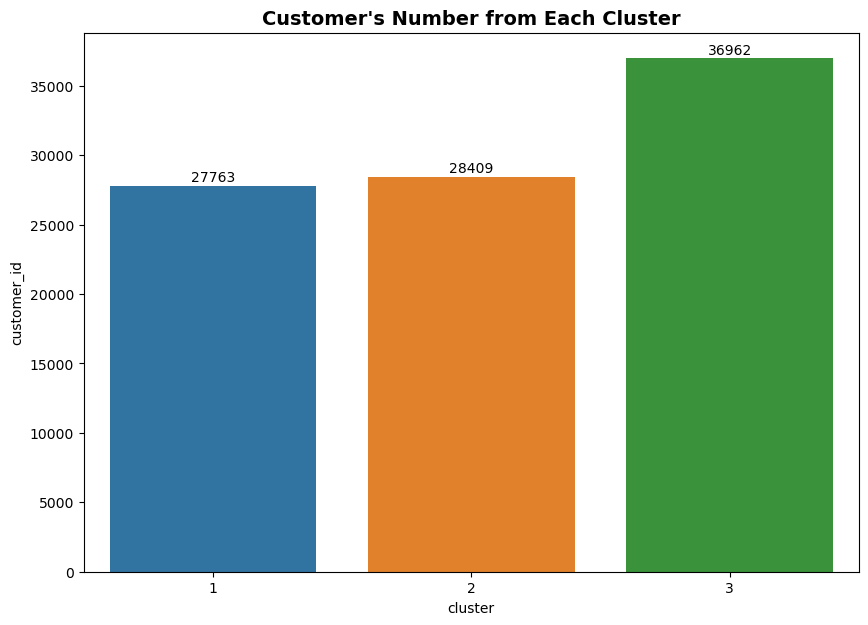

In [15]:
plt.figure(figsize=(10,7))
aux = custrans_df.groupby('cluster')['customer_id'].nunique().reset_index()
sbar = sns.barplot(data=aux, x='cluster', y='customer_id')

# bar plot annotation
for p in sbar.patches:
    sbar.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')

plt.title('Customer\'s Number from Each Cluster', fontsize=14, fontweight='bold')
plt.show()

Observation of Variable difference with Colored Tabular Visualization (Transposed)
- most of customers come from 3rd cluster, while number of customer from 1st and 2nd cluster are slightly different
- determinator of cluster based on purchase payment behaviour, that covers 
    - number of products (product_id) with its product category
    - total amount of transaction made from each customers with its change of payment
    - duration of product delivery also become customer consideration that how long the product deliveredm, customer will keep buying

In [16]:
# calculate mean of each feature with groupby cluster
tabular_cluster = X.groupby('cluster').mean().T
tabular_cluster['Feature Mean'] = X.mean().T
display(tabular_cluster)

# display column visualization with colored tabular chart
tabular_cluster.drop(columns='Feature Mean').style.background_gradient(cmap='PRGn', axis=1)

cluster                        1             2             3  Feature Mean
product_id          15861.393775  16020.065569  15520.600637  15773.835349
product_category       46.132425     13.144883     55.659887     39.895693
order_status            0.999970      0.999971      0.999889      0.999938
approval_minutes      649.008269    630.687803    605.367955    626.043021
packaging_hourly      148.173222    148.365165    147.692203    148.039897
deliver_hourly        255.242547    215.959371    199.005719    220.880747
customer_city         979.481663   2694.929385   3121.716303   2355.051532
customer_state         14.882470     21.471769     22.267584     19.830056
payment_sequential      1.062726      1.107908      1.096543      1.089947
payment_type            1.901994      1.930661      1.940175      1.925931
price                 126.232722    117.931695    117.333580    120.161067
freight_value          22.731376     18.888936     18.871386     20.024231
total_amount          148.964098    136.820632    136.204967    140.185298
payment_value         179.134690    172.018263    167.221235    172.222013
payment_change         40.908703     46.862666     42.309765     43.278116

Payment Method Preferennce by Customers from each cluster

Entire Customer from all Cluster prefered to pay using Credit Card and Boleto Payment

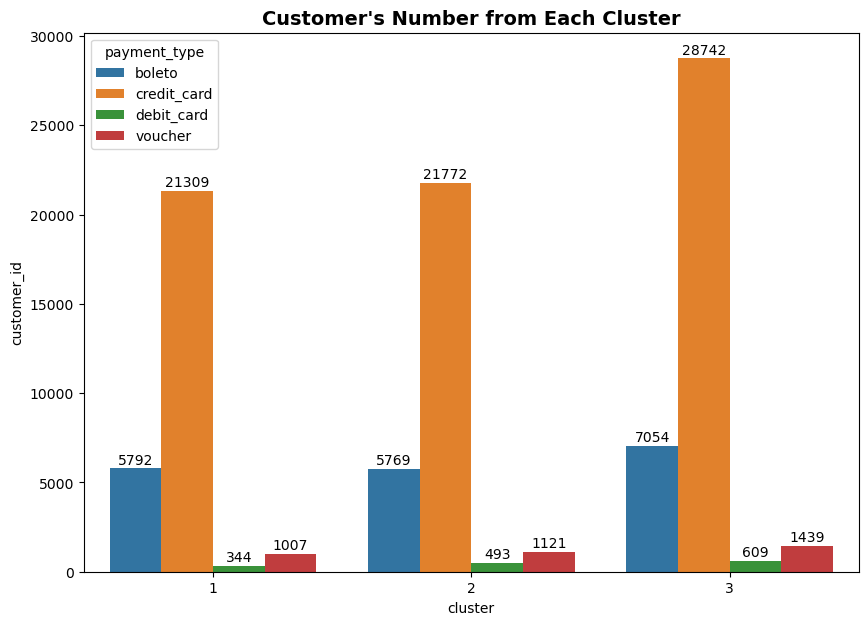

In [17]:
# display payment method preferred by customer and its cluster using grouped bar chart
plt.figure(figsize=(10,7))
aux = customer_transaction[['cluster','customer_id','payment_type']].groupby(['cluster','payment_type'])['customer_id'].nunique().reset_index()
sbar = sns.barplot(data=aux, x='cluster', y='customer_id', hue='payment_type')

# bar plot annotation with for loop
for p in sbar.patches:
    sbar.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')

plt.title('Customer\'s Number from Each Cluster', fontsize=14, fontweight='bold')
plt.show()

Number of Product purchased from each customer on each cluster

Customer from 3rd Cluster have the biggest number of product purchase, followed by 1st Cluster Customer

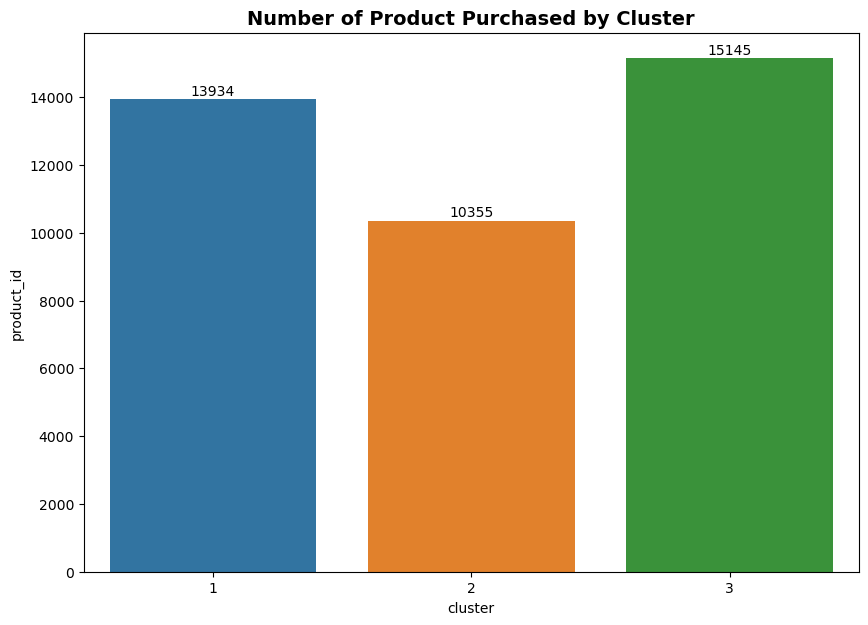

In [18]:
plt.figure(figsize=(10,7))
aux = X.groupby('cluster')['product_id'].nunique().reset_index()
sbar = sns.barplot(data=aux, x='cluster', y='product_id')

# bar plot annotation
for p in sbar.patches:
    sbar.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')

plt.title('Number of Product Purchased by Cluster', fontsize=14, fontweight='bold')
plt.show()

Customer by Favorite of product Category based on Number of Product Purchased from each Cluster
- Cluster 1 and 3 both prefer to product like Sports & Leisure, Furniture Decoration, Health & Beauty and Housewares
- While Cluster 2 prefer to product like bet & bath table, auto, computer accessories and baby equipment

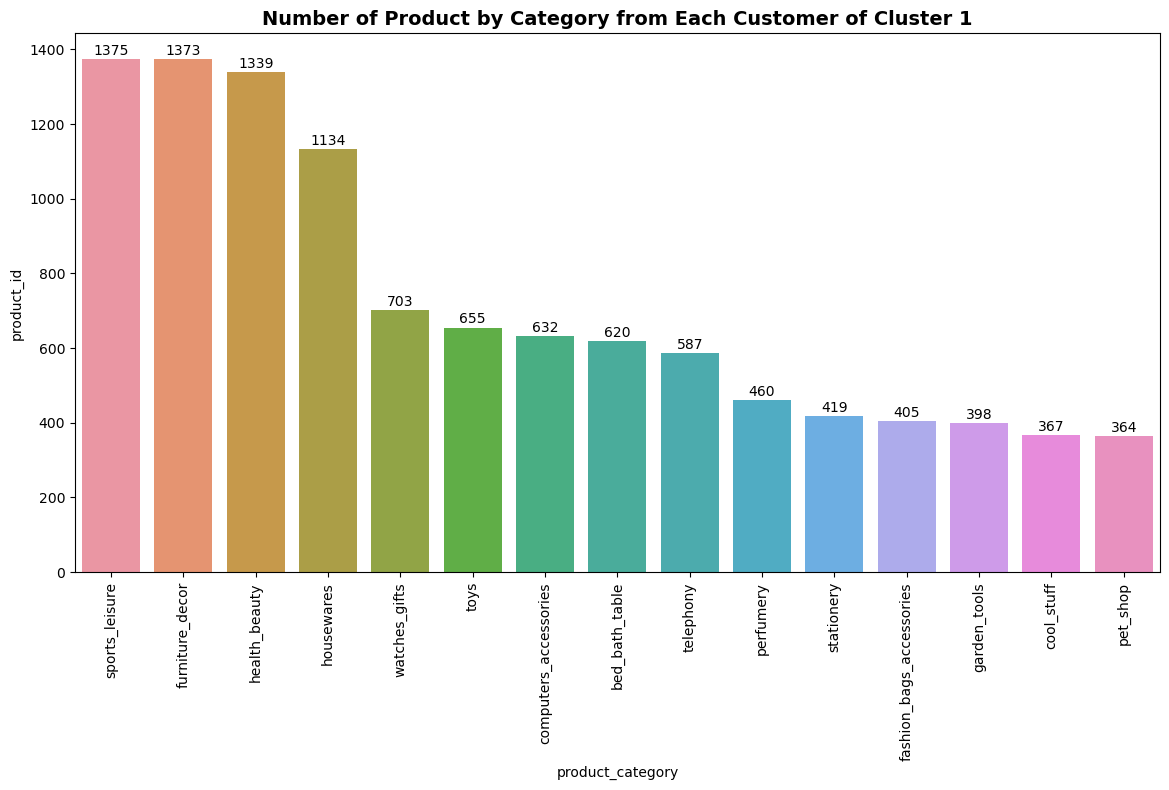

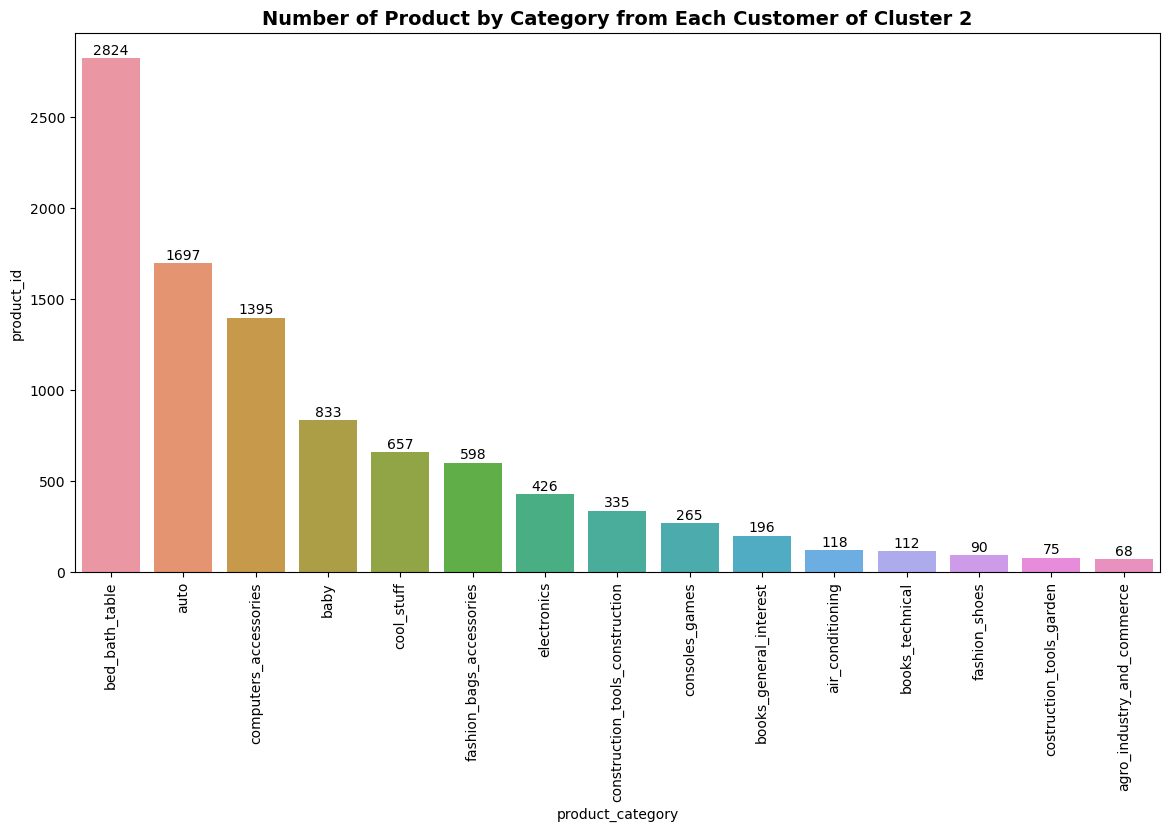

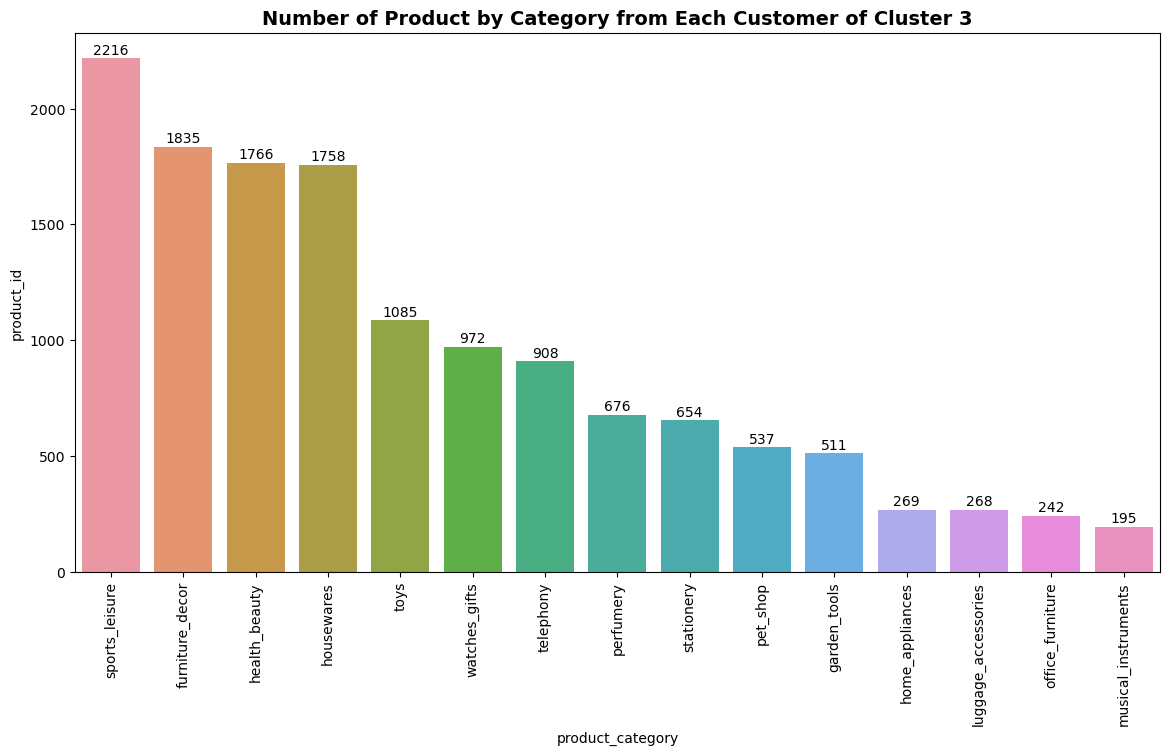

In [31]:
for cluster in range(1, len(customer_transaction['cluster'].unique())+1):
    aux = customer_transaction[customer_transaction['cluster']==cluster].groupby('product_category')['product_id'].nunique().reset_index()
    aux = aux.sort_values(by='product_id', ascending=False).head(15)

    plt.figure(figsize=(14,7))
    sbar2 = sns.barplot(data=aux, x='product_category', y='product_id')

    # bar plot annotation
    for p2 in sbar2.patches:
        sbar2.annotate(format(p2.get_height(), '.0f'), (p2.get_x() + p2.get_width() / 2., p2.get_height()), 
                    ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')

    plt.title('Number of Product by Category from Each Customer of Cluster ' + str(cluster), fontsize=14, fontweight='bold')
    plt.xticks(rotation=90)
    plt.show()

Boxplot visualization of Order and Payment Transactions, number of Product and Delivery Duration from each Cluster
- 3rd Cluster Customer made purchases on the lowest price product under average
- But 3rd Cluster Customer made payment with the highest transaction
- While 1st Cluster and 2nd Cluster Customers have high number of purchase above the average, but the lowest value of payment

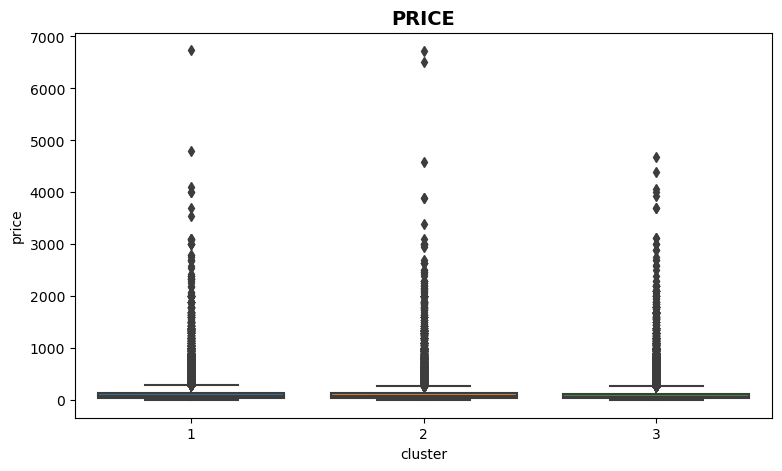

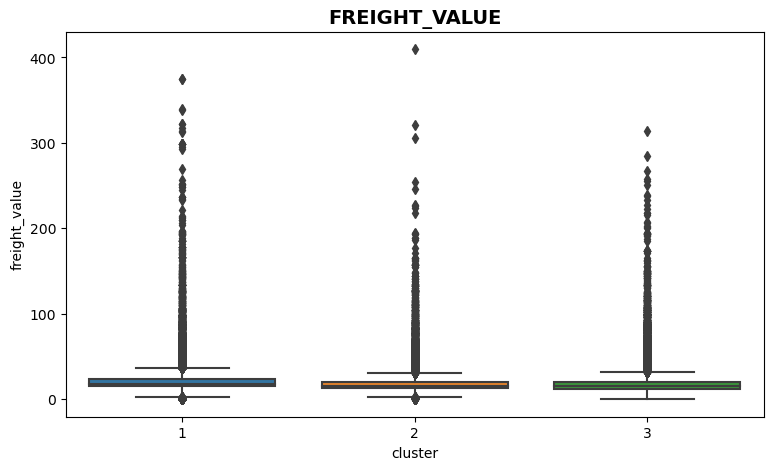

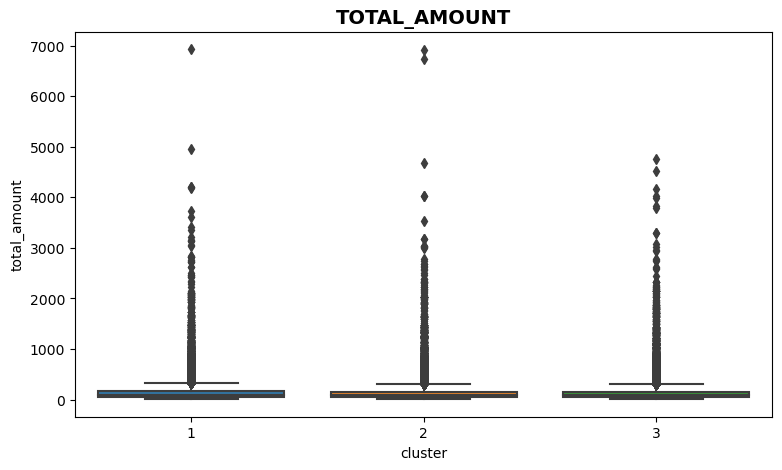

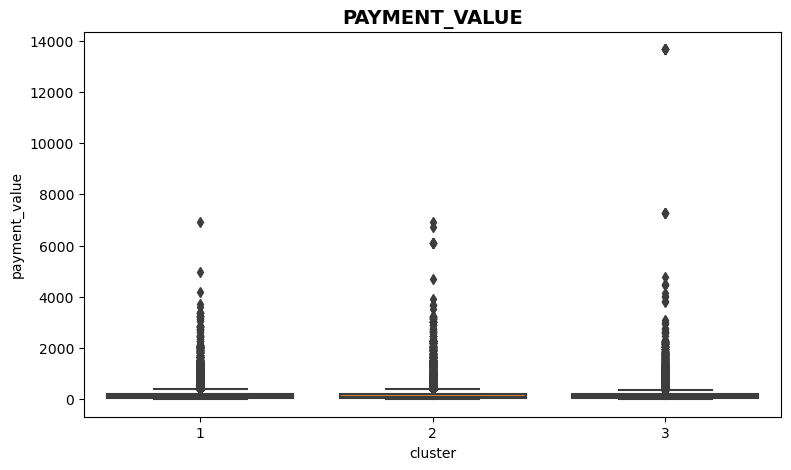

In [378]:
for col in ['price', 'freight_value', 'total_amount', 'payment_value']:    
    plt.figure(figsize=(9,5))
    plt.title(str(col).upper(), fontsize=14, fontweight='bold')
    sns.boxplot(x='cluster', y=col, data=X)
    plt.show()

Correlation of Freight Value and Total Amount to time consumed of Order Packaging and Delivered
- There is no interesting distribution of correlation between freight value to time about order confirmed, processed until delivered
- And there is no intersting also in total amount pay my customer
- becuase both distribution evenly distributed and don't display distinct patterns

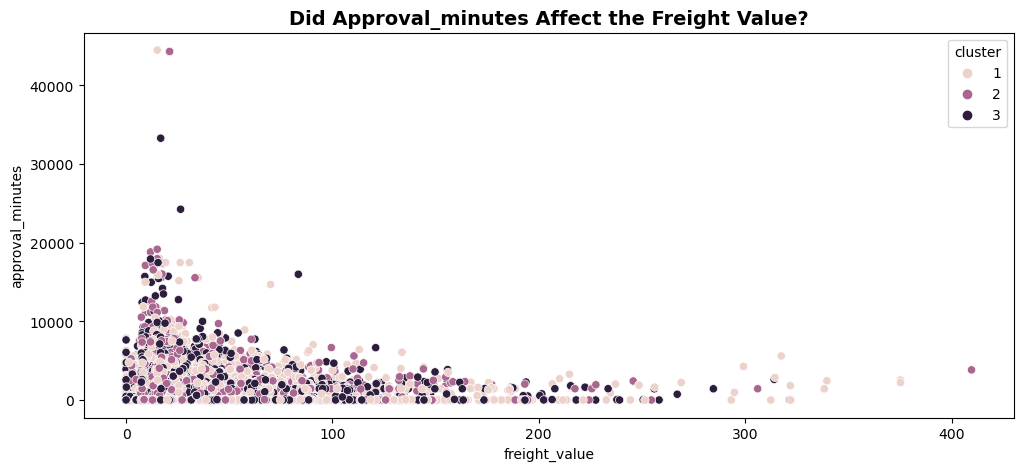

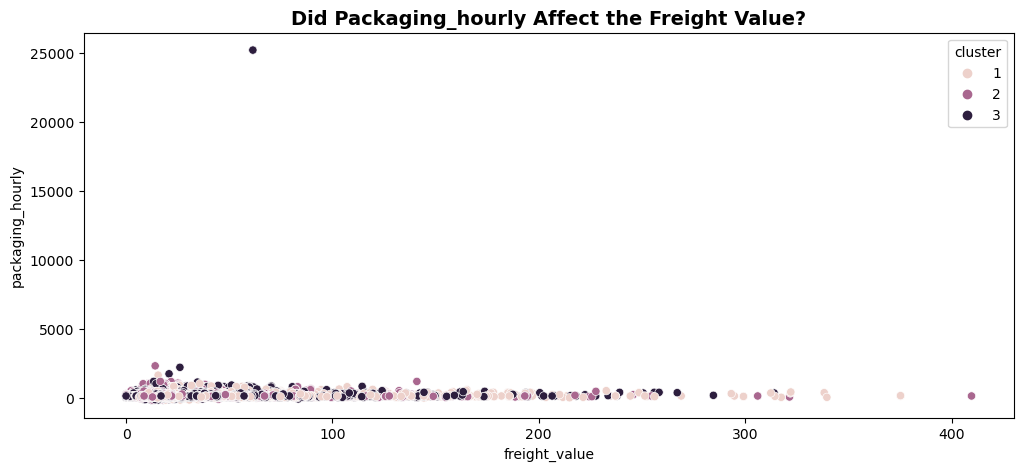

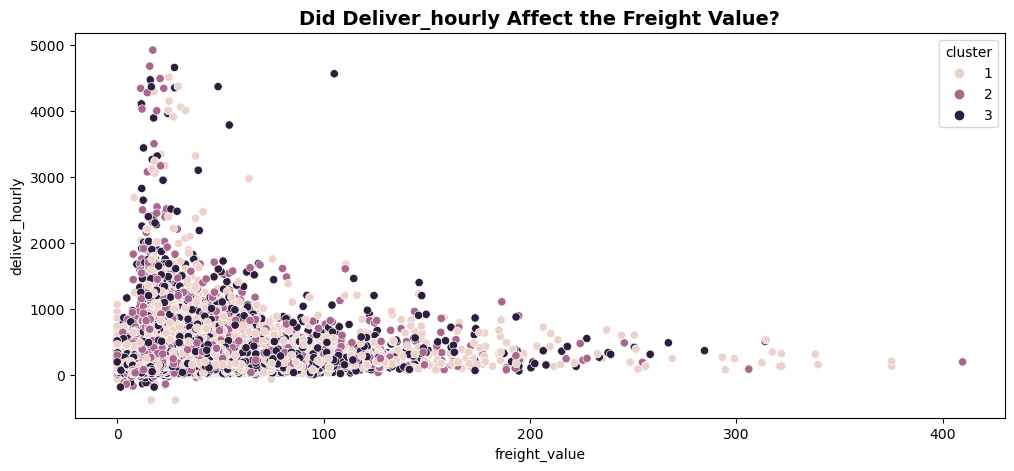

In [379]:
for col in ['approval_minutes', 'packaging_hourly', 'deliver_hourly']:
    plt.figure(figsize=(12,5))
    sns.scatterplot(x='freight_value',y=col, data=X, hue='cluster')
    plt.title('Did ' + str(col).capitalize() + ' Affect the Freight Value?', fontsize=14, fontweight='bold')
    plt.show()

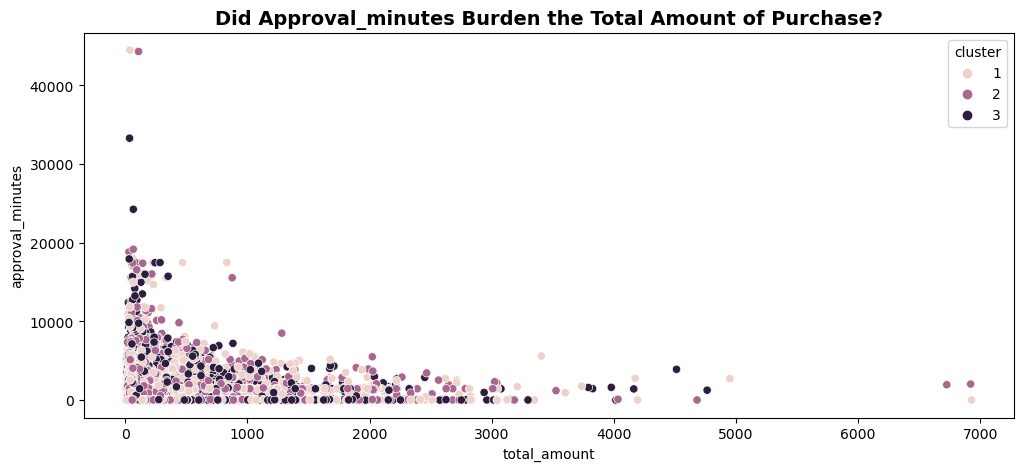

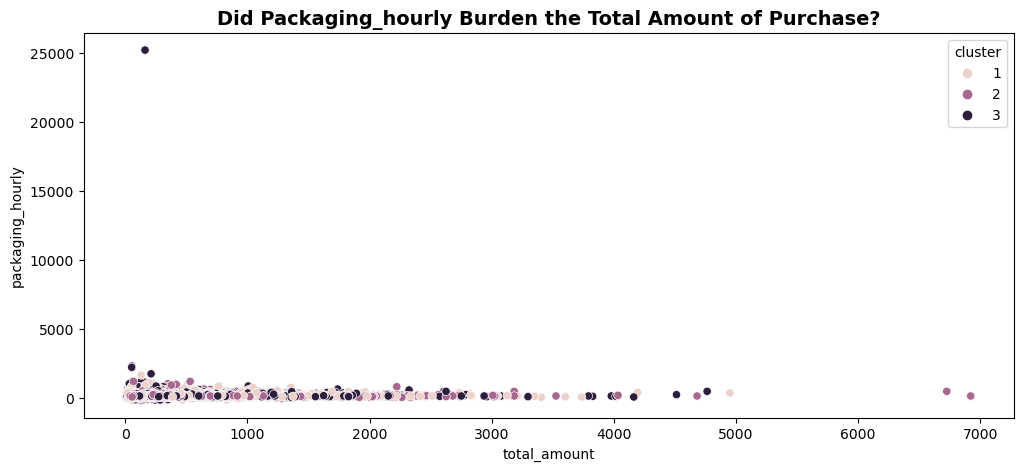

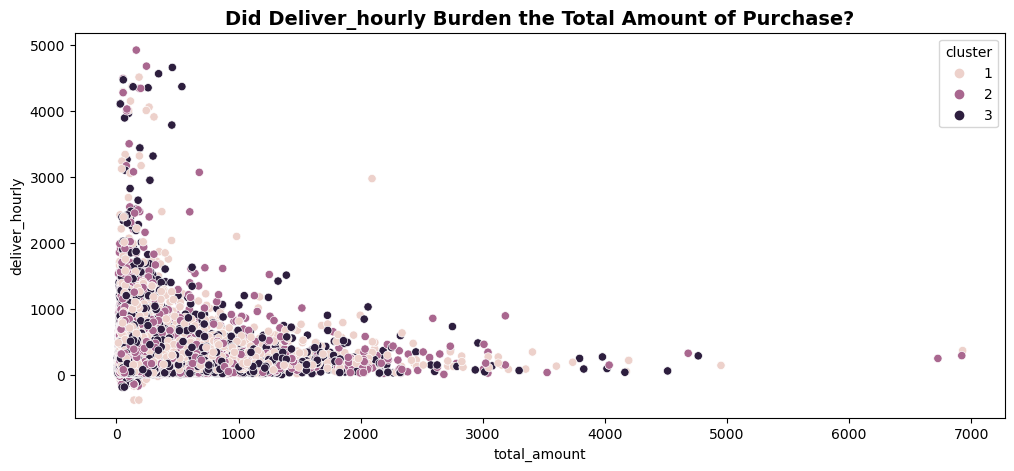

In [381]:
for col in ['approval_minutes', 'packaging_hourly', 'deliver_hourly']:
    plt.figure(figsize=(12,5))
    sns.scatterplot(x='total_amount',y=col, data=X, hue='cluster')
    plt.title('Did ' + str(col).capitalize() + ' Burden the Total Amount of Purchase?', fontsize=14, fontweight='bold')
    plt.show()

Notes:
- Product
  - 1: Medium number of product purchase 
  - 2: Lowest number of product purchase
  - 3: Highest number of product purchase
- Freight Value
  - 1: Higher value of freight
  - 2: Lower value of freight
  - 3: Lower value of freight
- Total Amount
  - 1: Higher Total Amount of Transaction
  - 2: Higher Total Amount of Transaction
  - 3: Lower Total Amount of Transaction

Interesting Contradictive Insight 
- customer from cluster 3 shown made the biggest product purchases, because this cluster is the biggest number of customer 
- while amount money of transaction which paid by customer 3rd cluster is the lowest from entire cluster

In [374]:
# Cluster 1 as Moderate, Cluster 2 as Shopaholic, Cluster 3 as Frugal
X['segment'] = X['cluster'].replace({1:'Shopaholic', 2:'Moderate', 3:'Frugal'})
X.head(20)

product_id  product_category  order_status  approval_minutes  \
0         8289                21             1             46.55   
1        28397                61             1             12.12   
2        24629                40             1             14.98   
3        14711                60             1              9.72   
4        21200                43             1             12.37   
5        29595                50             1           1812.88   
6        17453                69             1             16.72   
7        10661                43             1           1707.35   
8         6128                44             1           1434.80   
9         8654                11             1             11.28   
10       26519                44             1             11.98   
11       29842                29             1             38.65   
12       18944                 8             1             20.05   
13        6798                43             1           1785.52   
14        6798                43             1           1785.52   
15       17361                66             1            932.02   
16        7914                17             1             22.63   
17        9926                60             1             23.42   
18       22284                66             1           3926.58   
19       11790                21             1             13.92   

    packaging_hourly  deliver_hourly  customer_city  customer_state  \
0             144.00           29.16            732              21   
1             168.00          193.49           3252              26   
2              96.00          144.71           2636              13   
3             168.00           96.08            328              26   
4             215.79          318.94           3982              26   
5             144.00          122.64           3906              13   
6              96.00          164.93           1505              26   
7             115.92           97.82           2967              26   
8             143.94           41.66           3378              26   
9              96.00           27.06           1904              26   
10            120.00           42.62           2833              26   
11             95.51          191.08           2342              26   
12             48.00          134.04           3119              21   
13            143.00          139.53           1904              26   
14            143.00          139.53           1904              26   
15             48.00          164.57             84              13   
16            167.98           74.67            700              26   
17            120.00           50.34           3225              26   
18            143.96           95.82           1992              26   
19            144.00          340.47           1122              26   

    payment_sequential  payment_type   price  freight_value  total_amount  \
0                    1             2   58.90          13.29         72.19   
1                    1             2  239.90          19.93        259.83   
2                    1             2  199.00          17.87        216.87   
3                    1             2   12.99          12.79         25.78   
4                    1             2  199.90          18.14        218.04   
5                    1             1   21.90          12.69         34.59   
6                    1             2   19.90          11.85         31.75   
7                    1             2  810.00          70.75        880.75   
8                    1             2  145.95          11.65        157.60   
9                    1             2   53.99          11.40         65.39   
10                   1             2   59.99           8.88         68.87   
11                   1             2   45.00          12.98         57.98   
12                   1             2   74.00          23.32         97.32   
13   

Name Definition of Cluster based on customer purchase characteristic as behaviour
- **SHOPAHOLIC** (**CLUSTER 1**), group of compulsive shoppers who are extremely love shopping
- **MODERATE** (**CLUSTER 2**), group of moderate customer who buy product as it necessary 
- **FRUGAL** (**CLUSTER 3**), group of economical customer who hold their desire to buy

renaming `cluster` column to `segment`, then rename the value from cluster into segment name defined from above

In [61]:
# mengganti kolom cluster dari segment pada data tabel yang digunakan pada analisis, kemudian ganti valuenya dengan nama segment
custrans_df.rename(columns={'cluster':'segment'}, inplace=True)
custrans_df['segment'] = custrans_df['segment'].replace({1:'Moderate', 2:'Shopaholic', 3:'Frugal'})
# mengganti kolom cluster dari segment pada data asli dengan kolom yang lengkap, kemudian ganti valuenya dengan nama segment
customer_transaction.rename(columns={'cluster':'segment'}, inplace=True)
customer_transaction['segment'] = customer_transaction['segment'].replace({1:'Moderate', 2:'Shopaholic', 3:'Frugal'})

In [62]:
customer_transaction.head(20)

order_id                        product_id  \
0   00010242fe8c5a6d1ba2dd792cb16214  4244733e06e7ecb4970a6e2683c13e61   
1   00018f77f2f0320c557190d7a144bdd3  e5f2d52b802189ee658865ca93d83a8f   
2   000229ec398224ef6ca0657da4fc703e  c777355d18b72b67abbeef9df44fd0fd   
3   00024acbcdf0a6daa1e931b038114c75  7634da152a4610f1595efa32f14722fc   
4   00042b26cf59d7ce69dfabb4e55b4fd9  ac6c3623068f30de03045865e4e10089   
5   00048cc3ae777c65dbb7d2a0634bc1ea  ef92defde845ab8450f9d70c526ef70f   
6   00054e8431b9d7675808bcb819fb4a32  8d4f2bb7e93e6710a28f34fa83ee7d28   
7   000576fe39319847cbb9d288c5617fa6  557d850972a7d6f792fd18ae1400d9b6   
8   0005a1a1728c9d785b8e2b08b904576c  310ae3c140ff94b03219ad0adc3c778f   
9   0005f50442cb953dcd1d21e1fb923495  4535b0e1091c278dfd193e5a1d63b39f   
10  00061f2a7bc09da83e415a52dc8a4af1  d63c1011f49d98b976c352955b1c4bea   
11  00063b381e2406b52ad429470734ebd5  f177554ea93259a5b282f24e33f65ab6   
12  0006ec9db01a64e59a68b2c340bf65a7  99a4788cb24856965c36a24e339b6058   
13  0008288aa423d2a3f00fcb17cd7d8719  368c6c730842d78016ad823897a372db   
14  0008288aa423d2a3f00fcb17cd7d8719  368c6c730842d78016ad823897a372db   
15  0009792311464db532ff765bf7b182ae  8cab8abac59158715e0d70a36c807415   
16  0009c9a17f916a706d71784483a5d643  3f27ac8e699df3d300ec4a5d8c5cf0b2   
17  000aed2e25dbad2f9ddb70584c5a2ded  4fa33915031a8cde03dd0d3e8fb27f01   
18  000c3e6612759851cc3cbb4b83257986  b50c950aba0dcead2c48032a690ce817   
19  000e562887b1f2006d75e0be9558292e  5ed9eaf534f6936b51d0b6c5e4d5c2e9   

                         customer_id          product_category order_status  \
0   871766c5855e863f6eccc05f988b23cb                cool_stuff    delivered   
1   eb28e67c4c0b83846050ddfb8a35d051                  pet_shop    delivered   
2   3818d81c6709e39d06b2738a8d3a2474           furniture_decor    delivered   
3   af861d436cfc08b2c2ddefd0ba074622                 perfumery    delivered   
4   64b576fb70d441e8f1b2d7d446e483c5              garden_tools    delivered   
5   85c835d128beae5b4ce8602c491bf385                housewares    delivered   
6   635d9ac1680f03288e72ada3a1035803                 telephony    delivered   
7   fda4476abb6307ab3c415b7e6d026526              garden_tools    delivered   
8   639d23421f5517f69d0c3d6e6564cf0e             health_beauty    delivered   
9   0782c41380992a5a533489063df0eef6           books_technical    delivered   
10  107e6259485efac66428a56f10801f4f             health_beauty    delivered   
11  3fb97204945ca0c01bcf3eee6031c5f1  fashion_bags_accessories    delivered   
12  7ed0ea20347f67fe61d1c99fdf8556ae            bed_bath_table    delivered   
13  9e4159995424971423b98c4a8bc11529              garden_tools    delivered   
14  9e4159995424971423b98c4a8bc11529              garden_tools    delivered   
15  4987996ddcd0ddb20740fdce7c2bfbb1            sports_leisure    delivered   
16  6062db572f3ef38b7a8ff4307abbfad3            consoles_games    delivered   
17  6457be0b331148fb5454efc88d1e03d9                 perfumery    delivered   
18  f5f088001070650f9e9a8cd773621f35            sports_leisure    delivered   
19  b2c72d1e9f6430603b8337d8f1394a99                cool_stuff    delivered   

   shipping_limit_date order_purchase_timestamp   order_approved_at  \
0  2017-09-19 09:45:35      2017-09-13 08:59:02 2017-09-13 09:45:35   
1  2017-05-03 11:05:13      2017-04-26 10:53:06 2017-04-26 11:05:13   
2  2018-01-18 14:48:30      2018-01-14 14:33:31 2018-01-14 14:48:30   
3  2018-08-15 10:10:18      2018-08-08 10:00:35 2018-08-08 10:10:18   
4  2017-02-13 13:57:51      2017-02-04 13:57:51 2017-02-04 14:10:13   
5  2017-05-23 03:55:27      2017-05-15 21:42:34 2017-05-17 03:55:27   
6  2017-12-14 12:10:31      2017-12-10 11:53:48 2017-12-10 12:10:31   
7  2018-07-10 12:30:45      2018-07-04 12:08:27 2018-07-05 16:35:48   
8  2018-03-26 18:31:29      2018-03-19 18:40:33 2018-03-20 18:35:21   
9  2018-07-06 14:10:56      2018-07-02 13:59:39 2018-07-02 14:10:56   
10 2018-03-29 22:28:09      2018

## Conclusion
CLUSTER 1 - SHOPAHOLIC   
- About 29.73 % of entire customers as the smallest parts
- group of compulsive shoppers who are extremely love shopping
- spend a lot of money and put wants over need
- buy any product and it's category like they want

CLUSTER 2 - MODERATE Cluster 2  
- About 30.42 % of entire customers
- group of moderate customer who buy product as it necessary
- spend money when it is necessary
- various and almost product and it's category

CLUSTER 3 - FRUGAL Cluster 3  
- About 39.85 % of entire customers as the biggest parts
- group of economical customer who hold their desire to buy
- don't like spend money unless needs to urgenly need
- smallest number product and it's category